In [1]:
import pandas as pd
import numpy as np
import scipy as scp
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
import sklearn 
from sklearn.preprocessing import Imputer
from sklearn import preprocessing
import statsmodels.api as sm
import xgboost as xgb

%matplotlib inline
py.init_notebook_mode(connected=True)
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
train = pd.read_csv('./data/Sber Bank/train.csv')
macro = pd.read_csv('./data/Sber Bank/macro.csv')
train = pd.merge(train, macro, on='timestamp')

In [3]:
list(train.columns)

['id',
 'timestamp',
 'full_sq',
 'life_sq',
 'floor',
 'max_floor',
 'material',
 'build_year',
 'num_room',
 'kitch_sq',
 'state',
 'product_type',
 'sub_area',
 'area_m',
 'raion_popul',
 'green_zone_part',
 'indust_part',
 'children_preschool',
 'preschool_quota',
 'preschool_education_centers_raion',
 'children_school',
 'school_quota',
 'school_education_centers_raion',
 'school_education_centers_top_20_raion',
 'hospital_beds_raion',
 'healthcare_centers_raion',
 'university_top_20_raion',
 'sport_objects_raion',
 'additional_education_raion',
 'culture_objects_top_25',
 'culture_objects_top_25_raion',
 'shopping_centers_raion',
 'office_raion',
 'thermal_power_plant_raion',
 'incineration_raion',
 'oil_chemistry_raion',
 'radiation_raion',
 'railroad_terminal_raion',
 'big_market_raion',
 'nuclear_reactor_raion',
 'detention_facility_raion',
 'full_all',
 'male_f',
 'female_f',
 'young_all',
 'young_male',
 'young_female',
 'work_all',
 'work_male',
 'work_female',
 'ekder_all'

In [4]:
col_house_char = ['full_sq', 'life_sq', 'kitch_sq', 'num_room', 'floor', 'max_floor', 'material', 'build_year', 'state']

col_demographic = ['area_m', 'raion_popul', 'full_all', 'male_f', 'female_f', 'young_all', 'young_male', 'young_female',
                   'work_all', 'work_male', 'work_female', 'ekder_all', 'ekder_male', 'ekder_female', '0_6_all', '0_6_male',
                   '0_6_female', '7_14_all', '7_14_male', '7_14_female', '0_17_all', '0_17_male', '0_17_female', '16_29_all',
                   '16_29_male', '16_29_female', '0_13_all', '0_13_male', '0_13_female',]

col_school = ['children_preschool', 'preschool_quota', 'preschool_education_centers_raion', 'children_school',
              'school_quota', 'school_education_centers_raion', 'school_education_centers_top_20_raion',
              'university_top_20_raion', 'additional_education_raion', 
              'additional_education_km', 'preschool_km', 'school_km']

col_culture = ['big_church_km', 'church_synagogue_km', 'big_church_count_500', 
               'big_church_count_1000', 'church_count_1000', 'big_church_count_1500', 'church_count_1500',
               'big_church_count_2000', 'church_count_2000', 'big_church_count_3000', 'church_count_3000',
               'big_church_count_5000', 'church_count_5000', 
               'church_count_500', 'church_count_1000', 'church_count_1500', 'church_count_2000',
               'church_count_300','church_count_5000',
               'mosque_km', 'mosque_count_1000', 'mosque_count_1500', 'mosque_count_2000',
               'mosque_count_3000', 'mosque_count_5000',]

col_shopping = ['shopping_centers_km', 'shopping_centers_raion', 
                'big_market_raion', 'big_market_km', 'market_shop_km', 'market_count_1000', 'market_count_1500',
                'market_count_2000', 'market_count_3000', 'market_count_5000',]

col_leisure = ['sport_count_500', 'sport_count_1000', 'sport_count_1500', 'sport_count_2000', 
               'sport_count_3000', 'sport_count_5000', 'sport_objects_raion', 
               'leisure_count_500', 'leisure_count_1000', 'leisure_count_1500', 'leisure_count_2000', 
               'leisure_count_3000', 'leisure_count_5000',
               'fitness_km', 'swim_pool_km', 'stadium_km', 'museum_km',
               'park_km', 'ice_rink_km', 'basketball_km', 'theater_km', 'exhibition_km', 'catering_km']

col_office = ['office_km', 'office_count_500', 'office_count_1000','office_count_1500','office_count_2000',
              'office_count_3000','office_count_5000',
              'office_sqm_500', 'office_sqm_1000', 'office_sqm_1500', 'office_sqm_2000',
              'office_sqm_3000', 'office_sqm_5000']

col_infrstructure = ['nuclear_reactor_km', 'nuclear_reactor_rion',
                     'thermal_power_plant_km', 'thermal_power_plant_raion',
                     'power_transmission_line_km',
                     'indust_part', 'industrial_km', 
                     'incineration_km', 'incineration_raion',
                     'water_treatment_km', 'water_km', 'water_1line', 
                     'mkad_km', 'ttk_km', 'sadovoe_km']

col_politic = ['kremlin_km']

col_transport = ['railroad_station_walk_km', 'railroad_station_walk_min', 'ID_railroad_station_walk',
                 'railroad_station_avto_km', 'railroad_station_avto_min', 'ID_railroad_station_avto',
                 'railroad_terminal_raion', 'railroad_km', 'railroad_1line', 'zd_vokzaly_avto_km', 'ID_railroad_terminal',
                 'big_road1_km', 'ID_big_road1', 'big_road1_1line', 'big_road2_km', 'ID_big_road2', 'railroad_km',
                 'railroad_1line', 'zd_vokzaly_avto_km', 'ID_railroad_terminal',
                 'public_transport_station_km', 'public_transport_station_min_walk',
                 'ID_metro', 'metro_min_avto', 'metro_km_avto', 'metro_min_walk', 'metro_km_walk']

col_health = ['hospice_morgue_km', 'hospital_beds_raion', 'healthcare_centers_raion', 'public_healthcare_km']

col_ecology = ['ecology', 'green_zone_km', 'green_part_500', 'green_part_500', 'green_part_1500']
         
col_trc = ['trc_count_500', 'trc_count_1000', 'trc_count_1500', 'trc_count_2000', 'trc_count_3000', 'trc_count_5000',
           'trc_sqm_500', 'trc_sqm_1000', 'trc_sqm_1500', 'trc_sqm_2000', 'trc_sqm_3000', 'trc_sqm_5000']

# Data Wrangling

In [5]:
train['timestamp'] = pd.to_datetime(train['timestamp'])

train.ix[train.full_sq <= 6, 'full_sq'] = np.nan
train.ix[train.life_sq <= 6, 'life_sq'] = np.nan

train.ix[train.full_sq > 2000, 'full_sq'] = np.nan
train.ix[train.life_sq > 2000, 'life_sq'] = np.nan

bad_index = [13117]
train.ix[bad_index, 'build_year'] = train.ix[bad_index, 'kitch_sq']
train.ix[bad_index, 'kitch_sq'] = np.nan

bad_index = [10368, 11520, 13117, 21415, 28734]
train.ix[bad_index, 'kitch_sq'] = np.nan

bad_index = train.ix[(train.num_room>=6) & (train.full_sq<100)].index
train.ix[bad_index, 'num_room'] = np.nan

bad_index = train.kitch_sq > train.life_sq
temp = train.ix[bad_index, 'kitch_sq']
train.ix[bad_index, 'kitch_sq'] = train.ix[bad_index, 'life_sq']
train.ix[bad_index, 'life_sq'] = temp

bad_index = train.kitch_sq > train.full_sq
temp = train.ix[bad_index, 'kitch_sq']
train.ix[bad_index, 'kitch_sq'] = train.ix[bad_index, 'full_sq']
train.ix[bad_index, 'full_sq'] = temp

bad_index = train.life_sq > train.full_sq
temp = train.ix[bad_index, 'life_sq']
train.ix[bad_index, 'life_sq'] = train.ix[bad_index, 'full_sq']
train.ix[bad_index, 'full_sq'] = temp

bad_index = train.floor > train.max_floor
temp = train.ix[bad_index, 'floor']
train.ix[bad_index, 'floor'] = train.ix[bad_index, 'max_floor']
train.ix[bad_index, 'max_floor'] = temp

train.ix[train.state > 30, 'state'] = np.nan

train.timestamp = pd.to_datetime(train.timestamp)
bad_index = (train.build_year == 0)
train.ix[bad_index, 'build_year'] = train.ix[bad_index].timestamp.dt.year
bad_index = (train.build_year == 1)
train.ix[bad_index, 'build_year'] = train.ix[bad_index].timestamp.dt.year-1
bad_index = (train.build_year == 3)
train.ix[bad_index, 'build_year'] = train.ix[bad_index].timestamp.dt.year-3
train.ix[train.build_year < 1600, 'build_year'] = np.nan
train.ix[train.build_year > 2018, 'build_year'] = np.nan

## Missing data

In [6]:
train_obj = pd.DataFrame()
train_obj[['id', 'timestamp']] = train[['id', 'timestamp']]
train = train.drop(['id', 'timestamp'], axis=1)
for c in train.columns:
    if train[c].dtype == 'object':
        train_obj[c] = train[c]
        train = train.drop(c, axis=1)

imp = Imputer(missing_values='NaN', strategy='mean', axis=0)
cols = train.columns
train = pd.DataFrame(imp.fit_transform(train))
train.columns = cols
train[train_obj.columns] = train_obj

## Feature Engineering:

In [7]:
train['age'] = train['timestamp'].dt.year - train['build_year']
train['year'] = train['timestamp'].dt.year
train['month'] = train['timestamp'].dt.month
train['month_str'] = train.timestamp.dt.strftime('%B')
train['day'] = train['timestamp'].dt.day
train['quarter'] = train['timestamp'].dt.quarter
train['year_quarter'] = train['timestamp'].dt.to_period('Q')
train['year_month'] = train['timestamp'].dt.to_period('M')

train['price_rel_full_sq'] = train['price_doc'] / train['full_sq']
train['price_rel_life_sq'] = train['price_doc'] / train['life_sq']
train['room_sq'] = train['life_sq']/train['num_room']

train['rolling_price_300'] = train['price_doc'].rolling(window=300, center=False).mean()
train['rolling_price_600'] = train['price_doc'].rolling(window=600, center=False).mean()
train['rolling_price_1000'] = train['price_doc'].rolling(window=1000, center=False).mean()

train = train.sort_values(by='timestamp')

# EDA

## Time series

### Number of Transactions

[<matplotlib.text.Text at 0x137fde80>, <matplotlib.text.Text at 0x13e704a8>]

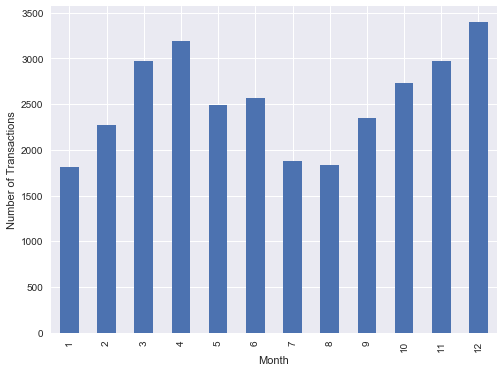

In [8]:
f, ax = plt.subplots(figsize=(8, 6))
train.groupby('month').count().timestamp.plot(kind='bar')
ax.set(xlabel='Month', ylabel='Number of Transactions')

[<matplotlib.text.Text at 0x141f03c8>, <matplotlib.text.Text at 0x141c8ba8>]

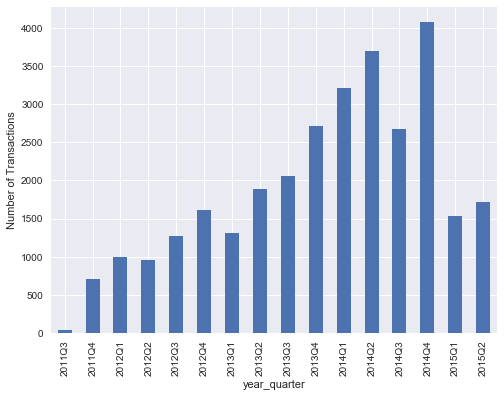

In [9]:
f, ax = plt.subplots(figsize=(8, 6))
train.groupby('year_quarter').count().timestamp.plot(kind='bar')
ax.set(xlabel='year_quarter', ylabel='Number of Transactions')

[<matplotlib.text.Text at 0x12072e48>, <matplotlib.text.Text at 0x1205f278>]

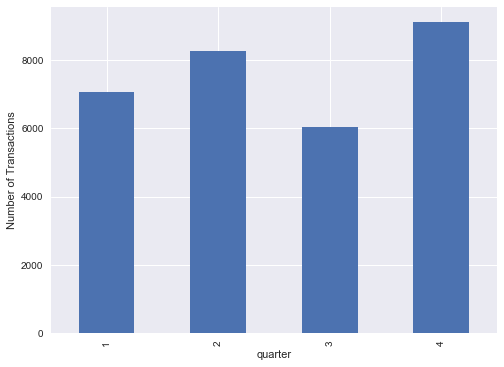

In [10]:
f, ax = plt.subplots(figsize=(8, 6))
train.groupby('quarter').count().timestamp.plot(kind='bar')
ax.set(xlabel='quarter', ylabel='Number of Transactions')

[<matplotlib.text.Text at 0x11fc8208>, <matplotlib.text.Text at 0x14cdf550>]

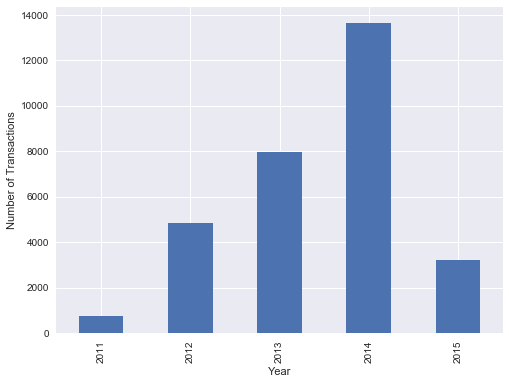

In [11]:
f, ax = plt.subplots(figsize=(8, 6))
train.groupby('year').count().timestamp.plot(kind='bar')
ax.set(xlabel='Year', ylabel='Number of Transactions')

### Average turnover

[<matplotlib.text.Text at 0x119538d0>, <matplotlib.text.Text at 0x14cc2828>]

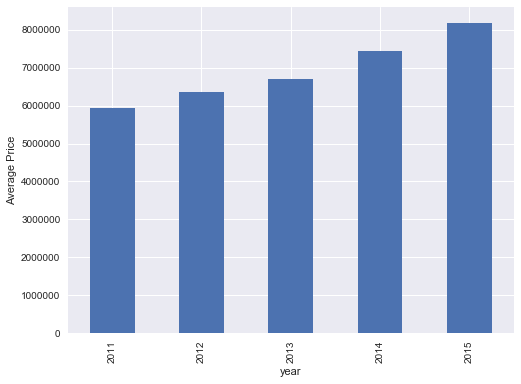

In [12]:
f, ax = plt.subplots(figsize=(8, 6))
train.groupby('year').mean().price_doc.plot(kind='bar')
ax.set(xlabel='year', ylabel='Average Price')

[<matplotlib.text.Text at 0x11a7c908>, <matplotlib.text.Text at 0x14d2b550>]

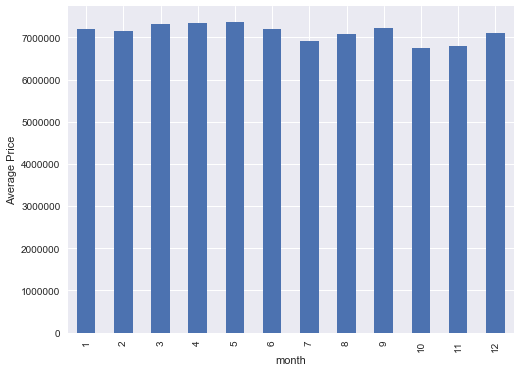

In [13]:
f, ax = plt.subplots(figsize=(8, 6))
train.groupby('month').mean().price_doc.plot(kind='bar')
ax.set(xlabel='month', ylabel='Average Price')

[<matplotlib.text.Text at 0x119328d0>, <matplotlib.text.Text at 0x11a7ca90>]

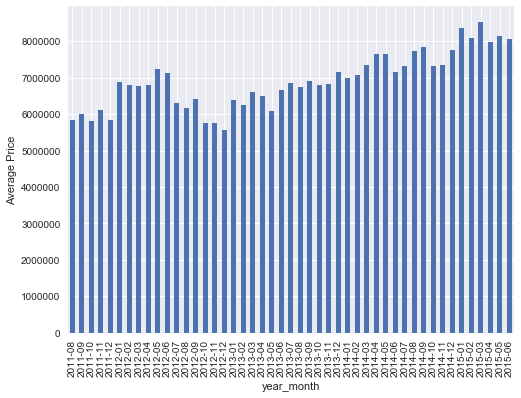

In [14]:
f, ax = plt.subplots(figsize=(8, 6))
train.groupby('year_month').mean().price_doc.plot(kind='bar')
ax.set(xlabel='year_month', ylabel='Average Price')

[<matplotlib.text.Text at 0x13a9c860>, <matplotlib.text.Text at 0x11bbe0b8>]

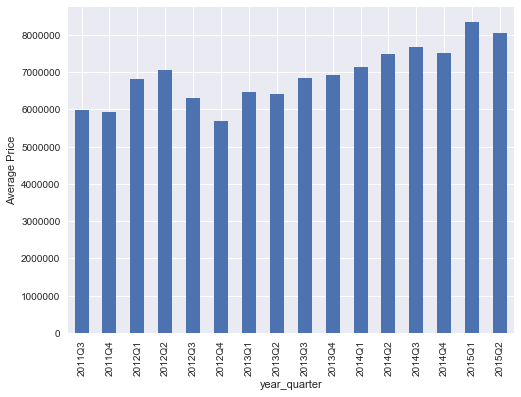

In [15]:
f, ax = plt.subplots(figsize=(8, 6))
train.groupby('year_quarter').mean().price_doc.plot(kind='bar')
ax.set(xlabel='year_quarter', ylabel='Average Price')

[<matplotlib.text.Text at 0x11ecba90>, <matplotlib.text.Text at 0x11ebc4e0>]

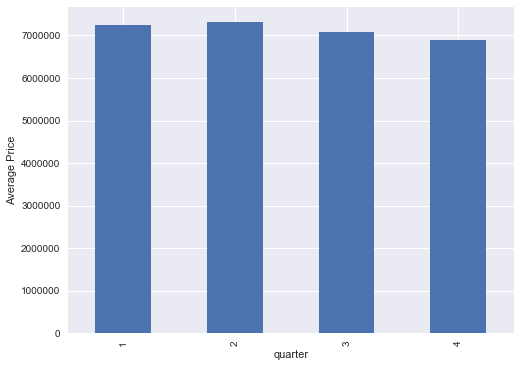

In [16]:
f, ax = plt.subplots(figsize=(8, 6))
train.groupby('quarter').mean().price_doc.plot(kind='bar')
ax.set(xlabel='quarter', ylabel='Average Price')

### total turnover

[<matplotlib.text.Text at 0x11e6d518>, <matplotlib.text.Text at 0x11ebc7b8>]

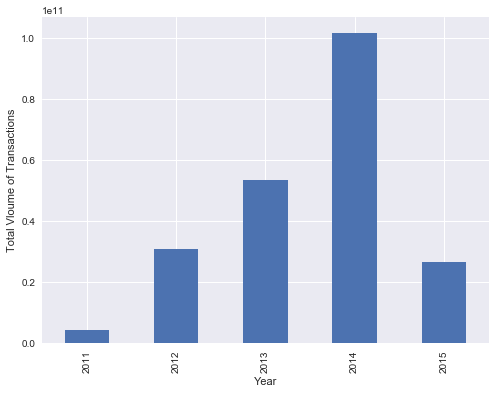

In [17]:
f, ax = plt.subplots(figsize=(8, 6))
train.groupby('year').sum().price_doc.plot(kind='bar')
ax.set(xlabel='Year', ylabel='Total Vloume of Transactions')

[<matplotlib.text.Text at 0xda1fe48>, <matplotlib.text.Text at 0xdae0d68>]

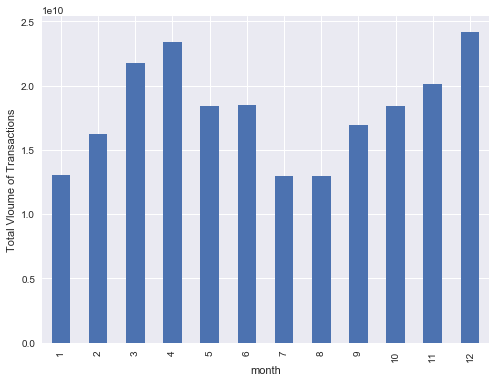

In [18]:
f, ax = plt.subplots(figsize=(8, 6))
train.groupby('month').sum().price_doc.plot(kind='bar')
ax.set(xlabel='month', ylabel='Total Vloume of Transactions')

[<matplotlib.text.Text at 0xda60f98>, <matplotlib.text.Text at 0xde18668>]

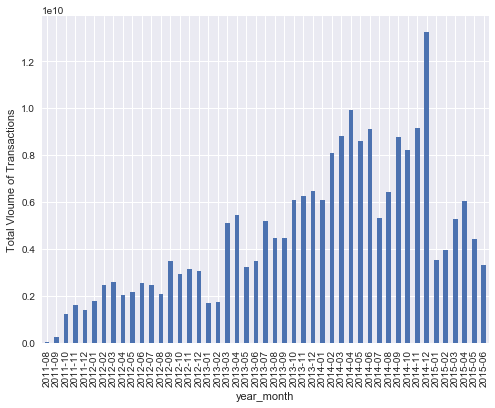

In [19]:
f, ax = plt.subplots(figsize=(8, 6))
train.groupby('year_month').sum().price_doc.plot(kind='bar')
ax.set(xlabel='year_month', ylabel='Total Vloume of Transactions')

[<matplotlib.text.Text at 0x12522f98>, <matplotlib.text.Text at 0x121410f0>]

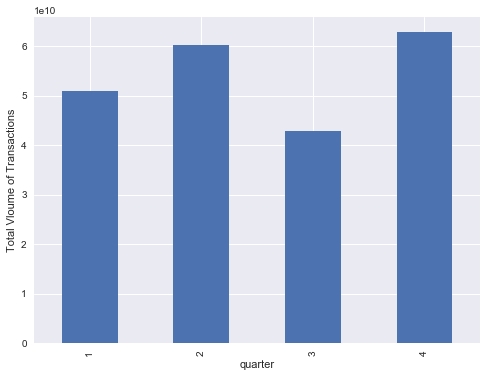

In [20]:
f, ax = plt.subplots(figsize=(8, 6))
train.groupby('quarter').sum().price_doc.plot(kind='bar')
ax.set(xlabel='quarter', ylabel='Total Vloume of Transactions')

[<matplotlib.text.Text at 0x12522c50>, <matplotlib.text.Text at 0xdebce48>]

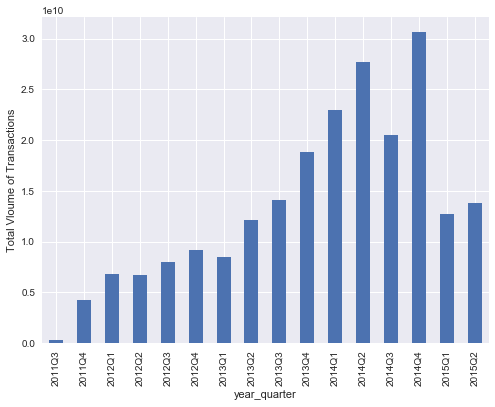

In [21]:
f, ax = plt.subplots(figsize=(8, 6))
train.groupby('year_quarter').sum().price_doc.plot(kind='bar')
ax.set(xlabel='year_quarter', ylabel='Total Vloume of Transactions')

### Average relative price (per_square price)

[<matplotlib.text.Text at 0x1228d898>, <matplotlib.text.Text at 0x122c0208>]

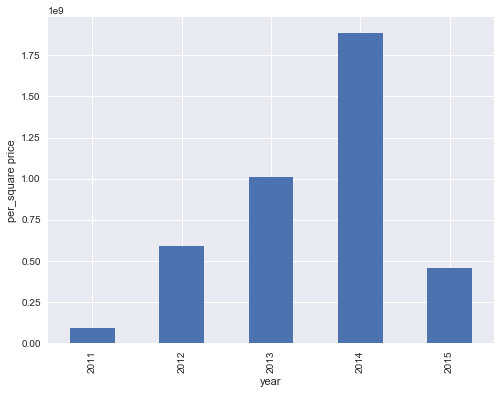

In [22]:
f, ax = plt.subplots(figsize=(8, 6))
train.groupby('year').sum().price_rel_full_sq.plot(kind='bar')
ax.set(xlabel='year', ylabel='per_square price')

[<matplotlib.text.Text at 0x14b0d128>, <matplotlib.text.Text at 0x122b3940>]

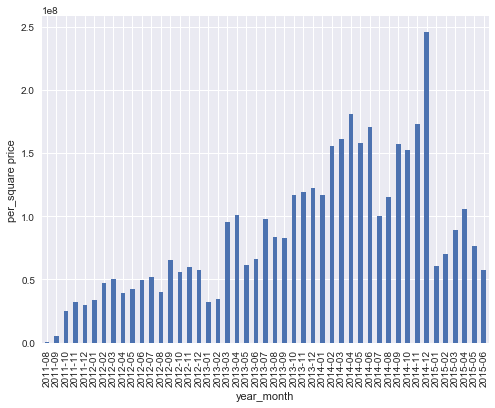

In [23]:
f, ax = plt.subplots(figsize=(8, 6))
train.groupby('year_month').sum().price_rel_full_sq.plot(kind='bar')
ax.set(xlabel='year_month', ylabel='per_square price')

[<matplotlib.text.Text at 0x1504f1d0>, <matplotlib.text.Text at 0x1502d4a8>]

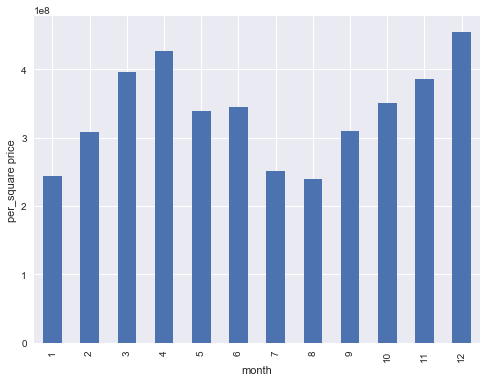

In [24]:
f, ax = plt.subplots(figsize=(8, 6))
train.groupby('month').sum().price_rel_full_sq.plot(kind='bar')
ax.set(xlabel='month', ylabel='per_square price')

[<matplotlib.text.Text at 0x15055198>, <matplotlib.text.Text at 0x12d90c50>]

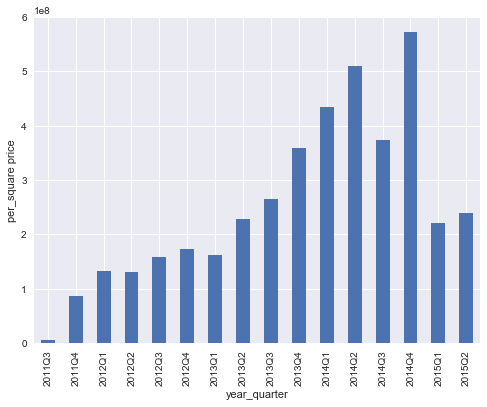

In [25]:
f, ax = plt.subplots(figsize=(8, 6))
train.groupby('year_quarter').sum().price_rel_full_sq.plot(kind='bar')
ax.set(xlabel='year_quarter', ylabel='per_square price')

[<matplotlib.text.Text at 0x15694be0>, <matplotlib.text.Text at 0x15687080>]

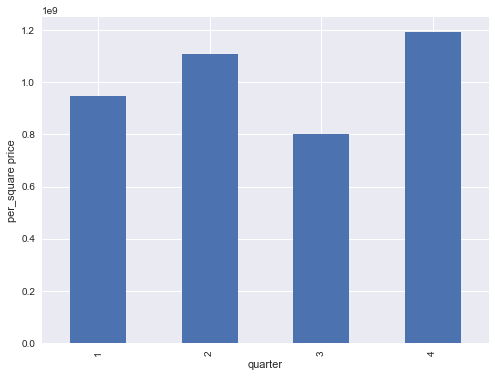

In [26]:
f, ax = plt.subplots(figsize=(8, 6))
train.groupby('quarter').sum().price_rel_full_sq.plot(kind='bar')
ax.set(xlabel='quarter', ylabel='per_square price')

In [27]:
train['price_rel'] = train['price_doc']/train['life_sq']

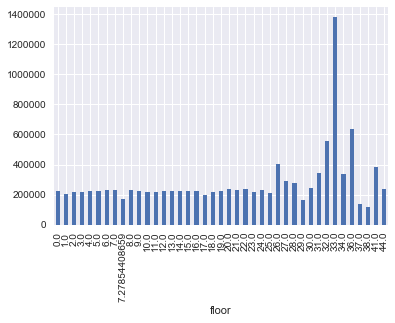

In [28]:
train.groupby('floor')['price_rel'].mean().plot(kind='bar')

In [29]:
df_new = pd.DataFrame(df.groupby(['month','year']).mean())['price_doc']
df_new = df_new.reset_index()
g = sns.factorplot(x='month', y='price_doc', hue='year', data=df_new, kind='bar', size=6, aspect=2.5, palette='muted')
g.set_axis_labels('Month', 'Average Price')

NameError: name 'df' is not defined

In [ ]:
df_new = pd.DataFrame(df.groupby(['month','year']).sum())['price_doc']
df_new = df_new.reset_index()
g = sns.factorplot(x='month', y='price_doc', hue='year', data=df_new, kind='bar', size=6, aspect=2.5, palette='muted')
g.set_axis_labels('Month', 'Total Amount')

In [ ]:
df_new = pd.DataFrame(df.groupby(['month','year']).size())#['price_doc']
df_new = df_new.reset_index()
df_new = df_new.rename(columns={0:'counts'})
g = sns.factorplot(x='month', y='counts', hue='year', data=df_new, kind='bar', size=6, aspect=2.5, palette='muted')
g.set_axis_labels('Month', 'Number of Transactions')

## House Characteristic:

### full_sq vs. Price

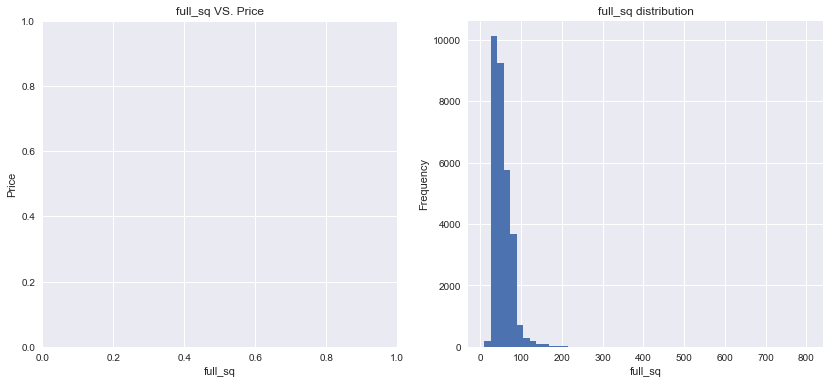

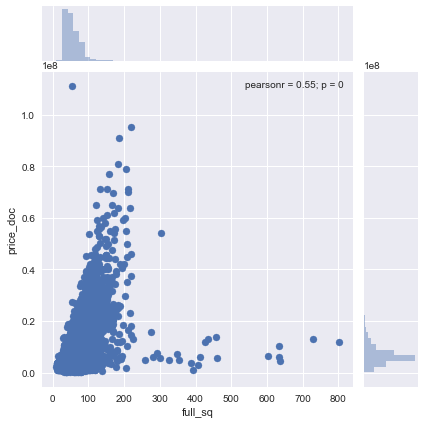

In [30]:
fig, axes = plt.subplots(1,2,figsize=[14,6])
sns.jointplot(train['full_sq'], train['price_doc'])
_ = axes[1].hist(train['full_sq'].dropna(), bins=50)
axes[0].set_xlabel('full_sq')
axes[0].set_ylabel('Price')
axes[0].set_title('full_sq VS. Price')
axes[1].set_xlabel('full_sq')
axes[1].set_ylabel('Frequency')
axes[1].set_title('full_sq distribution')

### life_sq vs. Price

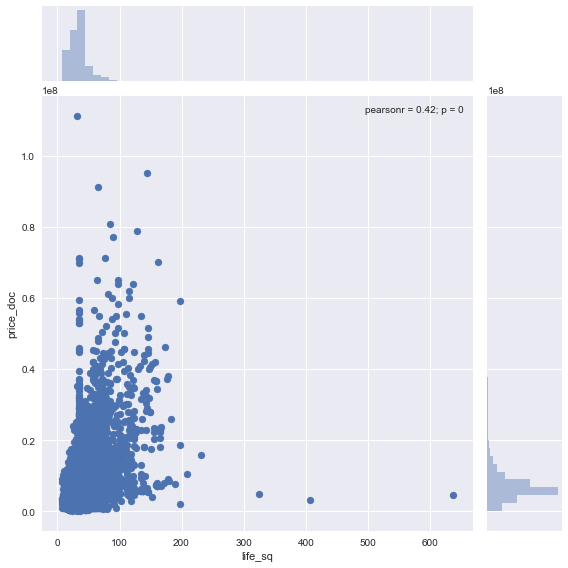

In [31]:
sns.jointplot(train['life_sq'], train['price_doc'], size=8)
#fig, ax = plt.subplots(figsize=[14,6])
#axes[0].scatter(train['life_sq'], train['price_doc'])
#_ = axes[1].hist(train['life_sq'].dropna(), bins=50)
#axes[0].set_xlabel('life_sq')
#axes[0].set_ylabel('Price')
#axes[0].set_title('life_sq VS. Price')
#axes[1].set_xlabel('life_sq')
#axes[1].set_ylabel('Frequency')
#axes[1].set_title('life_sq distribution')

### full_sq vs. life_sq

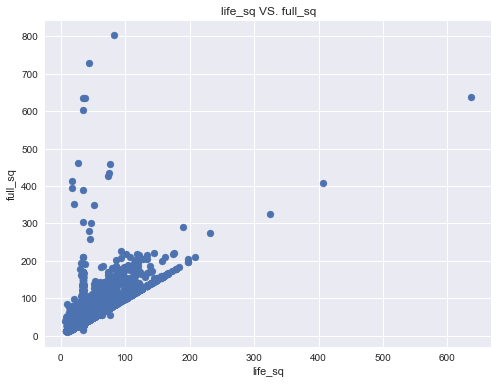

In [32]:
fig, ax = plt.subplots(figsize=[8,6])
ax.scatter(train['life_sq'], train['full_sq'])
ax.set_xlabel('life_sq')
ax.set_ylabel('full_sq')
ax.set_title('life_sq VS. full_sq')

### num_rom vs. Price

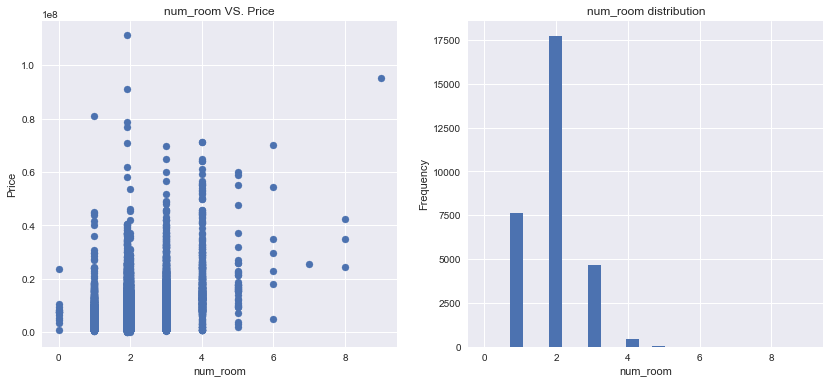

In [33]:
fig, axes = plt.subplots(1,2,figsize=[14,6])
axes[0].scatter(train['num_room'], train['price_doc'])
_ = axes[1].hist(train['num_room'].dropna(), bins=25)
axes[0].set_xlabel('num_room')
axes[0].set_ylabel('Price')
axes[0].set_title('num_room VS. Price')
axes[1].set_xlabel('num_room')
axes[1].set_ylabel('Frequency')
axes[1].set_title('num_room distribution')

### floor vs. Price

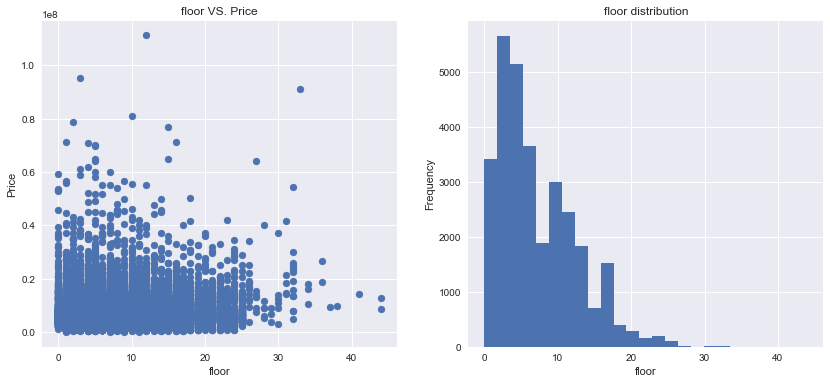

In [34]:
fig, axes = plt.subplots(1,2,figsize=[14,6])
axes[0].scatter(train['floor'], train['price_doc'])
_ = axes[1].hist(train['floor'].dropna(), bins=25)
axes[0].set_xlabel('floor')
axes[0].set_ylabel('Price')
axes[0].set_title('floor VS. Price')
axes[1].set_xlabel('floor')
axes[1].set_ylabel('Frequency')
axes[1].set_title('floor distribution')

### max_floor vs. Price

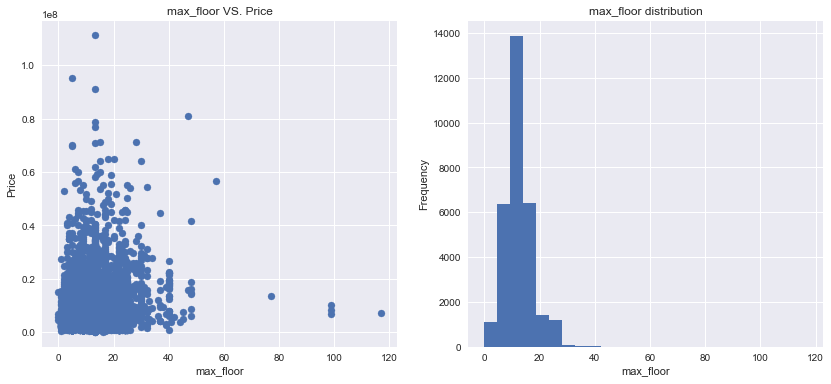

In [35]:
fig, axes = plt.subplots(1,2,figsize=[14,6])
axes[0].scatter(train['max_floor'], train['price_doc'])
_ = axes[1].hist(train['max_floor'].dropna(), bins=25)
axes[0].set_xlabel('max_floor')
axes[0].set_ylabel('Price')
axes[0].set_title('max_floor VS. Price')
axes[1].set_xlabel('max_floor')
axes[1].set_ylabel('Frequency')
axes[1].set_title('max_floor distribution')

### material vs. Price

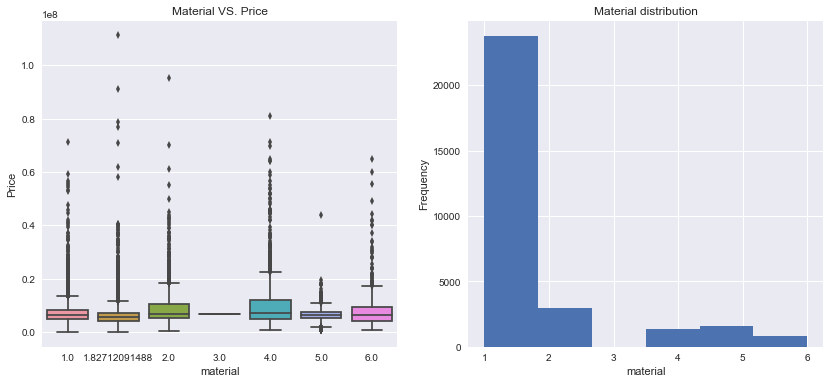

In [36]:
fig, axes = plt.subplots(1,2,figsize=[14,6])
sns.boxplot(train['material'], train['price_doc'], ax=axes[0])
_ = axes[1].hist(train['material'].dropna(), align='mid', bins=6)
axes[0].set_xlabel('material')
axes[0].set_ylabel('Price')
axes[0].set_title('Material VS. Price')
axes[1].set_xlabel('material')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Material distribution')

### state vs. Price

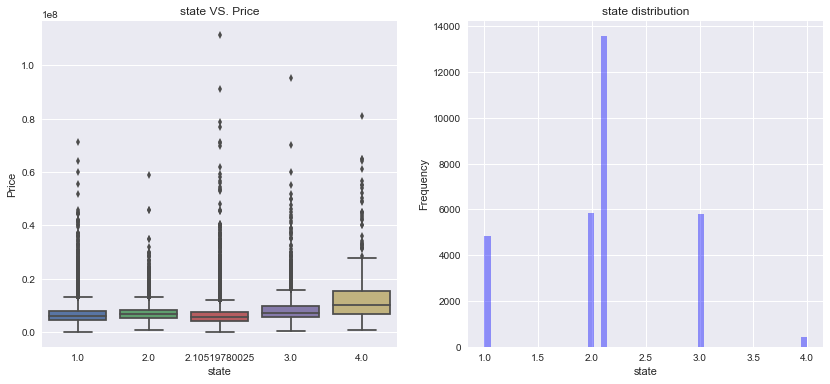

In [37]:
fig, axes = plt.subplots(1,2,figsize=[14,6])
sns.boxplot(train['state'], train['price_doc'], ax=axes[0])
sns.distplot(train['state'].dropna(), ax=axes[1], kde=False, color='b')
axes[0].set_xlabel('state')
axes[0].set_ylabel('Price')
axes[0].set_title('state VS. Price')
axes[1].set_xlabel('state')
axes[1].set_ylabel('Frequency')
axes[1].set_title('state distribution')

### build_year vs. Price

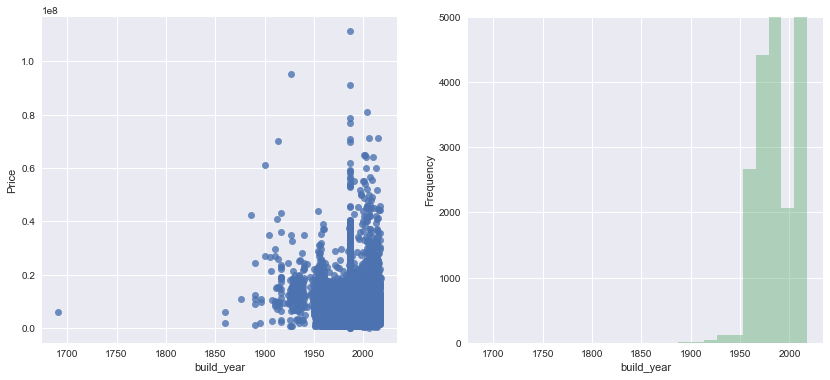

In [38]:
fig, axes = plt.subplots(1,2,figsize=[14,6])
sns.regplot(train['build_year'], train['price_doc'], fit_reg=False, ax=axes[0])
sns.distplot(train['build_year'].dropna(), bins=25, kde=False, ax=axes[1])
axes[1].set_ylim([0,5000])
axes[0].set_xlabel('build_year')
axes[0].set_ylabel('Price')
axes[1].set_xlabel('build_year')
axes[1].set_ylabel('Frequency')

### Correlation

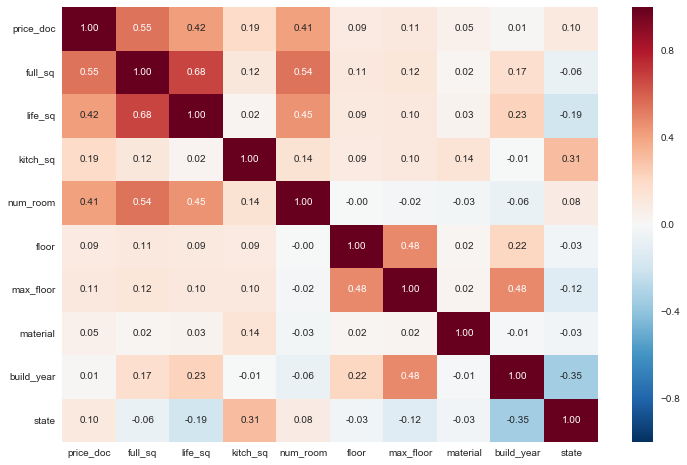

In [39]:
corr = train[['price_doc', 'full_sq', 'life_sq', 'kitch_sq', 'num_room', 
              'floor', 'max_floor', 'material', 'build_year', 'state']].corr()

fig, ax = plt.subplots(figsize=[12,8])
sns.heatmap(corr, annot=True, fmt=".2f")

## Demographic:

In [40]:
col_demographic = ['area_m', 'raion_popul', 'full_all', 'male_f', 'female_f', 'young_all', 'young_male', 'young_female',
                   'work_all', 'work_male', 'work_female', 'ekder_all', 'ekder_male', 'ekder_female', '0_6_all', '0_6_male',
                   '0_6_female', '7_14_all', '7_14_male', '7_14_female', '0_17_all', '0_17_male', '0_17_female', '16_29_all',
                   '16_29_male', '16_29_female', '0_13_all', '0_13_male', '0_13_female']

(0, 20000)

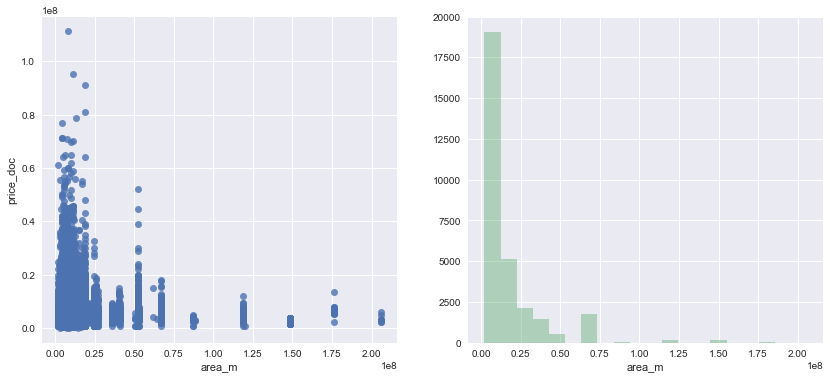

In [41]:
fig, axes = plt.subplots(1,2,figsize=[14,6])
sns.regplot(train['area_m'], train['price_doc'], fit_reg=False, ax=axes[0])
sns.distplot(train['area_m'].dropna(), bins=20, ax=axes[1], kde=False)
axes[1].set_ylim([0,20000])

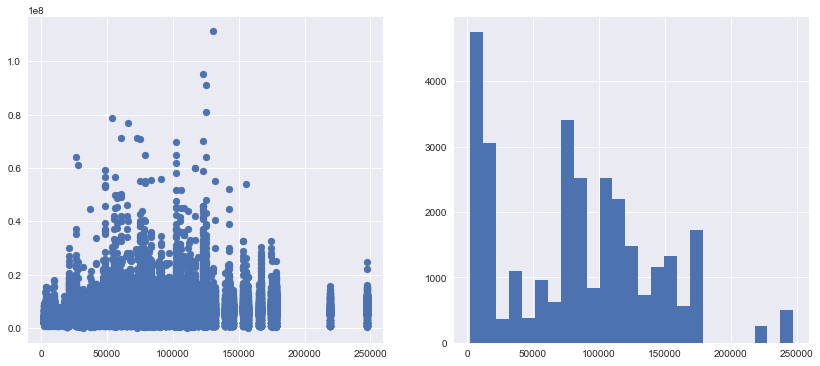

In [42]:
fig, axes = plt.subplots(1,2,figsize=[14,6])
axes[0].scatter(train['raion_popul'], train['price_doc'])
_ = axes[1].hist(train['raion_popul'].dropna(), bins=25)

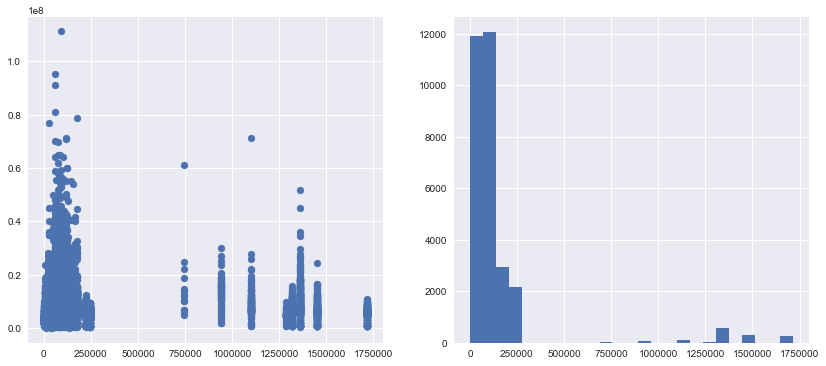

In [43]:
fig, axes = plt.subplots(1,2,figsize=[14,6])
axes[0].scatter(train['full_all'], train['price_doc'])
_ = axes[1].hist(train['full_all'].dropna(), bins=25)

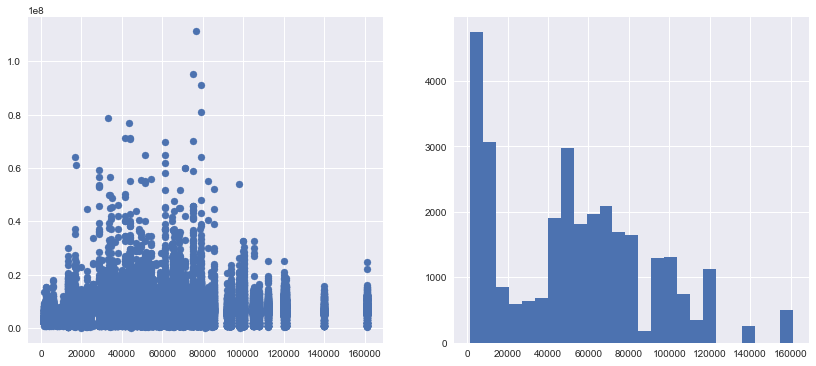

In [44]:
fig, axes = plt.subplots(1,2,figsize=[14,6])
axes[0].scatter(train['work_all'], train['price_doc'])
_ = axes[1].hist(train['work_all'].dropna(), bins=25)

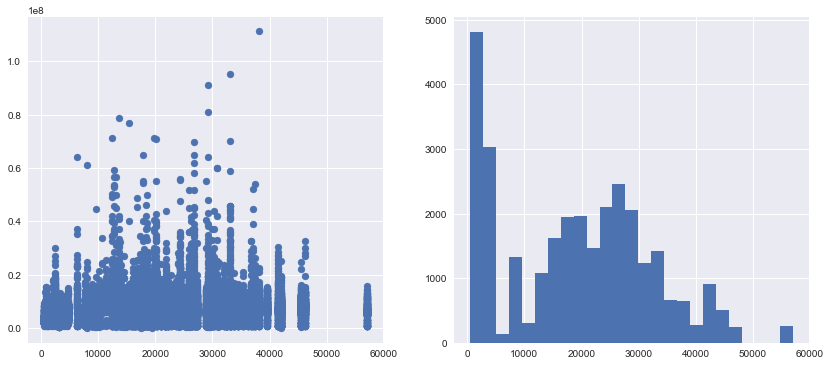

In [45]:
fig, axes = plt.subplots(1,2,figsize=[14,6])
axes[0].scatter(train['ekder_all'], train['price_doc'])
_ = axes[1].hist(train['ekder_all'].dropna(), bins=25)

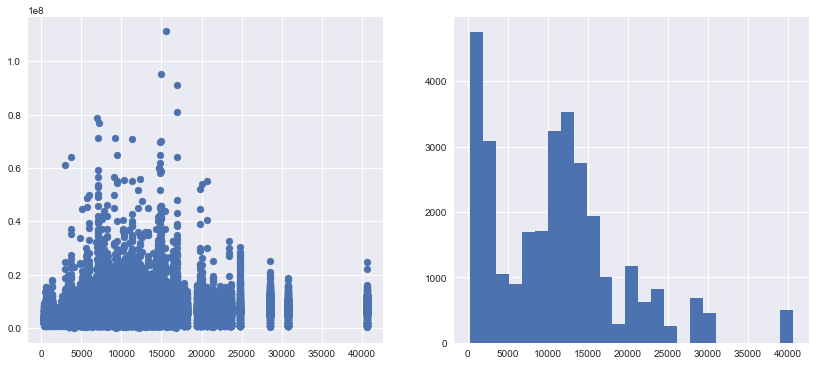

In [46]:
fig, axes = plt.subplots(1,2,figsize=[14,6])
axes[0].scatter(train['young_all'], train['price_doc'])
_ = axes[1].hist(train['young_all'].dropna(), bins=25)

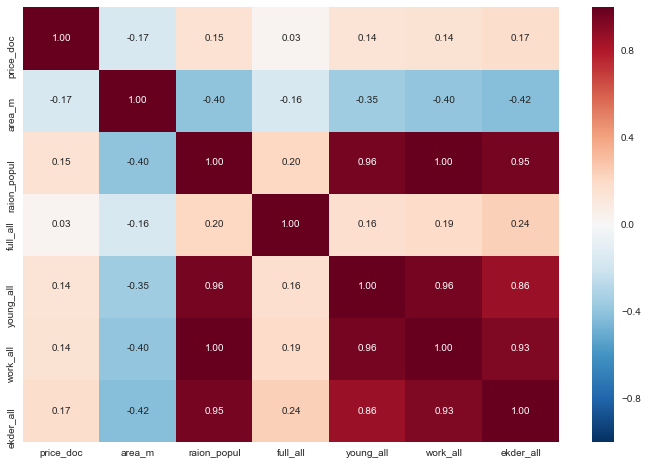

In [47]:
corr = train[['price_doc', 'area_m', 'raion_popul', 'full_all', 'young_all', 'work_all', 'ekder_all']].corr()

fig, ax = plt.subplots(figsize=[12,8])
sns.heatmap(corr, annot=True, fmt=".2f")

## School:

In [48]:
col_school = ['children_preschool', 'preschool_quota', 'preschool_education_centers_raion', 'children_school',
              'school_quota', 'school_education_centers_raion', 'school_education_centers_top_20_raion',
              'university_top_20_raion', 'additional_education_raion', 
              'additional_education_km', 'preschool_km', 'school_km']

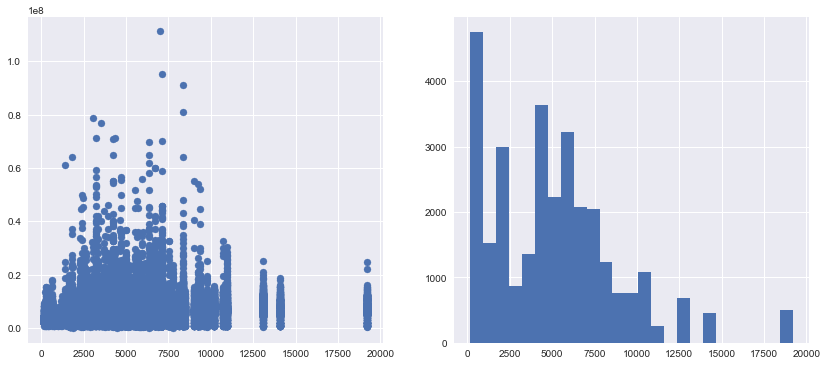

In [49]:
fig, axes = plt.subplots(1,2,figsize=[14,6])
axes[0].scatter(train['children_preschool'], train['price_doc'])
_ = axes[1].hist(train['children_preschool'].dropna(), bins=25)

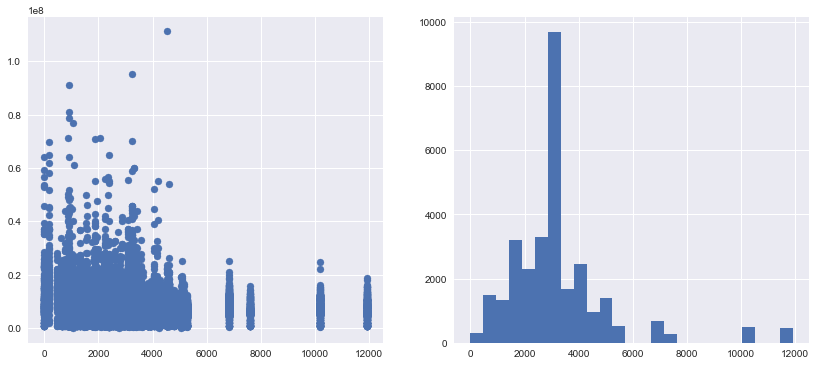

In [50]:
fig, axes = plt.subplots(1,2,figsize=[14,6])
axes[0].scatter(train['preschool_quota'], train['price_doc'])
_ = axes[1].hist(train['preschool_quota'].dropna(), bins=25)

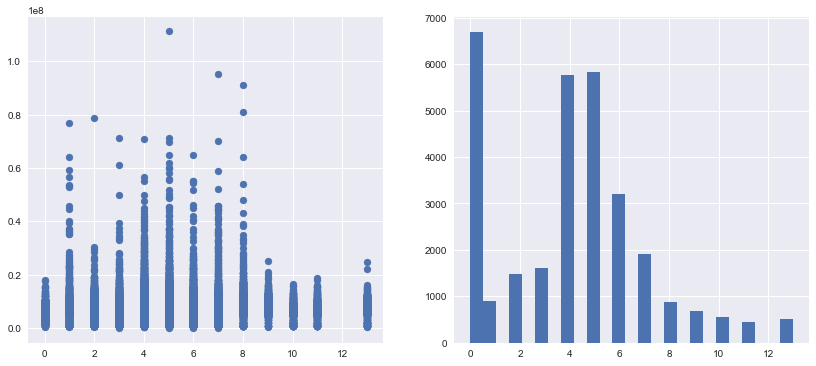

In [51]:
fig, axes = plt.subplots(1,2,figsize=[14,6])
axes[0].scatter(train['preschool_education_centers_raion'], train['price_doc'])
_ = axes[1].hist(train['preschool_education_centers_raion'].dropna(), bins=25)

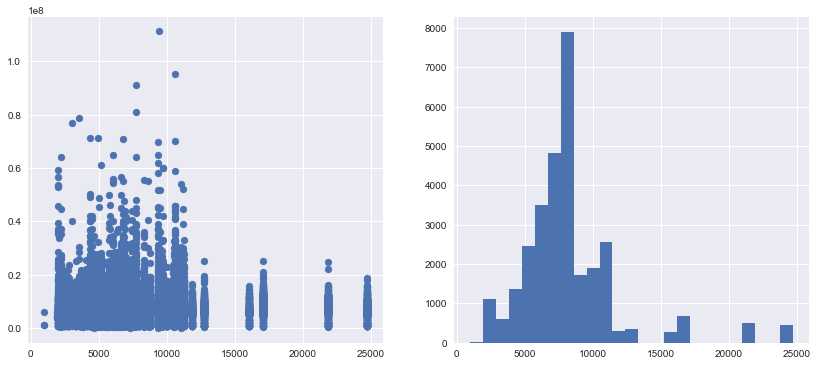

In [52]:
fig, axes = plt.subplots(1,2,figsize=[14,6])
axes[0].scatter(train['school_quota'], train['price_doc'])
_ = axes[1].hist(train['school_quota'].dropna(), bins=25)

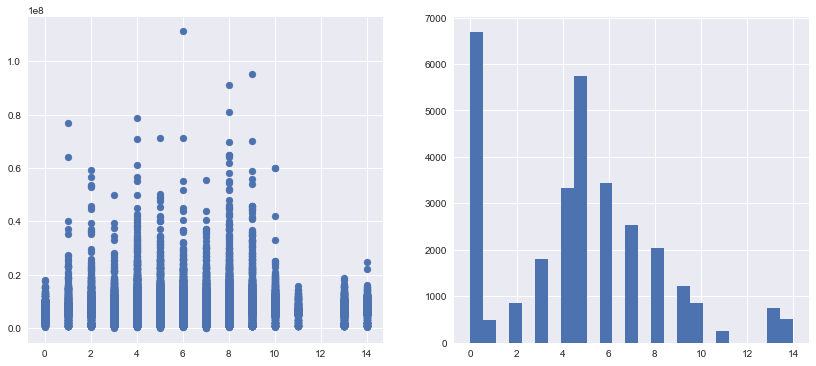

In [53]:
fig, axes = plt.subplots(1,2,figsize=[14,6])
axes[0].scatter(train['school_education_centers_raion'], train['price_doc'])
_ = axes[1].hist(train['school_education_centers_raion'].dropna(), bins=25)

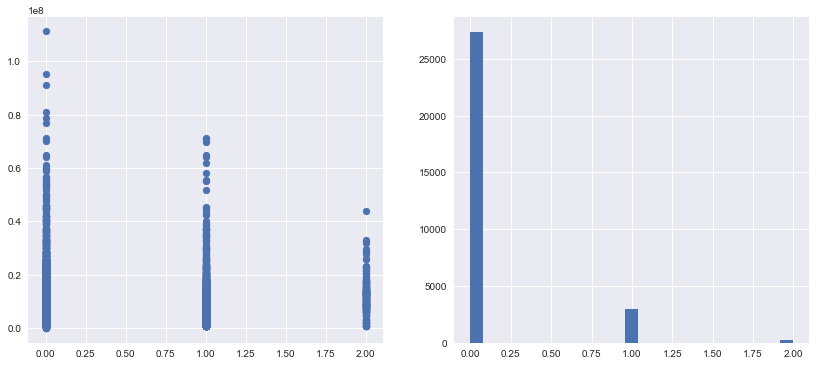

In [54]:
fig, axes = plt.subplots(1,2,figsize=[14,6])
axes[0].scatter(train['school_education_centers_top_20_raion'], train['price_doc'])
_ = axes[1].hist(train['school_education_centers_top_20_raion'].dropna(), bins=25)

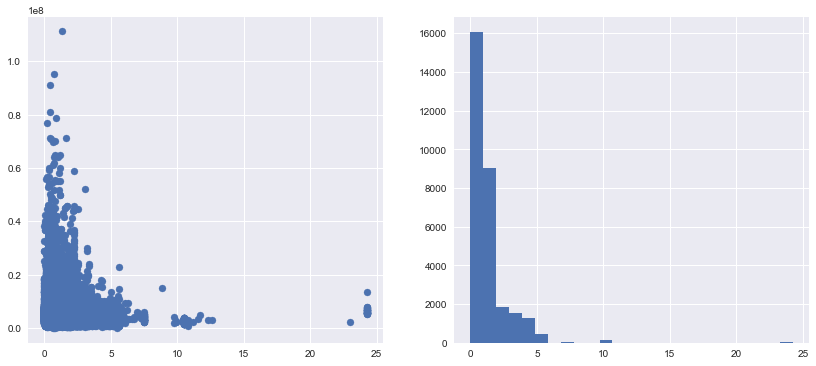

In [55]:
fig, axes = plt.subplots(1,2,figsize=[14,6])
axes[0].scatter(train['additional_education_km'], train['price_doc'])
_ = axes[1].hist(train['additional_education_km'].dropna(), bins=25)

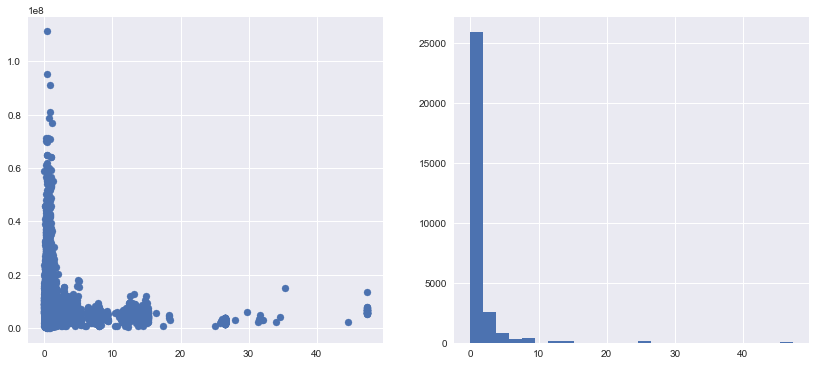

In [56]:
fig, axes = plt.subplots(1,2,figsize=[14,6])
axes[0].scatter(train['preschool_km'], train['price_doc'])
_ = axes[1].hist(train['preschool_km'].dropna(), bins=25)

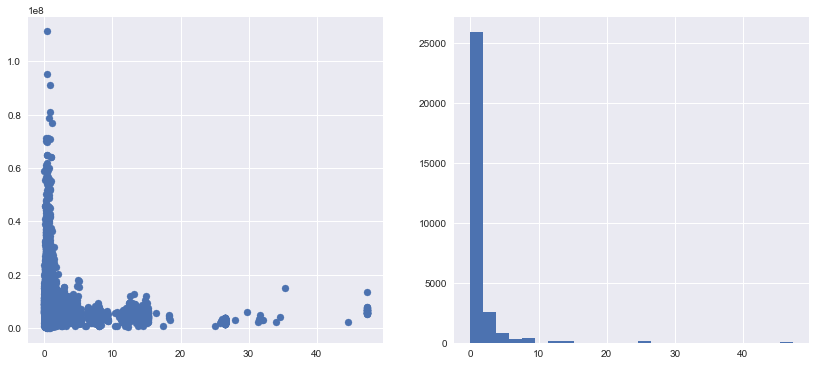

In [57]:
fig, axes = plt.subplots(1,2,figsize=[14,6])
axes[0].scatter(train['school_km'], train['price_doc'])
_ = axes[1].hist(train['school_km'].dropna(), bins=25)

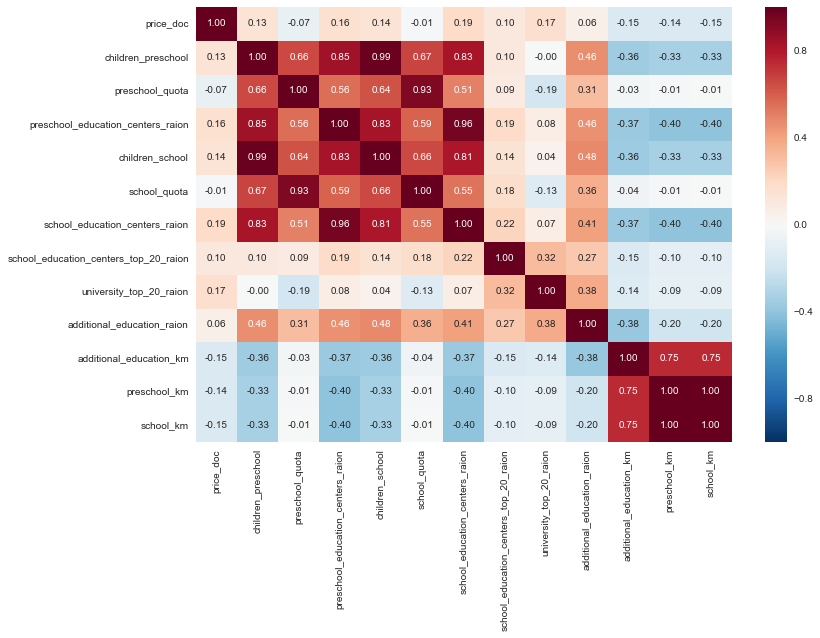

In [58]:
corr = train[['price_doc', 'children_preschool', 'preschool_quota', 'preschool_education_centers_raion', 'children_school',
              'school_quota', 'school_education_centers_raion', 'school_education_centers_top_20_raion',
              'university_top_20_raion', 'additional_education_raion', 
              'additional_education_km', 'preschool_km', 'school_km']].corr()

fig, ax = plt.subplots(figsize=[12,8])
sns.heatmap(corr, annot=True, fmt=".2f")

## Culture:

In [59]:
col_culture = ['big_church_km', 'church_synagogue_km', 'big_church_count_500', 
               'big_church_count_1000', 'church_count_1000', 'big_church_count_1500', 'church_count_1500',
               'big_church_count_2000', 'church_count_2000', 'big_church_count_3000', 'church_count_3000',
               'big_church_count_5000', 'church_count_5000', 
               'church_count_500', 'church_count_1000', 'church_count_1500', 'church_count_2000',
               'church_count_3000','church_count_5000',
               'mosque_km', 'mosque_count_1000', 'mosque_count_1500', 'mosque_count_2000',
               'mosque_count_3000', 'mosque_count_5000']



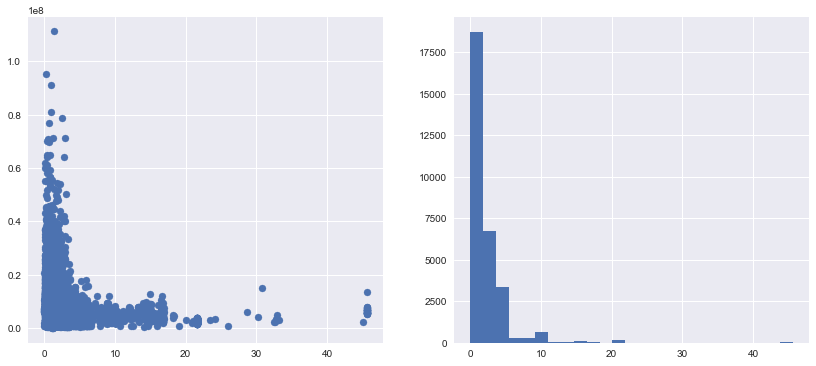

In [60]:
fig, axes = plt.subplots(1,2,figsize=[14,6])
axes[0].scatter(train['big_church_km'], train['price_doc'])
_ = axes[1].hist(train['big_church_km'].dropna(), bins=25)

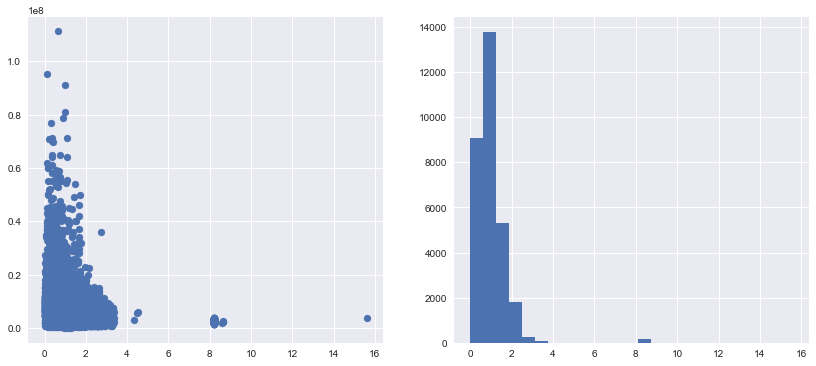

In [61]:
fig, axes = plt.subplots(1,2,figsize=[14,6])
axes[0].scatter(train['church_synagogue_km'], train['price_doc'])
_ = axes[1].hist(train['church_synagogue_km'].dropna(), bins=25)

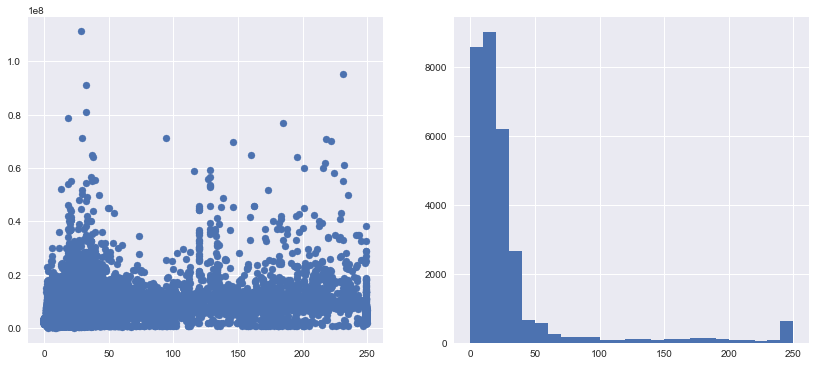

In [62]:
fig, axes = plt.subplots(1,2,figsize=[14,6])
axes[0].scatter(train['church_count_5000'], train['price_doc'])
_ = axes[1].hist(train['church_count_5000'].dropna(), bins=25)

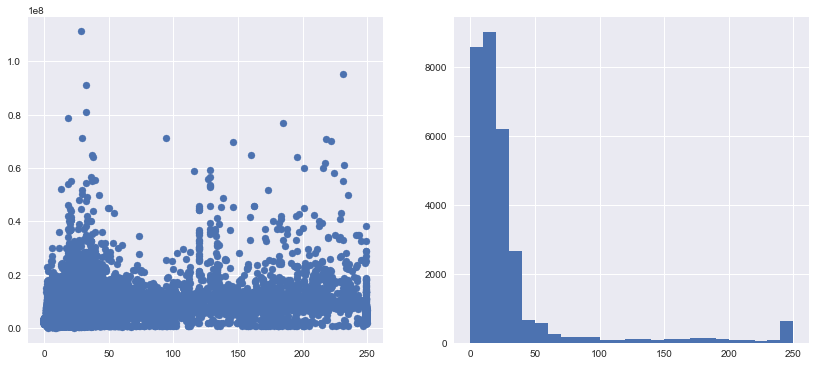

In [63]:
fig, axes = plt.subplots(1,2,figsize=[14,6])
axes[0].scatter(train['church_count_5000'], train['price_doc'])
_ = axes[1].hist(train['church_count_5000'].dropna(), bins=25)

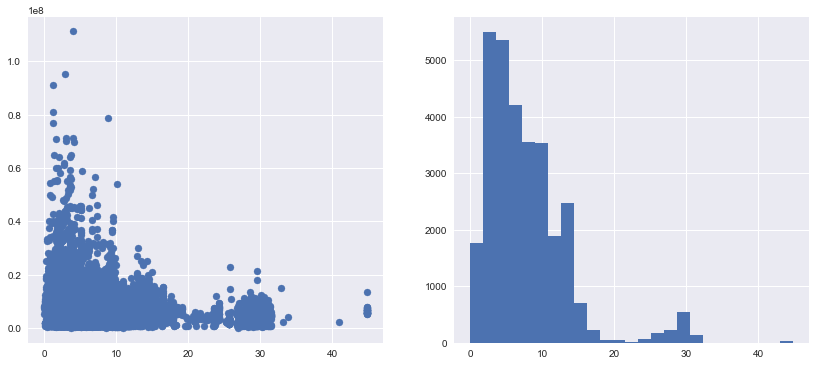

In [64]:
fig, axes = plt.subplots(1,2,figsize=[14,6])
axes[0].scatter(train['mosque_km'], train['price_doc'])
_ = axes[1].hist(train['mosque_km'].dropna(), bins=25)

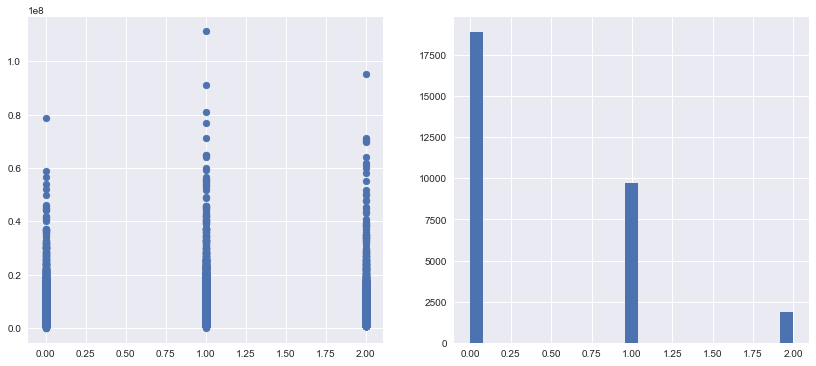

In [65]:
fig, axes = plt.subplots(1,2,figsize=[14,6])
axes[0].scatter(train['mosque_count_5000'], train['price_doc'])
_ = axes[1].hist(train['mosque_count_5000'].dropna(), bins=25)

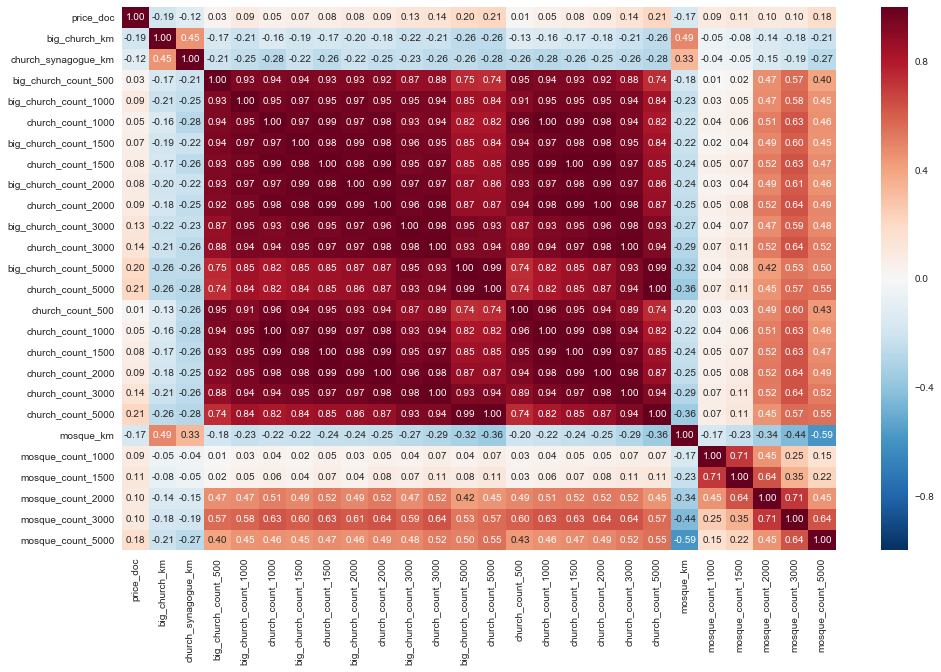

In [66]:
corr = train[['price_doc', 'big_church_km', 'church_synagogue_km', 'big_church_count_500', 
               'big_church_count_1000', 'church_count_1000', 'big_church_count_1500', 'church_count_1500',
               'big_church_count_2000', 'church_count_2000', 'big_church_count_3000', 'church_count_3000',
               'big_church_count_5000', 'church_count_5000', 
               'church_count_500', 'church_count_1000', 'church_count_1500', 'church_count_2000',
               'church_count_3000','church_count_5000',
               'mosque_km', 'mosque_count_1000', 'mosque_count_1500', 'mosque_count_2000',
               'mosque_count_3000', 'mosque_count_5000']].corr()

fig, ax = plt.subplots(figsize=[16,10])
sns.heatmap(corr, annot=True, fmt=".2f")

## Shopping Center:

In [67]:
col_shopping = ['shopping_centers_km', 'shopping_centers_raion', 
                'big_market_raion', 'big_market_km', 'market_shop_km', 'market_count_1000', 'market_count_1500',
                'market_count_2000', 'market_count_3000', 'market_count_5000']

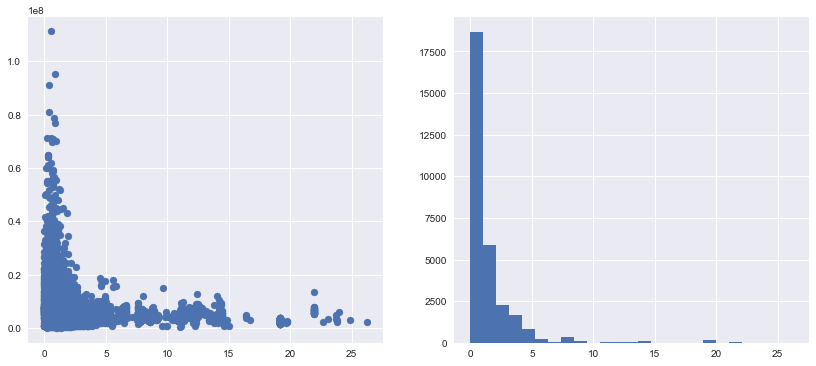

In [68]:
fig, axes = plt.subplots(1,2,figsize=[14,6])
axes[0].scatter(train['shopping_centers_km'], train['price_doc'])
_ = axes[1].hist(train['shopping_centers_km'].dropna(), bins=25)

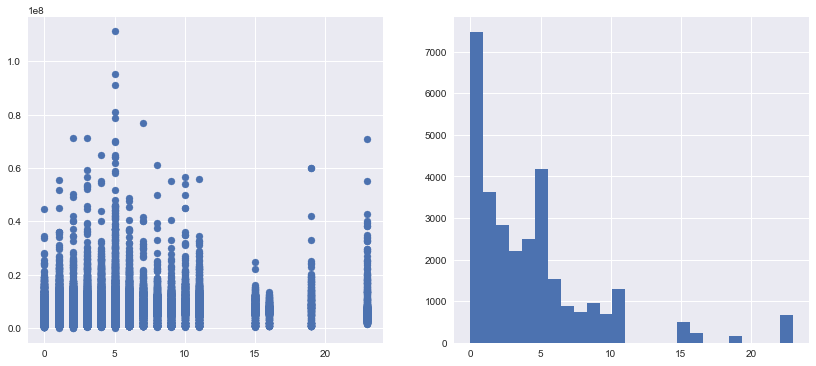

In [69]:
fig, axes = plt.subplots(1,2,figsize=[14,6])
axes[0].scatter(train['shopping_centers_raion'], train['price_doc'])
_ = axes[1].hist(train['shopping_centers_raion'].dropna(), bins=25)

ValueError: First argument must be a sequence

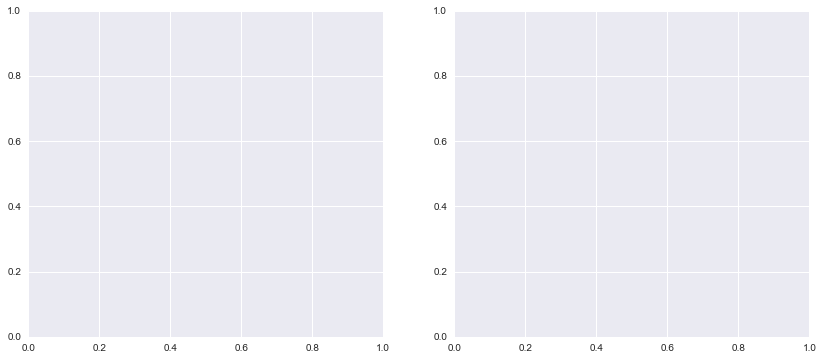

In [70]:
fig, axes = plt.subplots(1,2,figsize=[14,6])
axes[0].scatter(train['big_market_raion'], train['price_doc'])
_ = axes[1].hist(train['big_market_raion'].dropna(), bins=25)

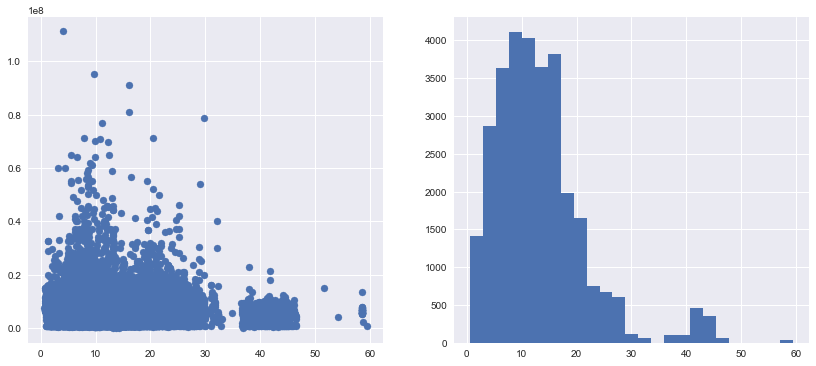

In [71]:
fig, axes = plt.subplots(1,2,figsize=[14,6])
axes[0].scatter(train['big_market_km'], train['price_doc'])
_ = axes[1].hist(train['big_market_km'].dropna(), bins=25)

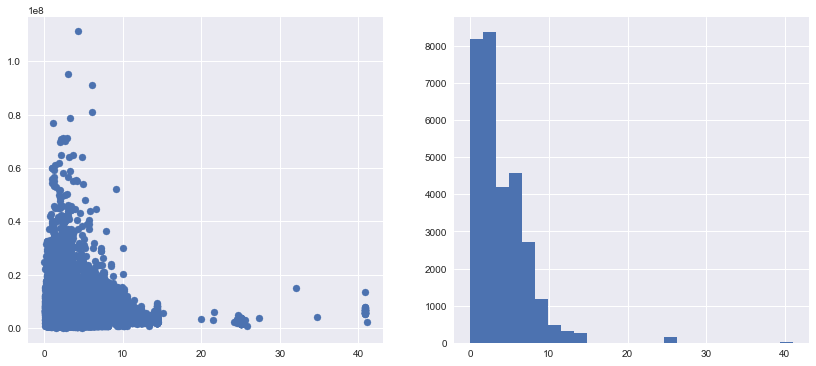

In [72]:
fig, axes = plt.subplots(1,2,figsize=[14,6])
axes[0].scatter(train['market_shop_km'], train['price_doc'])
_ = axes[1].hist(train['market_shop_km'].dropna(), bins=25)

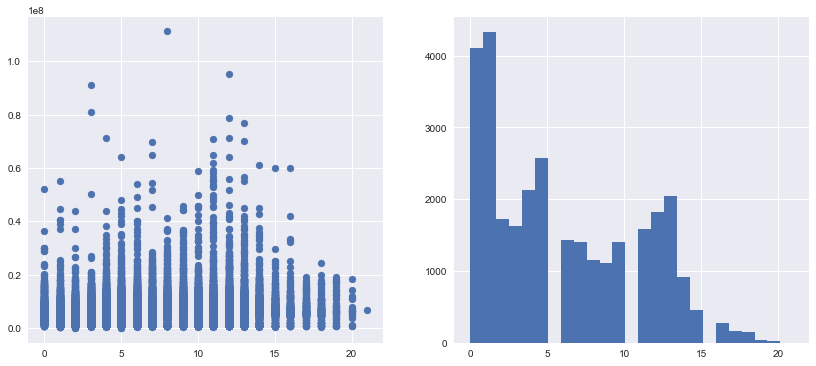

In [73]:
fig, axes = plt.subplots(1,2,figsize=[14,6])
axes[0].scatter(train['market_count_5000'], train['price_doc'])
_ = axes[1].hist(train['market_count_5000'].dropna(), bins=25)

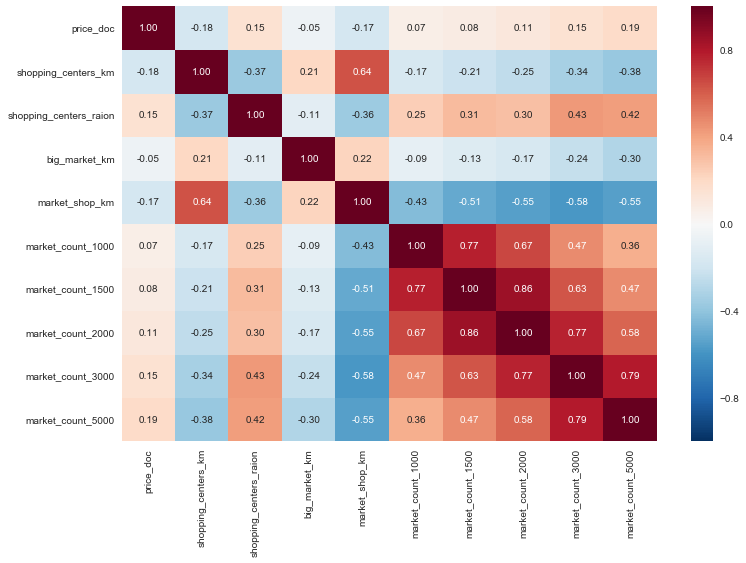

In [74]:
corr = train[['price_doc', 'shopping_centers_km', 'shopping_centers_raion', 
                'big_market_raion', 'big_market_km', 'market_shop_km', 'market_count_1000', 'market_count_1500',
                'market_count_2000', 'market_count_3000', 'market_count_5000']].corr()

fig, ax = plt.subplots(figsize=[12,8])
sns.heatmap(corr, annot=True, fmt=".2f")

## Leisuring Center:

In [75]:
col_leisure = ['sport_count_500', 'sport_count_1000', 'sport_count_1500', 'sport_count_2000', 
               'sport_count_3000', 'sport_count_5000', 'sport_objects_raion', 
               'leisure_count_500', 'leisure_count_1000', 'leisure_count_1500', 'leisure_count_2000', 
               'leisure_count_3000', 'leisure_count_5000',
               'fitness_km', 'swim_pool_km', 'stadium_km', 'museum_km',
               'park_km', 'ice_rink_km', 'basketball_km', 'theater_km', 'exhibition_km', 'catering_km']



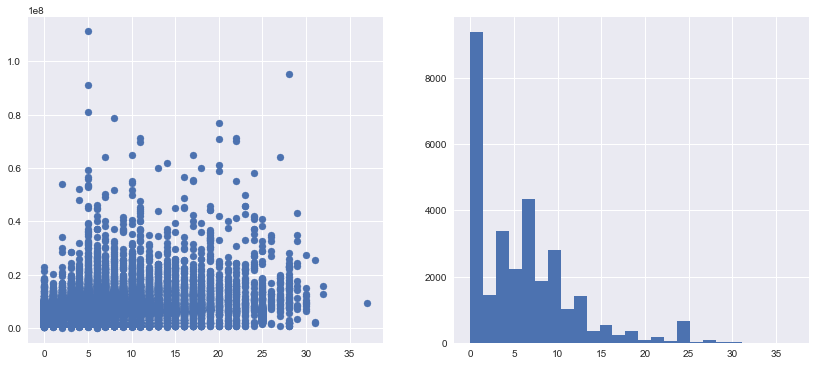

In [76]:
fig, axes = plt.subplots(1,2,figsize=[14,6])
axes[0].scatter(train['sport_count_1500'], train['price_doc'])
_ = axes[1].hist(train['sport_count_1500'].dropna(), bins=25)

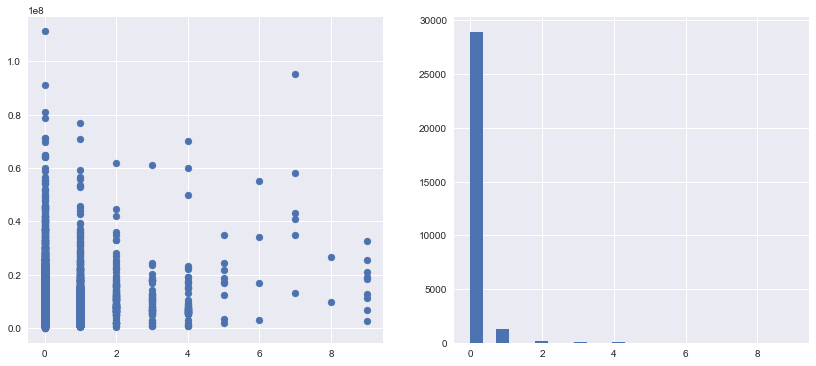

In [77]:
leisure_count_500fig, axes = plt.subplots(1,2,figsize=[14,6])
axes[0].scatter(train['leisure_count_500'], train['price_doc'])
_ = axes[1].hist(train['leisure_count_500'].dropna(), bins=25)

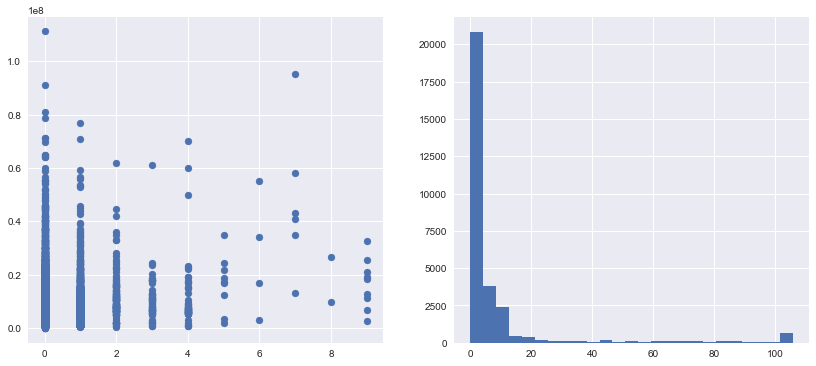

In [78]:
fig, axes = plt.subplots(1,2,figsize=[14,6])
axes[0].scatter(train['leisure_count_500'], train['price_doc'])
_ = axes[1].hist(train['leisure_count_5000'].dropna(), bins=25)

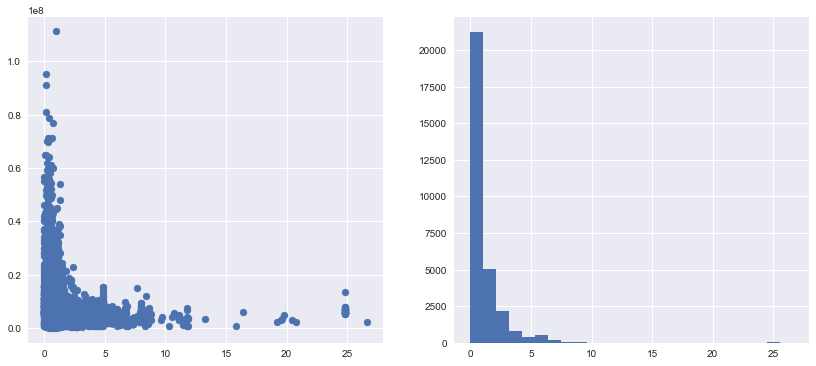

In [79]:
fig, axes = plt.subplots(1,2,figsize=[14,6])
axes[0].scatter(train['fitness_km'], train['price_doc'])
_ = axes[1].hist(train['fitness_km'].dropna(), bins=25)

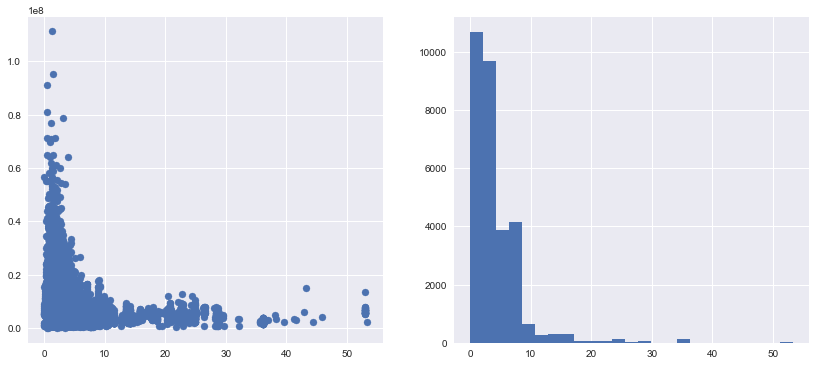

In [80]:
fig, axes = plt.subplots(1,2,figsize=[14,6])
axes[0].scatter(train['swim_pool_km'], train['price_doc'])
_ = axes[1].hist(train['swim_pool_km'].dropna(), bins=25)

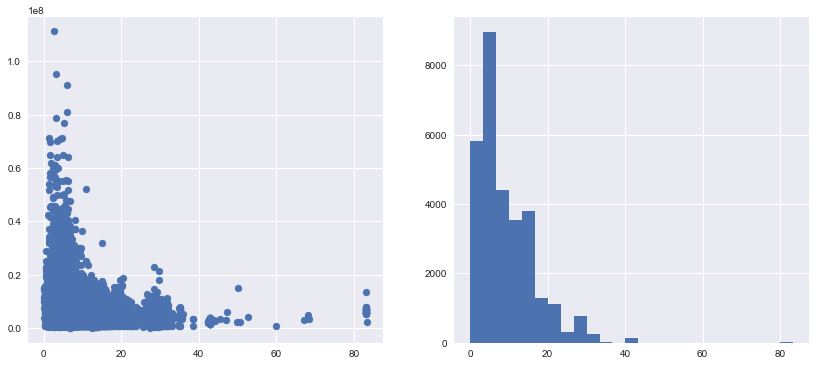

In [81]:
fig, axes = plt.subplots(1,2,figsize=[14,6])
axes[0].scatter(train['stadium_km'], train['price_doc'])
_ = axes[1].hist(train['stadium_km'].dropna(), bins=25)

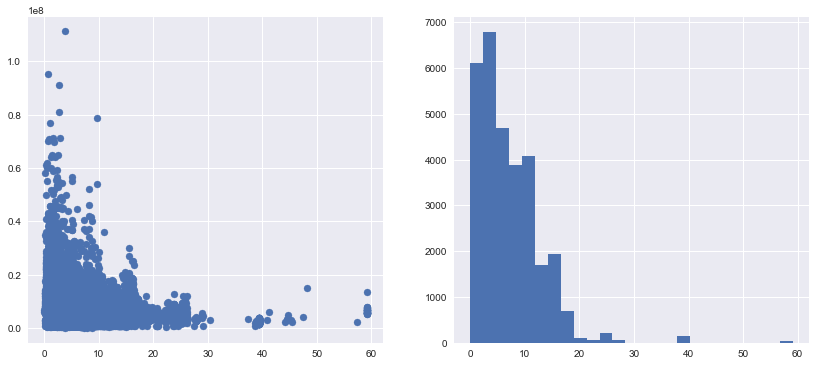

In [82]:
fig, axes = plt.subplots(1,2,figsize=[14,6])
axes[0].scatter(train['museum_km'], train['price_doc'])
_ = axes[1].hist(train['museum_km'].dropna(), bins=25)

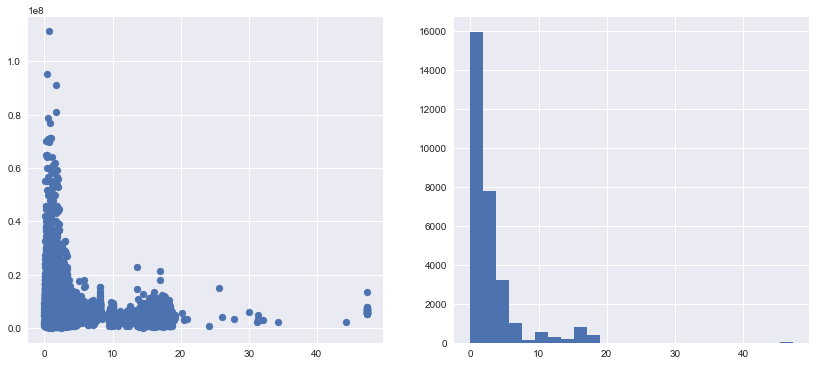

In [83]:
fig, axes = plt.subplots(1,2,figsize=[14,6])
axes[0].scatter(train['park_km'], train['price_doc'])
_ = axes[1].hist(train['park_km'].dropna(), bins=25)

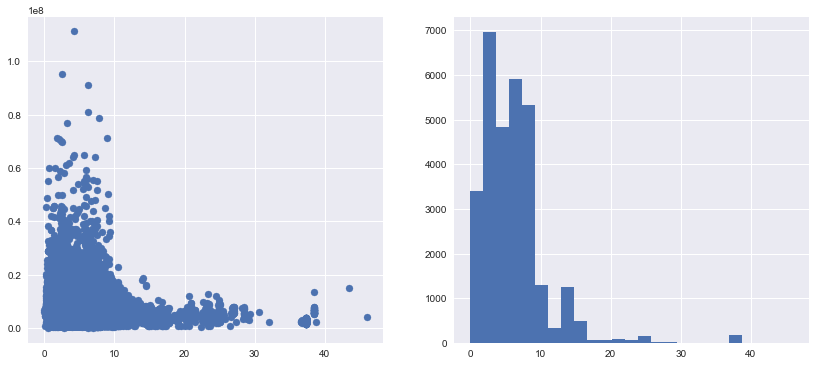

In [84]:
fig, axes = plt.subplots(1,2,figsize=[14,6])
axes[0].scatter(train['ice_rink_km'], train['price_doc'])
_ = axes[1].hist(train['ice_rink_km'].dropna(), bins=25)

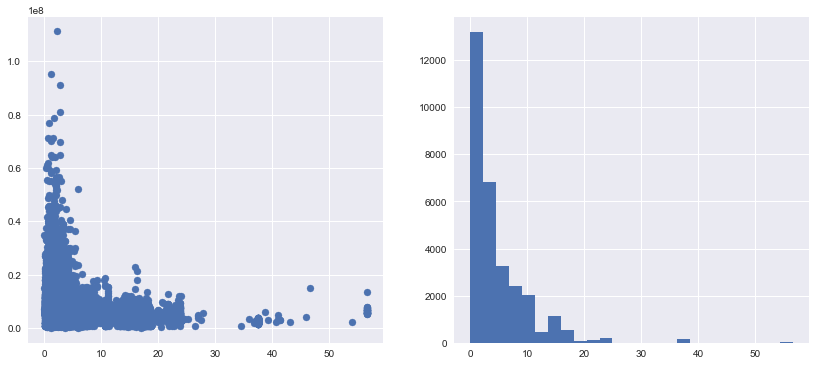

In [85]:
fig, axes = plt.subplots(1,2,figsize=[14,6])
axes[0].scatter(train['basketball_km'], train['price_doc'])
_ = axes[1].hist(train['basketball_km'].dropna(), bins=25)

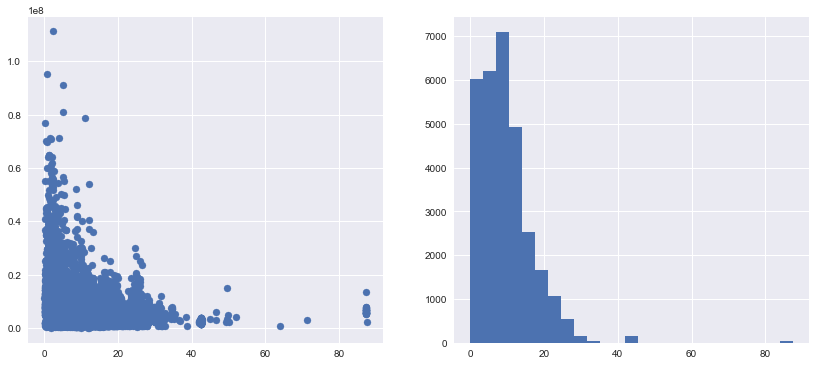

In [86]:
fig, axes = plt.subplots(1,2,figsize=[14,6])
axes[0].scatter(train['theater_km'], train['price_doc'])
_ = axes[1].hist(train['theater_km'].dropna(), bins=25)

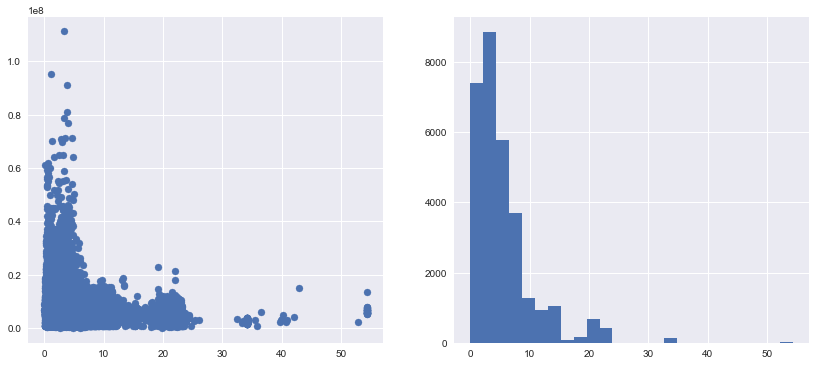

In [87]:
fig, axes = plt.subplots(1,2,figsize=[14,6])
axes[0].scatter(train['exhibition_km'], train['price_doc'])
_ = axes[1].hist(train['exhibition_km'].dropna(), bins=25)

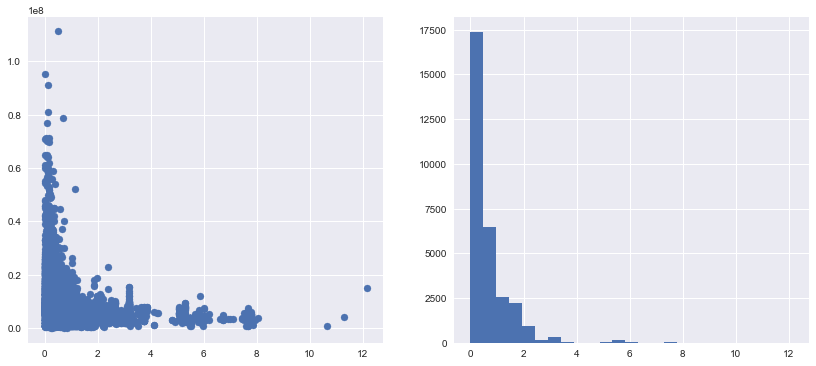

In [88]:
fig, axes = plt.subplots(1,2,figsize=[14,6])
axes[0].scatter(train['catering_km'], train['price_doc'])
_ = axes[1].hist(train['catering_km'].dropna(), bins=25)

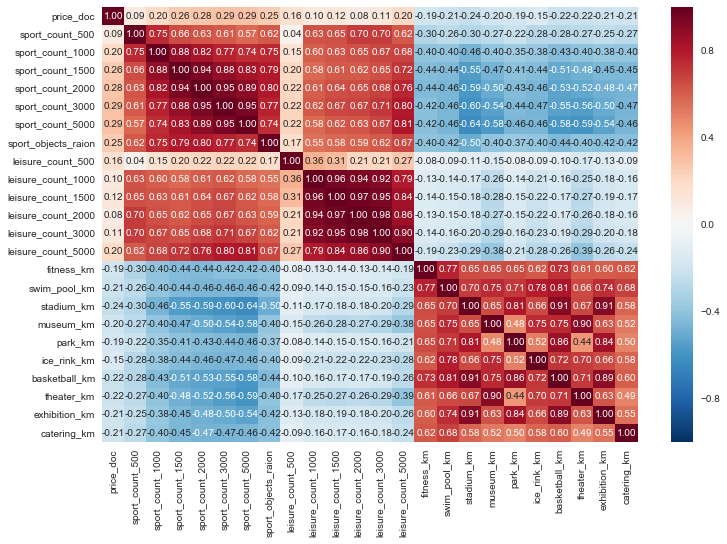

In [89]:
corr = train[['price_doc', 'sport_count_500', 'sport_count_1000', 'sport_count_1500', 'sport_count_2000', 
               'sport_count_3000', 'sport_count_5000', 'sport_objects_raion', 
               'leisure_count_500', 'leisure_count_1000', 'leisure_count_1500', 'leisure_count_2000', 
               'leisure_count_3000', 'leisure_count_5000',
               'fitness_km', 'swim_pool_km', 'stadium_km', 'museum_km',
               'park_km', 'ice_rink_km', 'basketball_km', 'theater_km', 'exhibition_km', 'catering_km']].corr()

fig, ax = plt.subplots(figsize=[12,8])
sns.heatmap(corr, annot=True, fmt=".2f")

## Office:

In [90]:
col_office = ['office_km', 'office_count_500', 'office_count_1000','office_count_1500','office_count_2000',
              'office_count_3000','office_count_5000',
              'office_sqm_500', 'office_sqm_1000', 'office_sqm_1500', 'office_sqm_2000',
              'office_sqm_3000', 'office_sqm_5000']



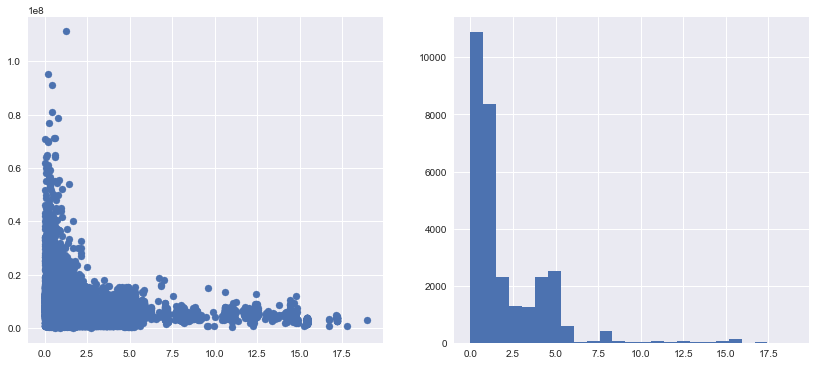

In [91]:
fig, axes = plt.subplots(1,2,figsize=[14,6])
axes[0].scatter(train['office_km'], train['price_doc'])
_ = axes[1].hist(train['office_km'].dropna(), bins=25)

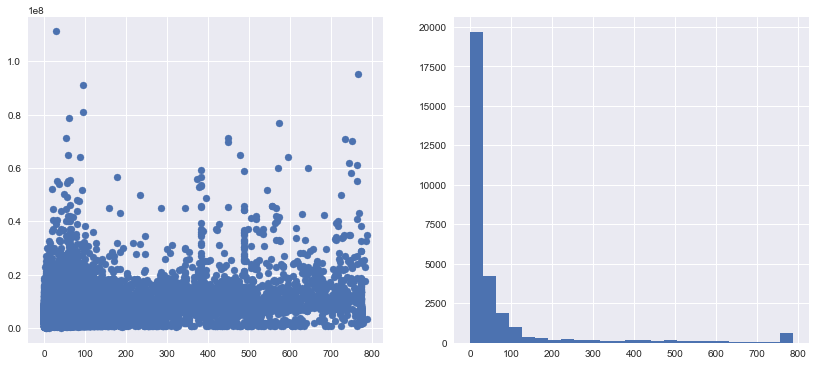

In [92]:
fig, axes = plt.subplots(1,2,figsize=[14,6])
axes[0].scatter(train['office_count_5000'], train['price_doc'])
_ = axes[1].hist(train['office_count_5000'].dropna(), bins=25)

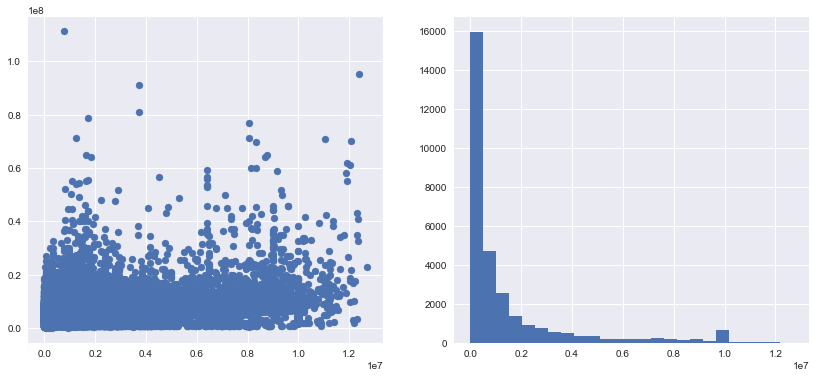

In [93]:
fig, axes = plt.subplots(1,2,figsize=[14,6])
axes[0].scatter(train['office_sqm_5000'], train['price_doc'])
_ = axes[1].hist(train['office_sqm_5000'].dropna(), bins=25)

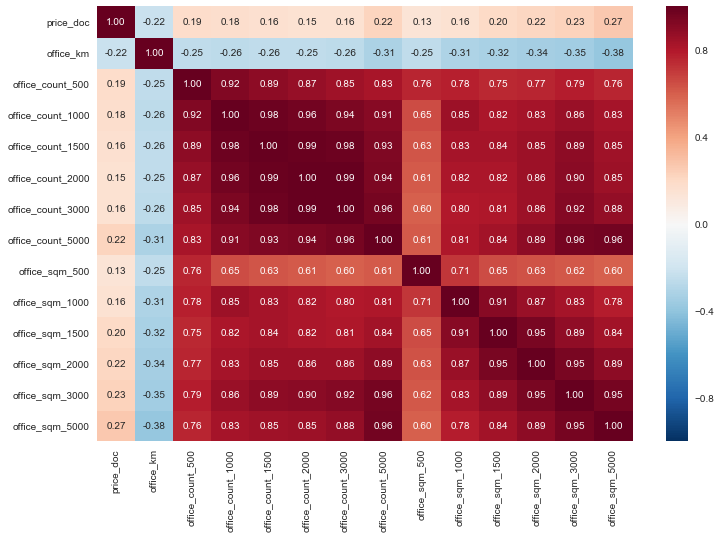

In [94]:
corr = train[['price_doc', 'office_km', 'office_count_500', 'office_count_1000','office_count_1500','office_count_2000',
              'office_count_3000','office_count_5000',
              'office_sqm_500', 'office_sqm_1000', 'office_sqm_1500', 'office_sqm_2000',
              'office_sqm_3000', 'office_sqm_5000']].corr()

fig, ax = plt.subplots(figsize=[12,8])
sns.heatmap(corr, annot=True, fmt=".2f")

## Infrastructures:

In [95]:
col_infrstructure = ['nuclear_reactor_km', 'nuclear_reactor_raion',
                     'thermal_power_plant_km', 'thermal_power_plant_raion',
                     'power_transmission_line_km',
                     'indust_part', 'industrial_km', 
                     'incineration_km', 'incineration_raion',
                     'water_treatment_km', 'water_km', 'water_1line', 
                     'mkad_km', 'ttk_km', 'sadovoe_km']



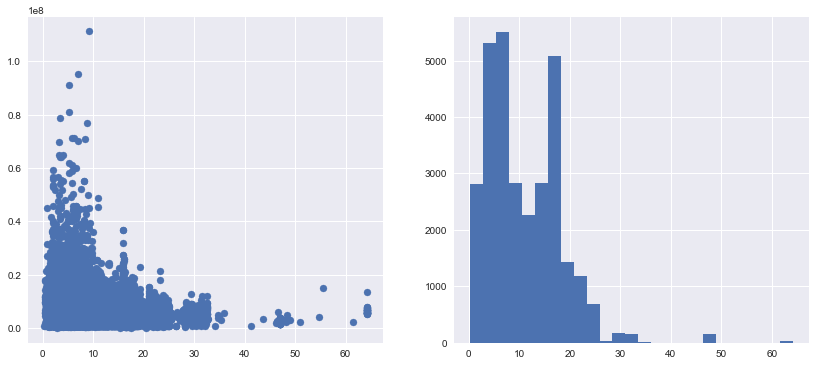

In [96]:
fig, axes = plt.subplots(1,2,figsize=[14,6])
axes[0].scatter(train['nuclear_reactor_km'], train['price_doc'])
_ = axes[1].hist(train['nuclear_reactor_km'].dropna(), bins=25)

In [97]:
train['nuclear_reactor_raion']

0        no
1        no
2        no
3        no
4        no
5        no
6        no
7        no
8        no
9        no
10       no
11       no
12       no
14       no
13       no
15       no
16       no
17       no
18       no
19       no
20       no
21       no
22       no
23       no
24       no
25       no
28       no
26       no
27       no
31       no
         ..
30447    no
30446    no
30445    no
30444    no
30442    no
30441    no
30440    no
30439    no
30443    no
30460    no
30459    no
30458    no
30456    no
30455    no
30457    no
30453    no
30452    no
30451    no
30450    no
30454    no
30469    no
30461    no
30462    no
30463    no
30464    no
30465    no
30466    no
30467    no
30468    no
30470    no
Name: nuclear_reactor_raion, dtype: object

ValueError: First argument must be a sequence

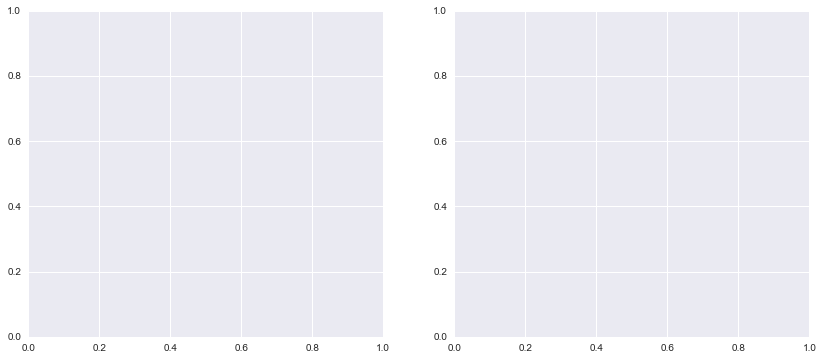

In [98]:
fig, axes = plt.subplots(1,2,figsize=[14,6])
axes[0].scatter(train['nuclear_reactor_raion'], train['price_doc'])
_ = axes[1].hist(train['nuclear_reactor_raion'].dropna(), bins=25)

In [ ]:
fig, axes = plt.subplots(1,2,figsize=[14,6])
axes[0].scatter(train['thermal_power_plant_km'], train['price_doc'])
_ = axes[1].hist(train['thermal_power_plant_km'].dropna(), bins=25)

In [ ]:
fig, axes = plt.subplots(1,2,figsize=[14,6])
axes[0].scatter(train['thermal_power_plant_raion'], train['price_doc'])
_ = axes[1].hist(train['thermal_power_plant_raion'].dropna(), bins=25)

In [ ]:
fig, axes = plt.subplots(1,2,figsize=[14,6])
axes[0].scatter(train['power_transmission_line_km'], train['price_doc'])
_ = axes[1].hist(train['power_transmission_line_km'].dropna(), bins=25)

In [ ]:
fig, axes = plt.subplots(1,2,figsize=[14,6])
axes[0].scatter(train['indust_part'], train['price_doc'])
_ = axes[1].hist(train['indust_part'].dropna(), bins=25)

In [ ]:
fig, axes = plt.subplots(1,2,figsize=[14,6])
axes[0].scatter(train['industrial_km'], train['price_doc'])
_ = axes[1].hist(train['industrial_km'].dropna(), bins=25)

In [ ]:
fig, axes = plt.subplots(1,2,figsize=[14,6])
axes[0].scatter(train['incineration_km'], train['price_doc'])
_ = axes[1].hist(train['incineration_km'].dropna(), bins=25)

In [ ]:
labels = train.incineration_raion.unique().tolist()
mean_price = []
for l in labels:
    mean_price.append(train[train['incineration_raion'] == l].price_doc.mean())
print mean_price    


In [ ]:
labels = train.incineration_raion.unique().tolist()
mean_price = []
counts = []
for l in labels:
    mean_price.append(train[train['incineration_raion'] == l].price_doc.mean())

for l in labels:
    counts.append((train['incineration_raion'] == l).sum())

    
fig, axes = plt.subplots(1,2,figsize=[12,6])


axes[0].pie(mean_price, labels=labels, explode=[0.05, 0], shadow=True)
axes[1].pie(counts, labels=labels, explode=[0.05, 0], shadow=True)


In [ ]:
fig, axes = plt.subplots(1,2,figsize=[14,6])
axes[0].scatter(train['water_treatment_km'], train['price_doc'])
_ = axes[1].hist(train['water_treatment_km'].dropna(), bins=25)

In [ ]:
fig, axes = plt.subplots(1,2,figsize=[14,6])
axes[0].scatter(train['water_km'], train['price_doc'])
_ = axes[1].hist(train['water_km'].dropna(), bins=25)

In [ ]:
labels = train.water_1line.unique().tolist()
mean_price = []
counts = []
for l in labels:
    mean_price.append(train[train['water_1line'] == l].price_doc.mean())

for l in labels:
    counts.append((train['water_1line'] == l).sum())

    
fig, axes = plt.subplots(1,2,figsize=[12,6])


axes[0].pie(mean_price, labels=labels, explode=[0.05, 0], shadow=True)
axes[1].pie(counts, labels=labels, explode=[0.05, 0], shadow=True)


In [ ]:
fig, axes = plt.subplots(1,2,figsize=[14,6])
axes[0].scatter(train['mkad_km'], train['price_doc'])
_ = axes[1].hist(train['mkad_km'].dropna(), bins=25)

In [ ]:
fig, axes = plt.subplots(1,2,figsize=[14,6])
axes[0].scatter(train['ttk_km'], train['price_doc'])
_ = axes[1].hist(train['ttk_km'].dropna(), bins=25)

In [ ]:
fig, axes = plt.subplots(1,2,figsize=[14,6])
axes[0].scatter(train['sadovoe_km'], train['price_doc'])
_ = axes[1].hist(train['sadovoe_km'].dropna(), bins=25)

In [ ]:
corr = train[['price_doc', 'nuclear_reactor_km', 'nuclear_reactor_raion',
                     'thermal_power_plant_km', 'thermal_power_plant_raion',
                     'power_transmission_line_km',
                     'indust_part', 'industrial_km', 
                     'incineration_km', 'incineration_raion',
                     'water_treatment_km', 'water_km', 'water_1line', 
                     'mkad_km', 'ttk_km', 'sadovoe_km']].corr()

fig, ax = plt.subplots(figsize=[12,8])
sns.heatmap(corr, annot=True, fmt=".2f")

## Politic:

In [156]:
col_politic = ['kremlin_km']



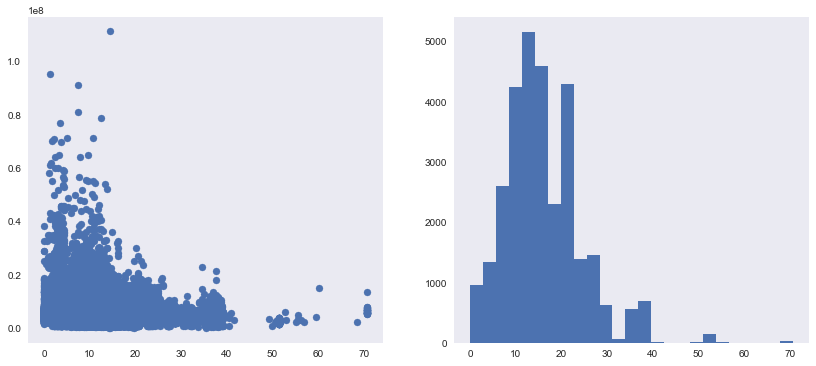

In [157]:
fig, axes = plt.subplots(1,2,figsize=[14,6])
axes[0].scatter(train['kremlin_km'], train['price_doc'])
_ = axes[1].hist(train['kremlin_km'].dropna(), bins=25)

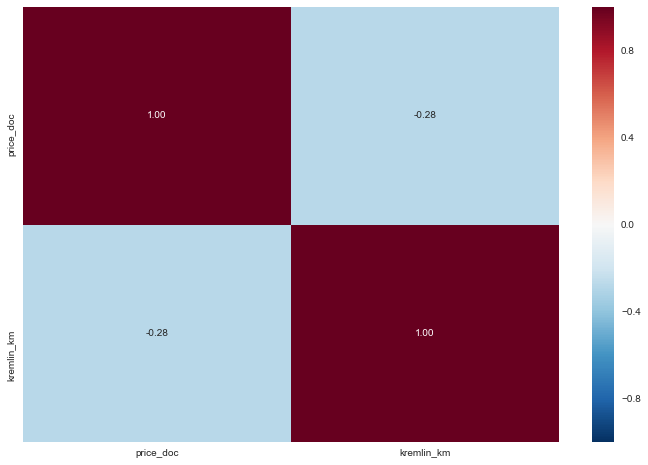

In [158]:
corr = train[['price_doc', 'kremlin_km']].corr()

fig, ax = plt.subplots(figsize=[12,8])
sns.heatmap(corr, annot=True, fmt=".2f")

## transportation:

In [159]:
['railroad_station_walk_km', 'railroad_station_walk_min', 'ID_railroad_station_walk',
'railroad_station_avto_km', 'railroad_station_avto_min', 'ID_railroad_station_avto',
'railroad_terminal_raion', 'railroad_km', 'railroad_1line', 'zd_vokzaly_avto_km', 'ID_railroad_terminal',
'big_road1_km', 'ID_big_road1', 'big_road1_1line', 'big_road2_km', 'ID_big_road2', 'railroad_km',
'railroad_1line', 'zd_vokzaly_avto_km', 'ID_railroad_terminal',
'public_transport_station_km', 'public_transport_station_min_walk',
'ID_metro', 'metro_min_avto', 'metro_km_avto', 'metro_min_walk', 'metro_km_walk']

['railroad_station_walk_km',
 'railroad_station_walk_min',
 'ID_railroad_station_walk',
 'railroad_station_avto_km',
 'railroad_station_avto_min',
 'ID_railroad_station_avto',
 'railroad_terminal_raion',
 'railroad_km',
 'railroad_1line',
 'zd_vokzaly_avto_km',
 'ID_railroad_terminal',
 'big_road1_km',
 'ID_big_road1',
 'big_road1_1line',
 'big_road2_km',
 'ID_big_road2',
 'railroad_km',
 'railroad_1line',
 'zd_vokzaly_avto_km',
 'ID_railroad_terminal',
 'public_transport_station_km',
 'public_transport_station_min_walk',
 'ID_metro',
 'metro_min_avto',
 'metro_km_avto',
 'metro_min_walk',
 'metro_km_walk']

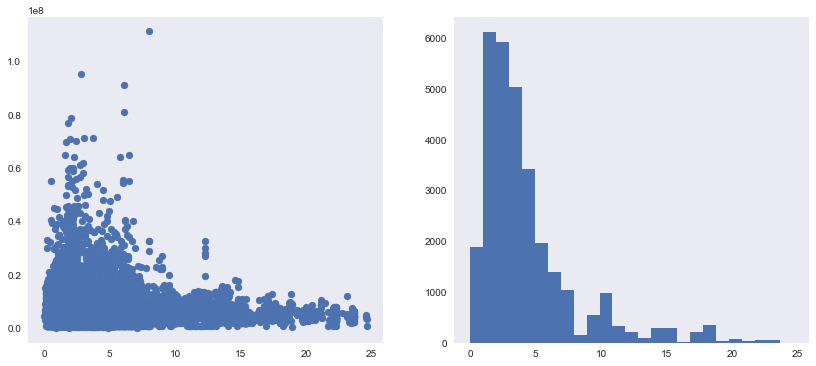

In [160]:
fig, axes = plt.subplots(1,2,figsize=[14,6])
axes[0].scatter(train['railroad_station_walk_km'], train['price_doc'])
_ = axes[1].hist(train['railroad_station_walk_km'].dropna(), bins=25)

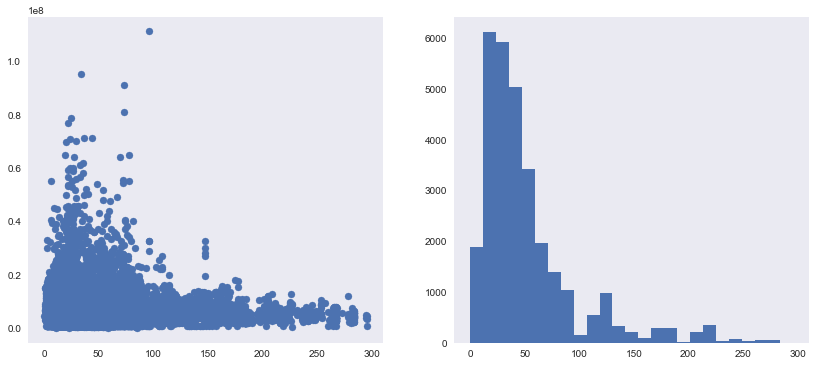

In [161]:
fig, axes = plt.subplots(1,2,figsize=[14,6])
axes[0].scatter(train['railroad_station_walk_min'], train['price_doc'])
_ = axes[1].hist(train['railroad_station_walk_min'].dropna(), bins=25)

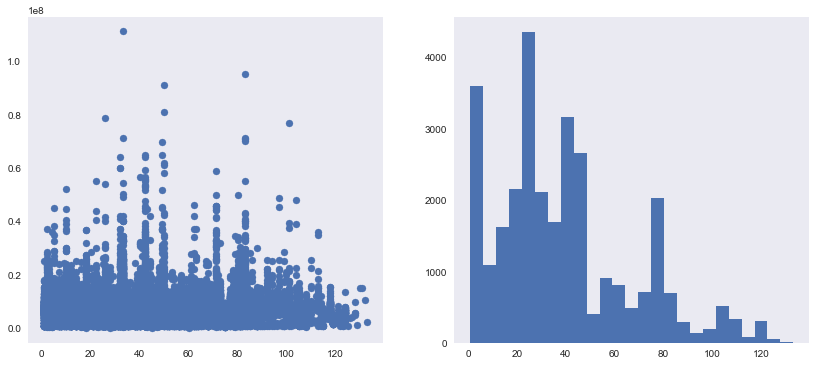

In [162]:
fig, axes = plt.subplots(1,2,figsize=[14,6])
axes[0].scatter(train['ID_railroad_station_walk'], train['price_doc'])
_ = axes[1].hist(train['ID_railroad_station_walk'].dropna(), bins=25)

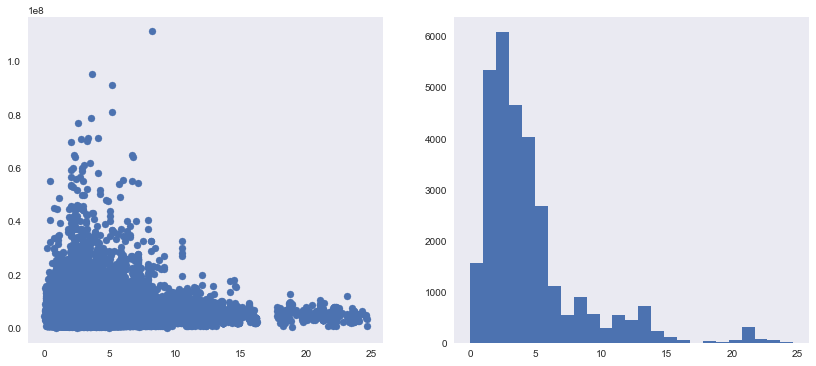

In [163]:
fig, axes = plt.subplots(1,2,figsize=[14,6])
axes[0].scatter(train['railroad_station_avto_km'], train['price_doc'])
_ = axes[1].hist(train['railroad_station_avto_km'].dropna(), bins=25)

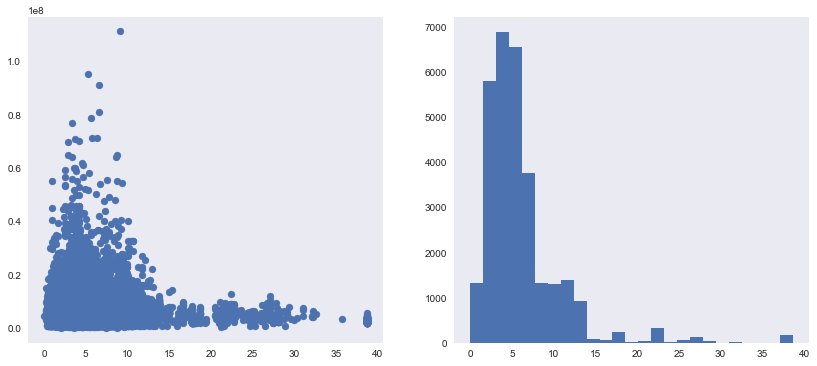

In [164]:
fig, axes = plt.subplots(1,2,figsize=[14,6])
axes[0].scatter(train['railroad_station_avto_min'], train['price_doc'])
_ = axes[1].hist(train['railroad_station_avto_min'].dropna(), bins=25)

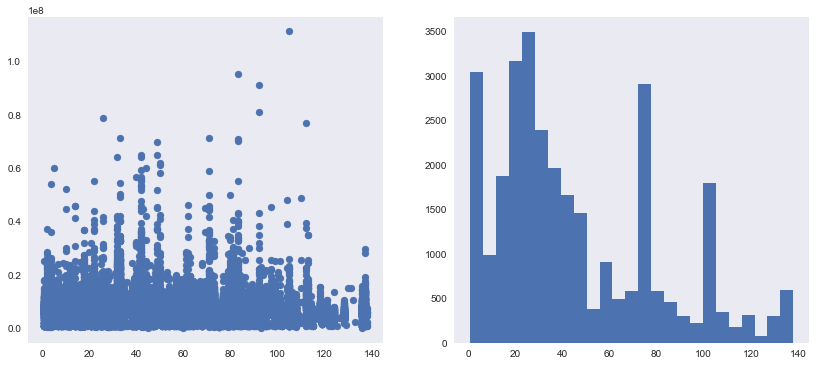

In [165]:
fig, axes = plt.subplots(1,2,figsize=[14,6])
axes[0].scatter(train['ID_railroad_station_avto'], train['price_doc'])
_ = axes[1].hist(train['ID_railroad_station_avto'].dropna(), bins=25)

([<matplotlib.patches.Wedge at 0x52ba8390>,
 [<matplotlib.text.Text at 0x52b8ff60>, <matplotlib.text.Text at 0x52ad0fd0>])

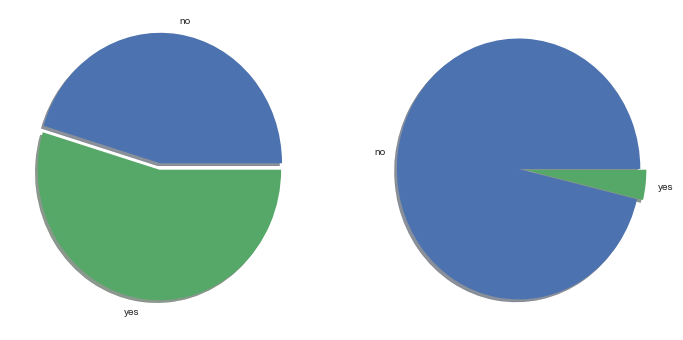

In [166]:
labels = train.railroad_terminal_raion.unique().tolist()
mean_price = []
counts = []
for l in labels:
    mean_price.append(train[train['railroad_terminal_raion'] == l].price_doc.mean())

for l in labels:
    counts.append((train['railroad_terminal_raion'] == l).sum())

    
fig, axes = plt.subplots(1,2,figsize=[12,6])


axes[0].pie(mean_price, labels=labels, explode=[0.05, 0], shadow=True)
axes[1].pie(counts, labels=labels, explode=[0.05, 0], shadow=True)


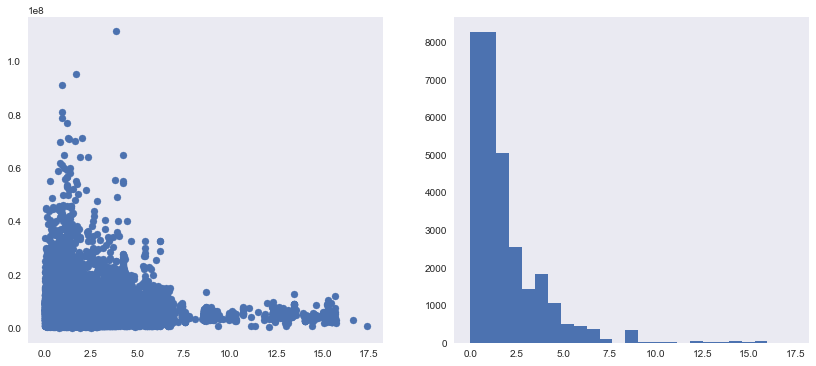

In [167]:
fig, axes = plt.subplots(1,2,figsize=[14,6])
axes[0].scatter(train['railroad_km'], train['price_doc'])
_ = axes[1].hist(train['railroad_km'].dropna(), bins=25)

([<matplotlib.patches.Wedge at 0x536d47b8>,
 [<matplotlib.text.Text at 0x536bcb00>, <matplotlib.text.Text at 0x5360e828>])

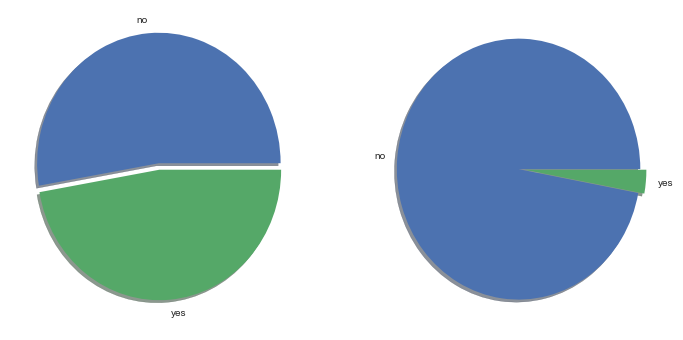

In [168]:
labels = train.railroad_1line.unique().tolist()
mean_price = []
counts = []
for l in labels:
    mean_price.append(train[train['railroad_1line'] == l].price_doc.mean())

for l in labels:
    counts.append((train['railroad_1line'] == l).sum())

    
fig, axes = plt.subplots(1,2,figsize=[12,6])


axes[0].pie(mean_price, labels=labels, explode=[0.05, 0], shadow=True)
axes[1].pie(counts, labels=labels, explode=[0.05, 0], shadow=True)


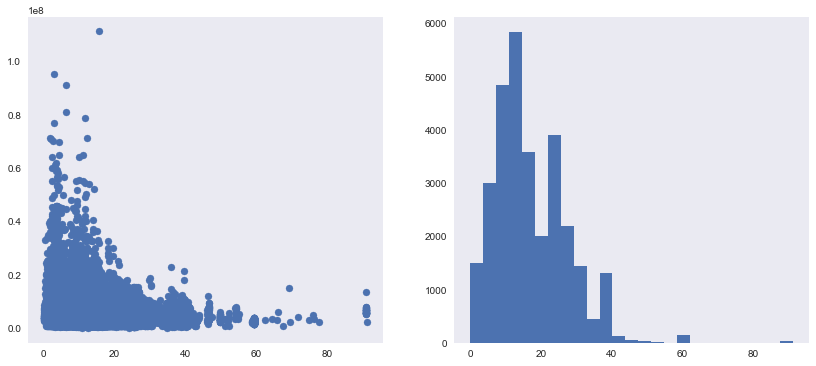

In [169]:
fig, axes = plt.subplots(1,2,figsize=[14,6])
axes[0].scatter(train['zd_vokzaly_avto_km'], train['price_doc'])
_ = axes[1].hist(train['zd_vokzaly_avto_km'].dropna(), bins=25)

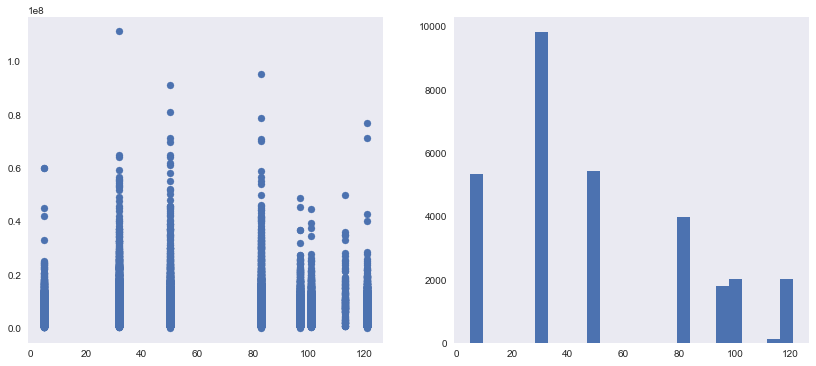

In [170]:
fig, axes = plt.subplots(1,2,figsize=[14,6])
axes[0].scatter(train['ID_railroad_terminal'], train['price_doc'])
_ = axes[1].hist(train['ID_railroad_terminal'].dropna(), bins=25)

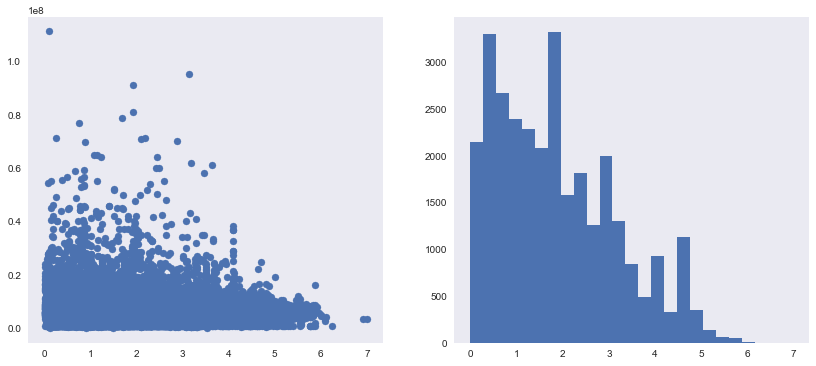

In [171]:
fig, axes = plt.subplots(1,2,figsize=[14,6])
axes[0].scatter(train['big_road1_km'], train['price_doc'])
_ = axes[1].hist(train['big_road1_km'].dropna(), bins=25)

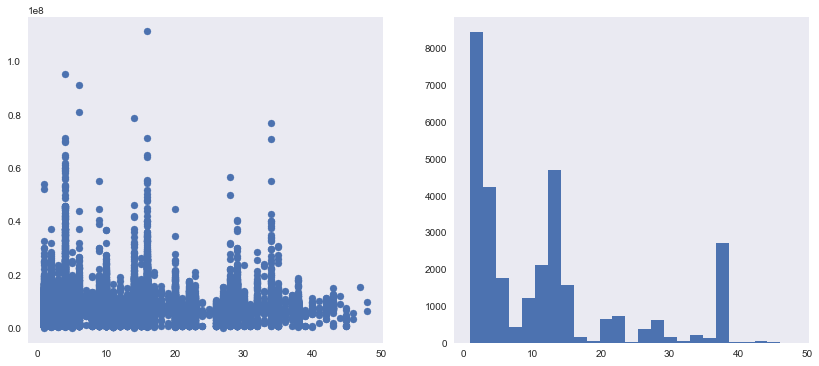

In [172]:
fig, axes = plt.subplots(1,2,figsize=[14,6])
axes[0].scatter(train['ID_big_road1'], train['price_doc'])
_ = axes[1].hist(train['ID_big_road1'].dropna(), bins=25)

([<matplotlib.patches.Wedge at 0x53073550>,
 [<matplotlib.text.Text at 0x52faa160>, <matplotlib.text.Text at 0x53795358>])

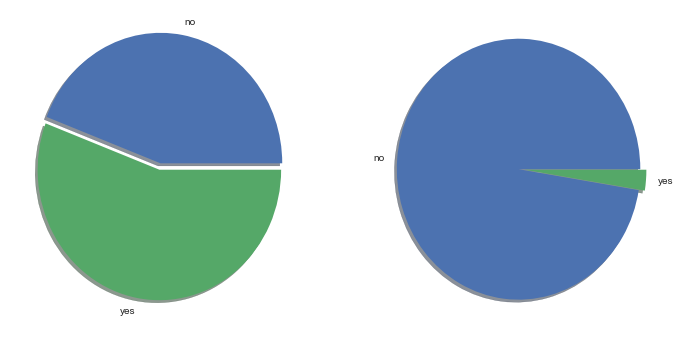

In [173]:
labels = train.big_road1_1line.unique().tolist()
mean_price = []
counts = []
for l in labels:
    mean_price.append(train[train['big_road1_1line'] == l].price_doc.mean())

for l in labels:
    counts.append((train['big_road1_1line'] == l).sum())

    
fig, axes = plt.subplots(1,2,figsize=[12,6])


axes[0].pie(mean_price, labels=labels, explode=[0.05, 0], shadow=True)
axes[1].pie(counts, labels=labels, explode=[0.05, 0], shadow=True)


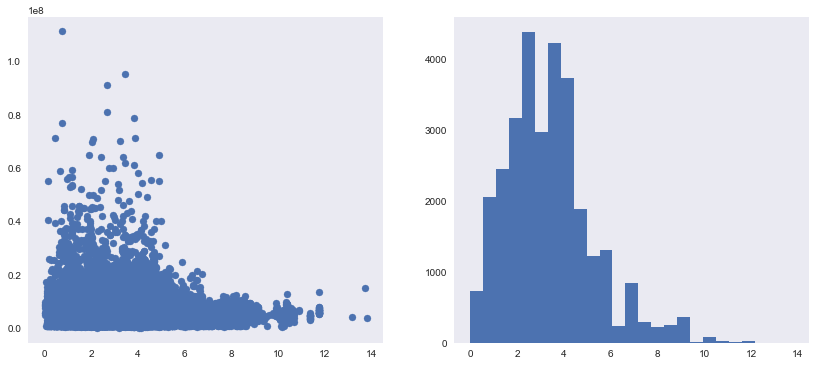

In [174]:
fig, axes = plt.subplots(1,2,figsize=[14,6])
axes[0].scatter(train['big_road2_km'], train['price_doc'])
_ = axes[1].hist(train['big_road2_km'].dropna(), bins=25)

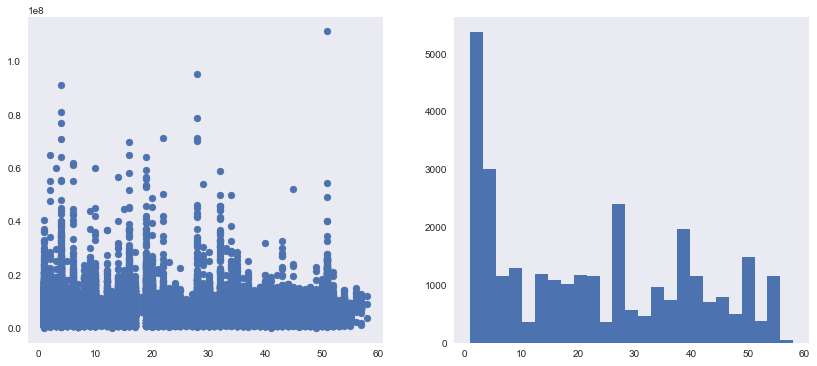

In [175]:
fig, axes = plt.subplots(1,2,figsize=[14,6])
axes[0].scatter(train['ID_big_road2'], train['price_doc'])
_ = axes[1].hist(train['ID_big_road2'].dropna(), bins=25)

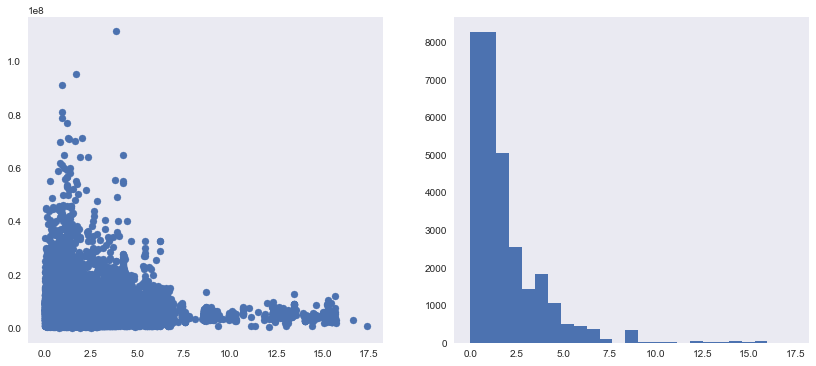

In [176]:
fig, axes = plt.subplots(1,2,figsize=[14,6])
axes[0].scatter(train['railroad_km'], train['price_doc'])
_ = axes[1].hist(train['railroad_km'].dropna(), bins=25)

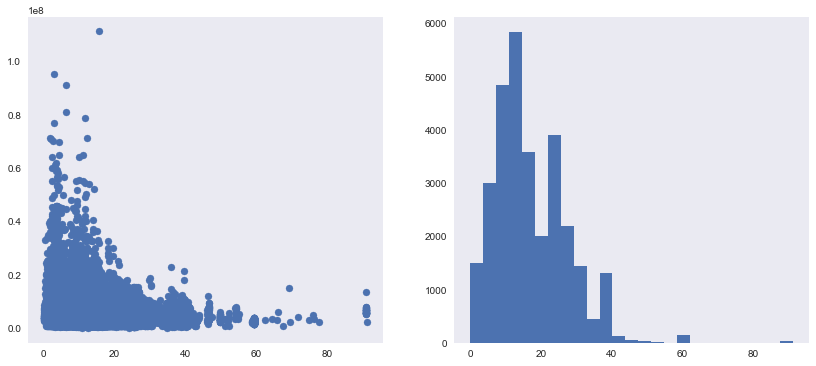

In [177]:
fig, axes = plt.subplots(1,2,figsize=[14,6])
axes[0].scatter(train['zd_vokzaly_avto_km'], train['price_doc'])
_ = axes[1].hist(train['zd_vokzaly_avto_km'].dropna(), bins=25)

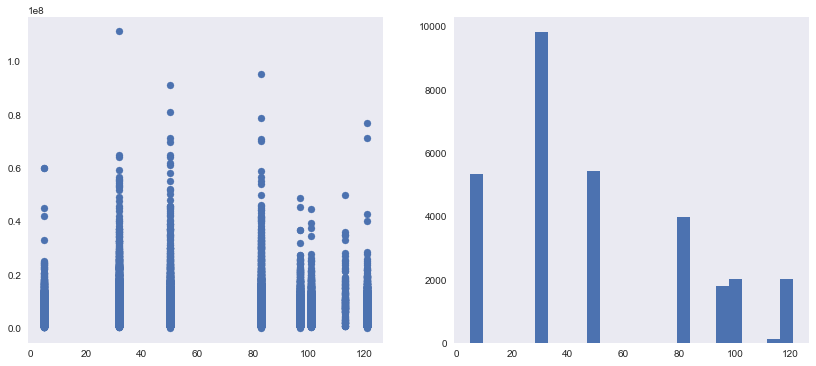

In [178]:
fig, axes = plt.subplots(1,2,figsize=[14,6])
axes[0].scatter(train['ID_railroad_terminal'], train['price_doc'])
_ = axes[1].hist(train['ID_railroad_terminal'].dropna(), bins=25)

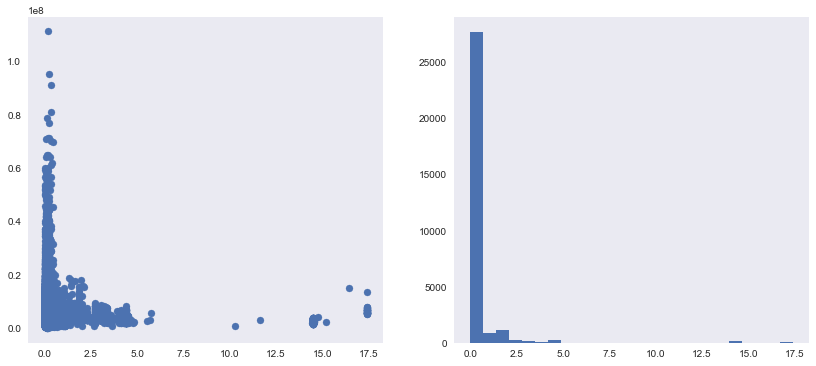

In [179]:
fig, axes = plt.subplots(1,2,figsize=[14,6])
axes[0].scatter(train['public_transport_station_km'], train['price_doc'])
_ = axes[1].hist(train['public_transport_station_km'].dropna(), bins=25)

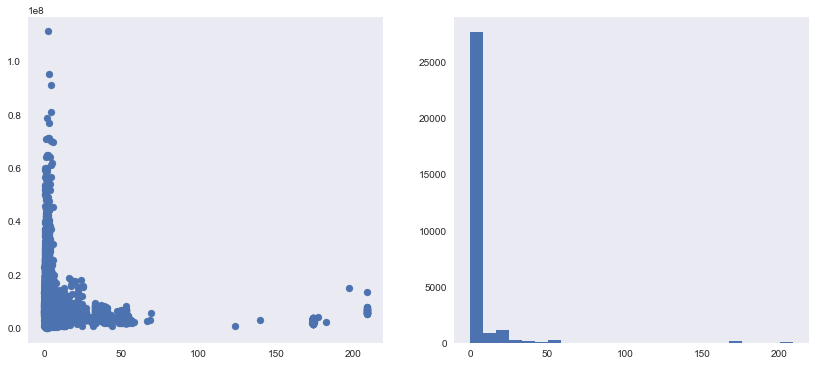

In [180]:
fig, axes = plt.subplots(1,2,figsize=[14,6])
axes[0].scatter(train['public_transport_station_min_walk'], train['price_doc'])
_ = axes[1].hist(train['public_transport_station_min_walk'].dropna(), bins=25)

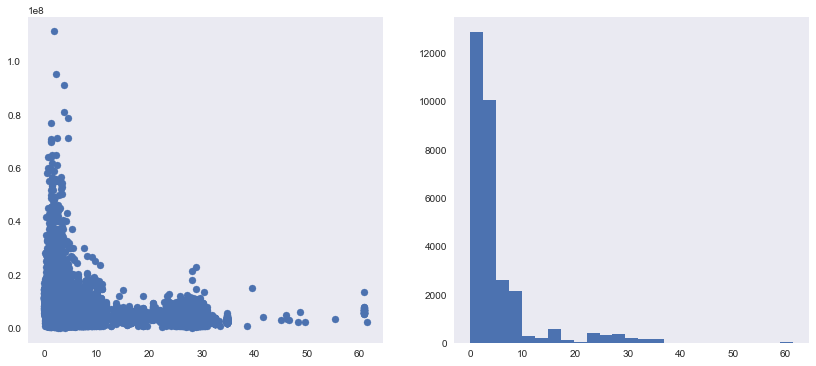

In [181]:
fig, axes = plt.subplots(1,2,figsize=[14,6])
axes[0].scatter(train['metro_min_avto'], train['price_doc'])
_ = axes[1].hist(train['metro_min_avto'].dropna(), bins=25)

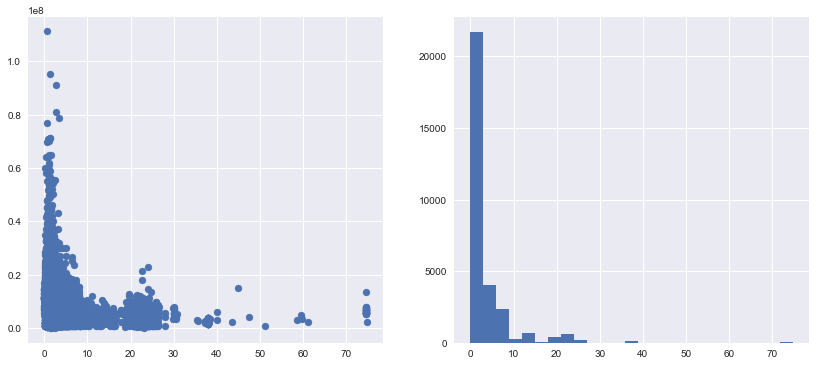

In [101]:
fig, axes = plt.subplots(1,2,figsize=[14,6])
axes[0].scatter(train['metro_km_avto'], train['price_doc'])
_ = axes[1].hist(train['metro_km_avto'].dropna(), bins=25)

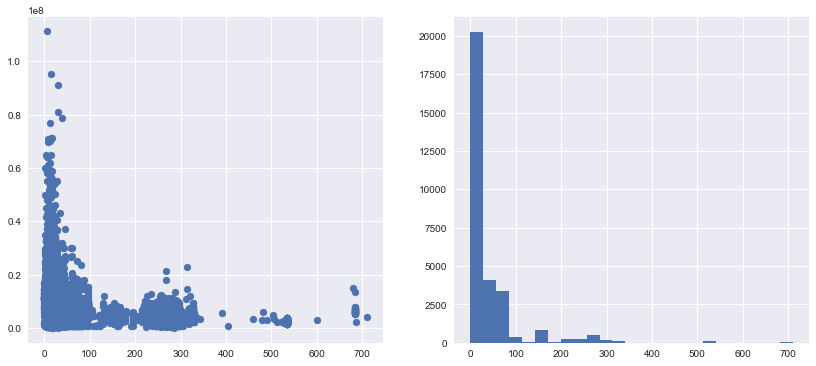

In [102]:
fig, axes = plt.subplots(1,2,figsize=[14,6])
axes[0].scatter(train['metro_min_walk'], train['price_doc'])
_ = axes[1].hist(train['metro_min_walk'].dropna(), bins=25)

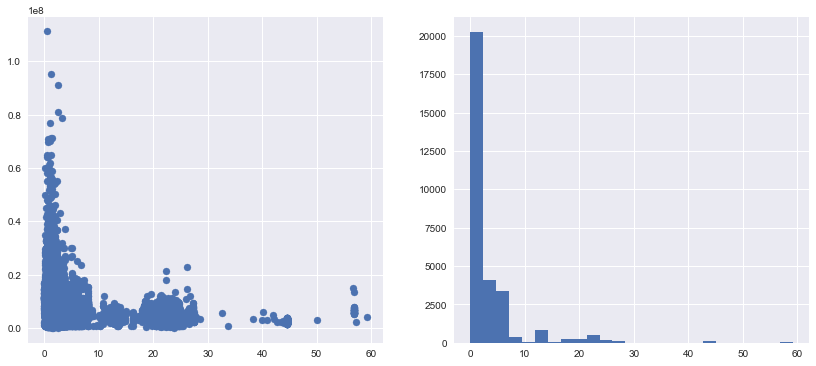

In [103]:
fig, axes = plt.subplots(1,2,figsize=[14,6])
axes[0].scatter(train['metro_km_walk'], train['price_doc'])
_ = axes[1].hist(train['metro_km_walk'].dropna(), bins=25)

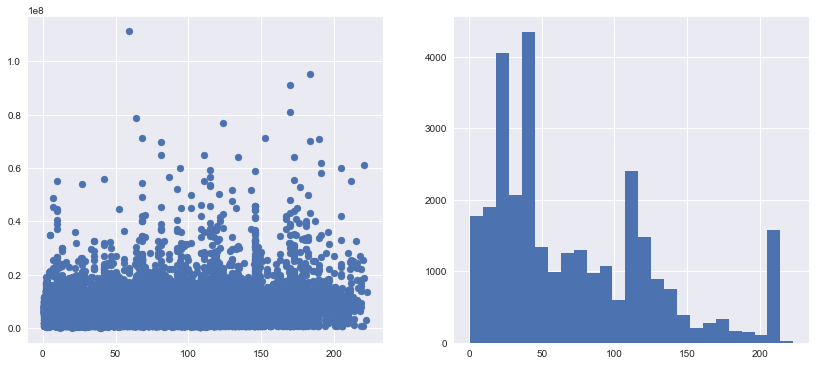

In [104]:
fig, axes = plt.subplots(1,2,figsize=[14,6])
axes[0].scatter(train['ID_metro'], train['price_doc'])
_ = axes[1].hist(train['ID_metro'].dropna(), bins=25)

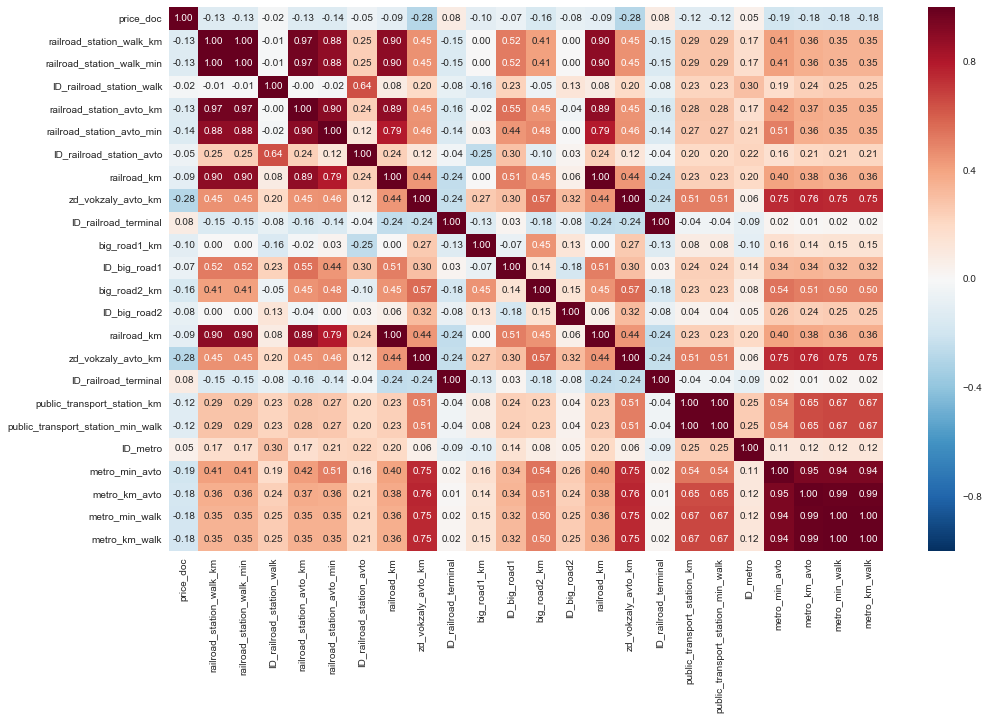

In [105]:
corr = train[['price_doc', 'railroad_station_walk_km', 'railroad_station_walk_min', 'ID_railroad_station_walk',
                 'railroad_station_avto_km', 'railroad_station_avto_min', 'ID_railroad_station_avto',
                 'railroad_terminal_raion', 'railroad_km', 'railroad_1line', 'zd_vokzaly_avto_km', 'ID_railroad_terminal',
                 'big_road1_km', 'ID_big_road1', 'big_road1_1line', 'big_road2_km', 'ID_big_road2', 'railroad_km',
                 'railroad_1line', 'zd_vokzaly_avto_km', 'ID_railroad_terminal',
                 'public_transport_station_km', 'public_transport_station_min_walk',
                 'ID_metro', 'metro_min_avto', 'metro_km_avto', 'metro_min_walk', 'metro_km_walk']].corr()

fig, ax = plt.subplots(figsize=[16,10])
sns.heatmap(corr, annot=True, fmt=".2f")

## Healthcare Centers:

In [106]:
col_health = ['hospice_morgue_km', 'hospital_beds_raion', 'healthcare_centers_raion', 'public_healthcare_km']

         


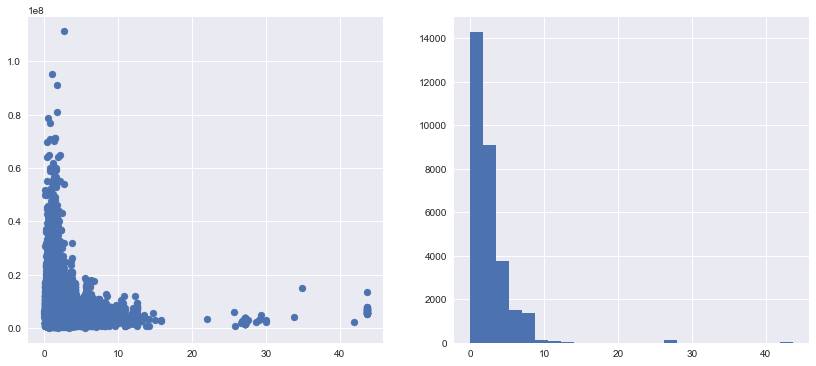

In [107]:
fig, axes = plt.subplots(1,2,figsize=[14,6])
axes[0].scatter(train['hospice_morgue_km'], train['price_doc'])
_ = axes[1].hist(train['hospice_morgue_km'].dropna(), bins=25)

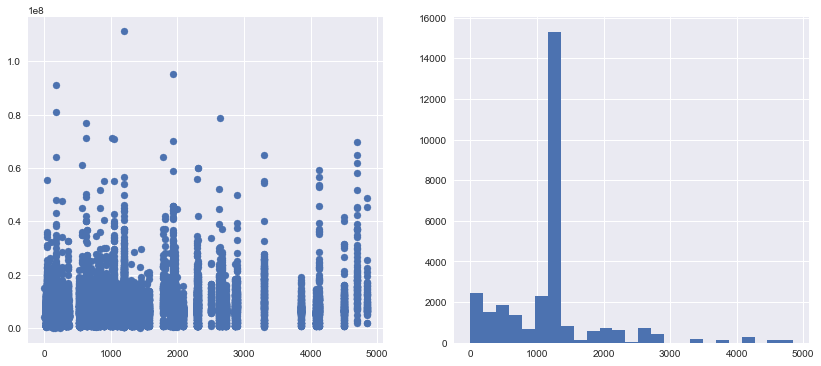

In [108]:
fig, axes = plt.subplots(1,2,figsize=[14,6])
axes[0].scatter(train['hospital_beds_raion'], train['price_doc'])
_ = axes[1].hist(train['hospital_beds_raion'].dropna(), bins=25)

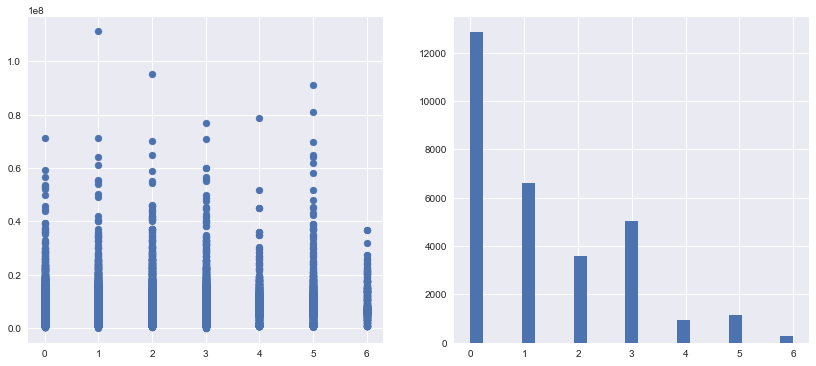

In [109]:
fig, axes = plt.subplots(1,2,figsize=[14,6])
axes[0].scatter(train['healthcare_centers_raion'], train['price_doc'])
_ = axes[1].hist(train['healthcare_centers_raion'].dropna(), bins=25)

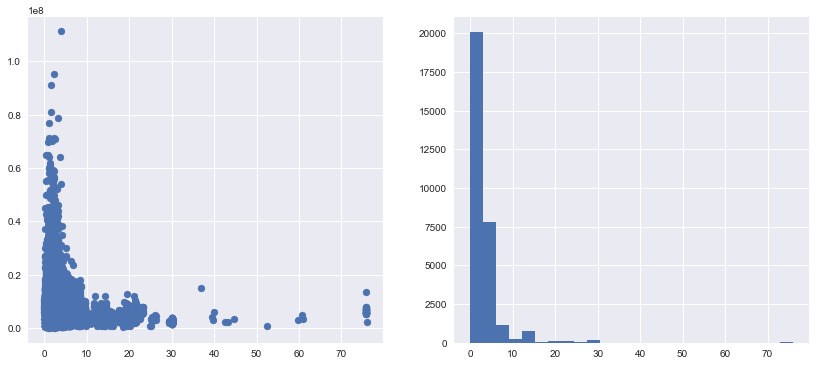

In [110]:
fig, axes = plt.subplots(1,2,figsize=[14,6])
axes[0].scatter(train['public_healthcare_km'], train['price_doc'])
_ = axes[1].hist(train['public_healthcare_km'].dropna(), bins=25)

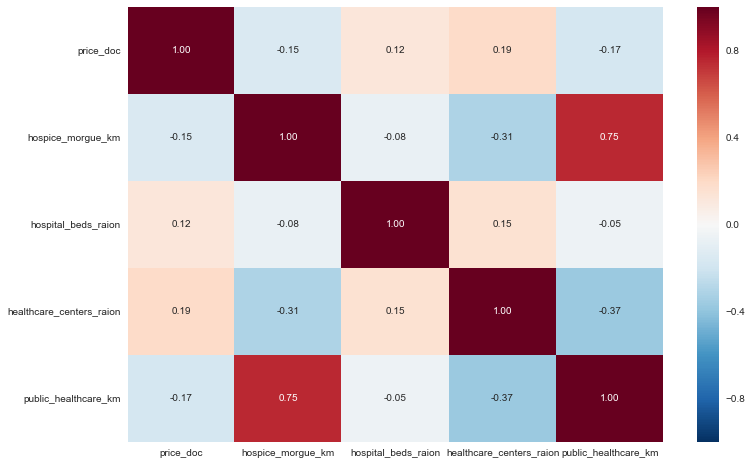

In [111]:
corr = train[['price_doc', 'hospice_morgue_km', 'hospital_beds_raion', 'healthcare_centers_raion', 'public_healthcare_km']].corr()

fig, ax = plt.subplots(figsize=[12,8])
sns.heatmap(corr, annot=True, fmt=".2f")

## Ecology:

In [112]:
col_ecology = ['ecology', 'green_zone_km', 'green_part_500', 'green_part_500', 'green_part_1500']


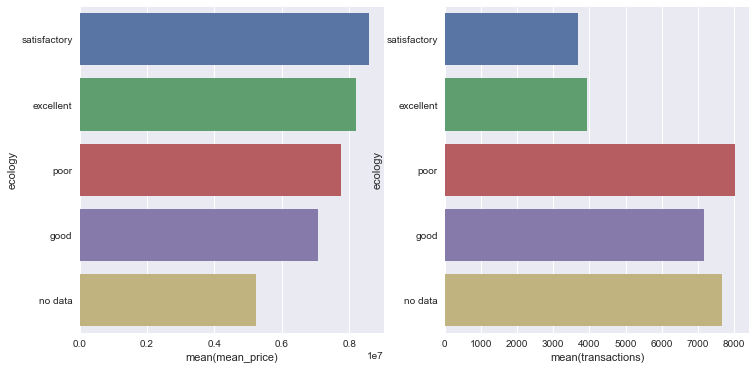

In [113]:
df = pd.DataFrame(columns=['ecology', 'mean_price', 'transactions'])
labels = train.ecology.unique().tolist()
mean_price = []
counts = []
for l in labels:
    mean_price.append(train[train['ecology'] == l].price_doc.mean())

for l in labels:
    counts.append((train['ecology'] == l).sum())

df.ecology = labels
df.mean_price = mean_price
df.transactions = counts
df = df.sort_values(by='mean_price', ascending=False)
    
fig, axes = plt.subplots(1,2,figsize=[12,6])


sns.barplot(df.mean_price, df.ecology, ax=axes[0])
sns.barplot(df.transactions, df.ecology, ax=axes[1])


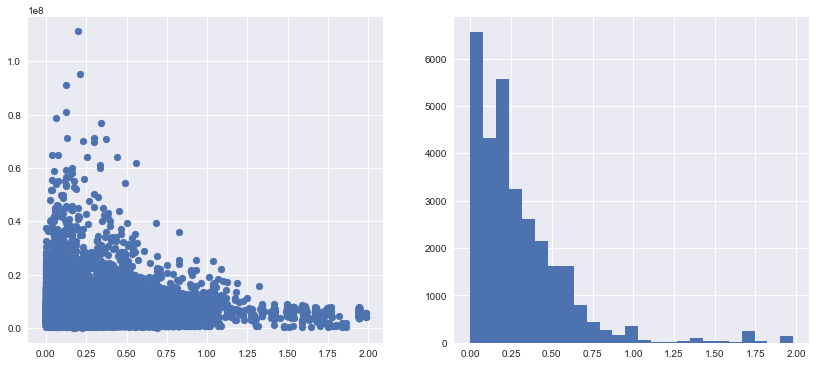

In [114]:
fig, axes = plt.subplots(1,2,figsize=[14,6])
axes[0].scatter(train['green_zone_km'], train['price_doc'])
_ = axes[1].hist(train['green_zone_km'].dropna(), bins=25)

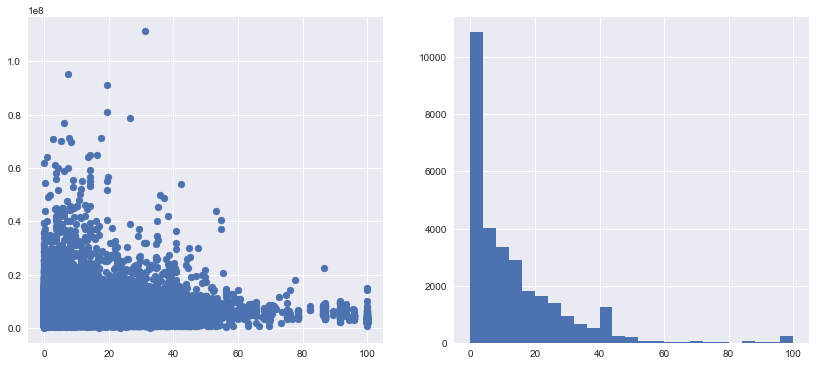

In [115]:
fig, axes = plt.subplots(1,2,figsize=[14,6])
axes[0].scatter(train['green_part_500'], train['price_doc'])
_ = axes[1].hist(train['green_part_500'].dropna(), bins=25)

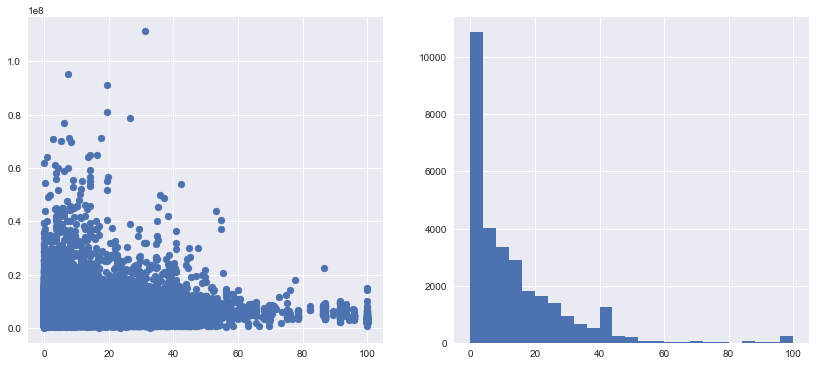

In [116]:
fig, axes = plt.subplots(1,2,figsize=[14,6])
axes[0].scatter(train['green_part_500'], train['price_doc'])
_ = axes[1].hist(train['green_part_500'].dropna(), bins=25)

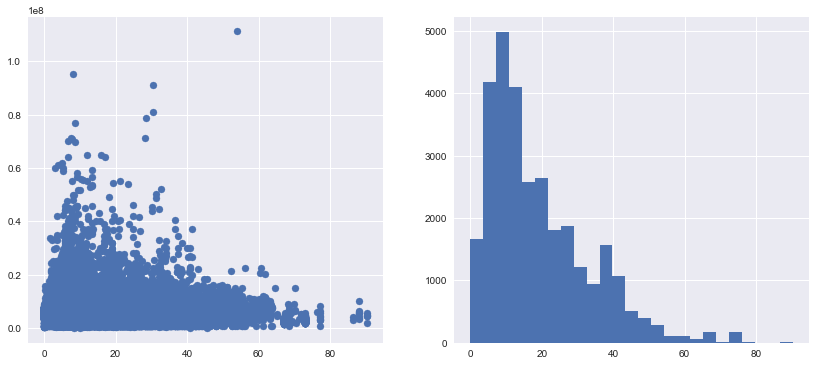

In [117]:
fig, axes = plt.subplots(1,2,figsize=[14,6])
axes[0].scatter(train['green_part_1500'], train['price_doc'])
_ = axes[1].hist(train['green_part_1500'].dropna(), bins=25)

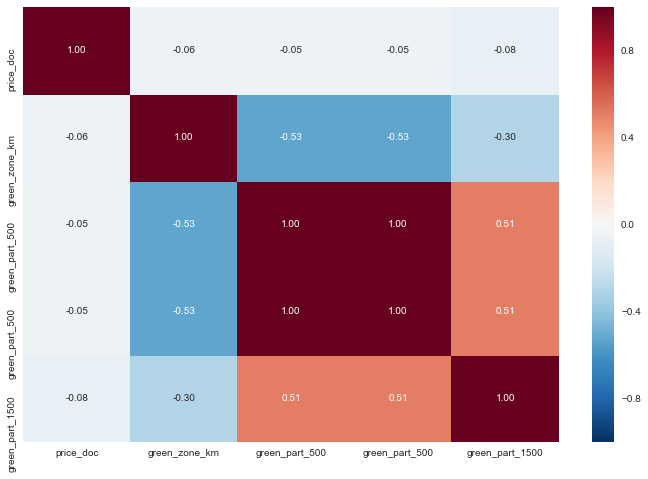

In [118]:
corr = train[['price_doc', 'ecology', 'green_zone_km', 'green_part_500', 'green_part_500', 'green_part_1500']].corr()

fig, ax = plt.subplots(figsize=[12,8])
sns.heatmap(corr, annot=True, fmt=".2f")

## TRC:

In [119]:
col_trc = ['trc_count_500', 'trc_count_1000', 'trc_count_1500', 'trc_count_2000', 'trc_count_3000', 'trc_count_5000',
           'trc_sqm_500', 'trc_sqm_1000', 'trc_sqm_1500', 'trc_sqm_2000', 'trc_sqm_3000', 'trc_sqm_5000']

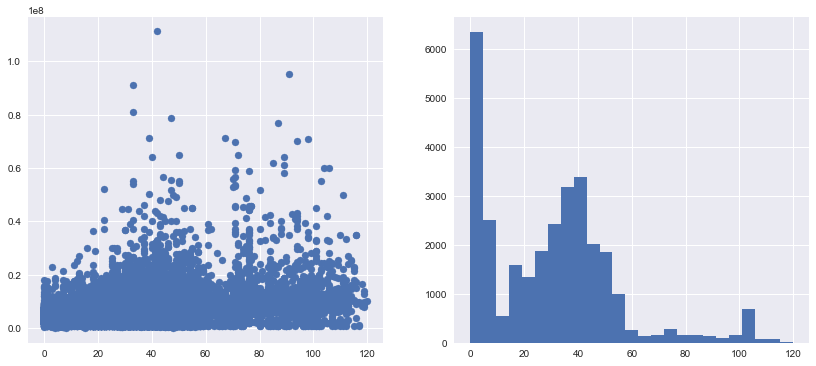

In [120]:
fig, axes = plt.subplots(1,2,figsize=[14,6])
axes[0].scatter(train['trc_count_5000'], train['price_doc'])
_ = axes[1].hist(train['trc_count_5000'].dropna(), bins=25)

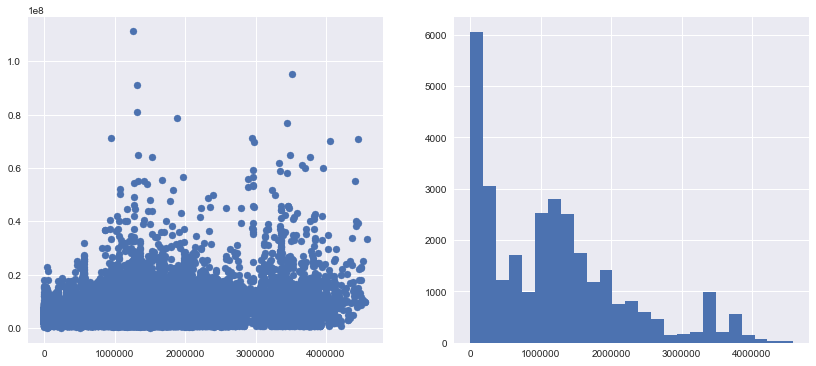

In [121]:
fig, axes = plt.subplots(1,2,figsize=[14,6])
axes[0].scatter(train['trc_sqm_5000'], train['price_doc'])
_ = axes[1].hist(train['trc_sqm_5000'].dropna(), bins=25)

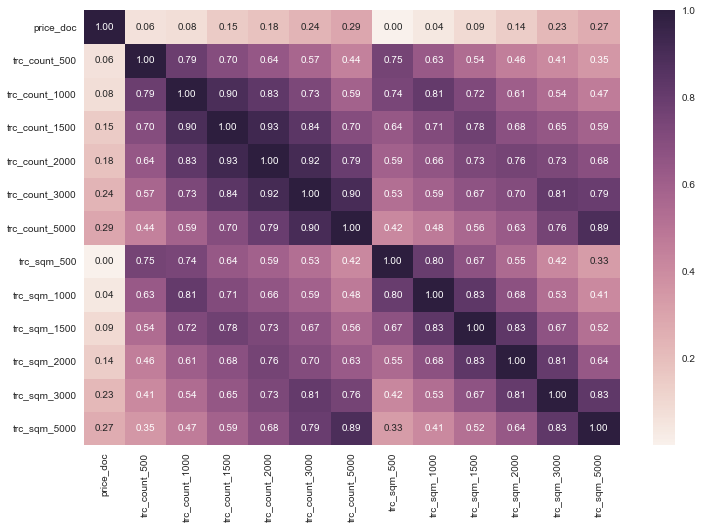

In [122]:
corr = train[['price_doc', 'trc_count_500', 'trc_count_1000', 'trc_count_1500', 'trc_count_2000', 'trc_count_3000', 'trc_count_5000',
           'trc_sqm_500', 'trc_sqm_1000', 'trc_sqm_1500', 'trc_sqm_2000', 'trc_sqm_3000', 'trc_sqm_5000']].corr()

fig, ax = plt.subplots(figsize=[12,8])
sns.heatmap(corr, annot=True, fmt=".2f")

## Subarea

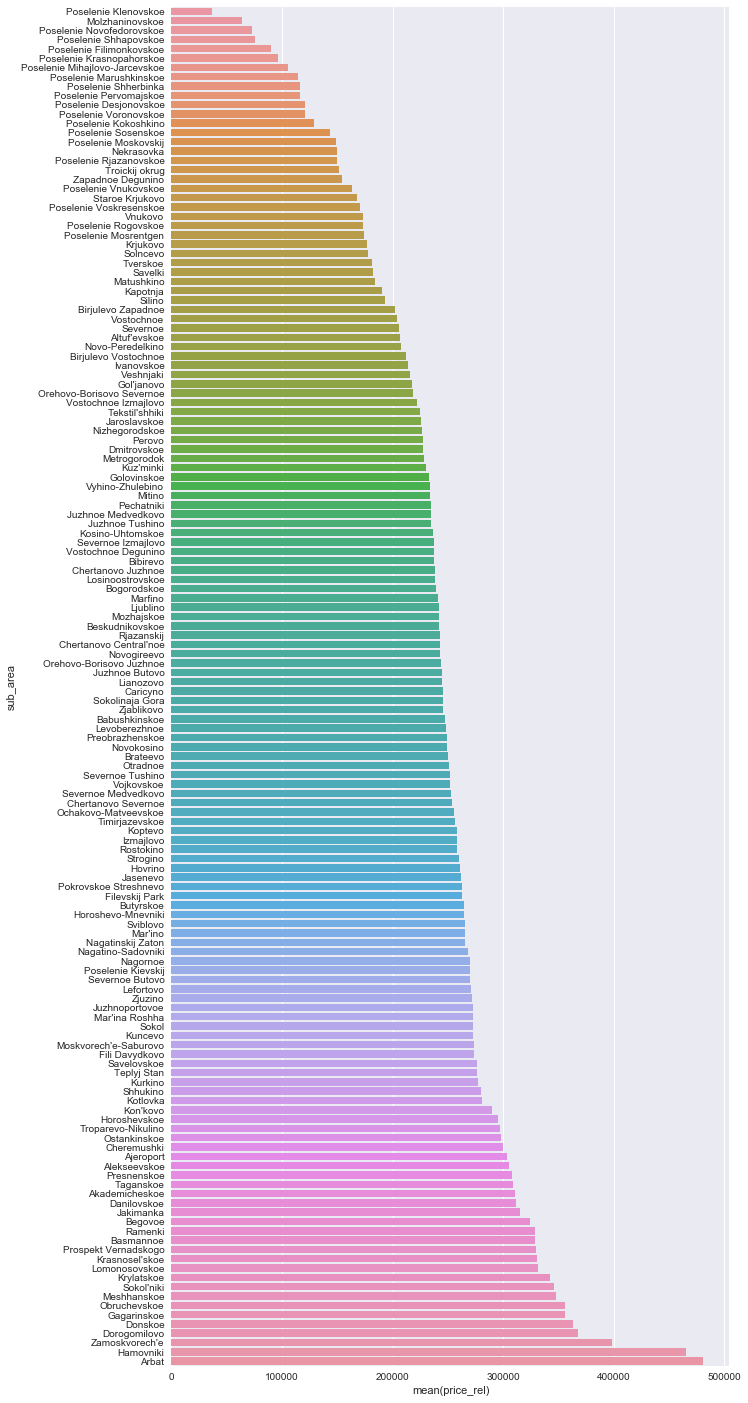

In [123]:
df = train[['life_sq', 'full_sq', 'price_doc', 'sub_area']]
df['price_rel'] = df['price_doc']/df['life_sq']
df_sub_area = df.groupby('sub_area')['price_rel'].mean().reset_index().sort_values(by='price_rel')

fig, ax = plt.subplots(figsize=[10,25])
sns.barplot(df_sub_area['price_rel'], df_sub_area['sub_area'])

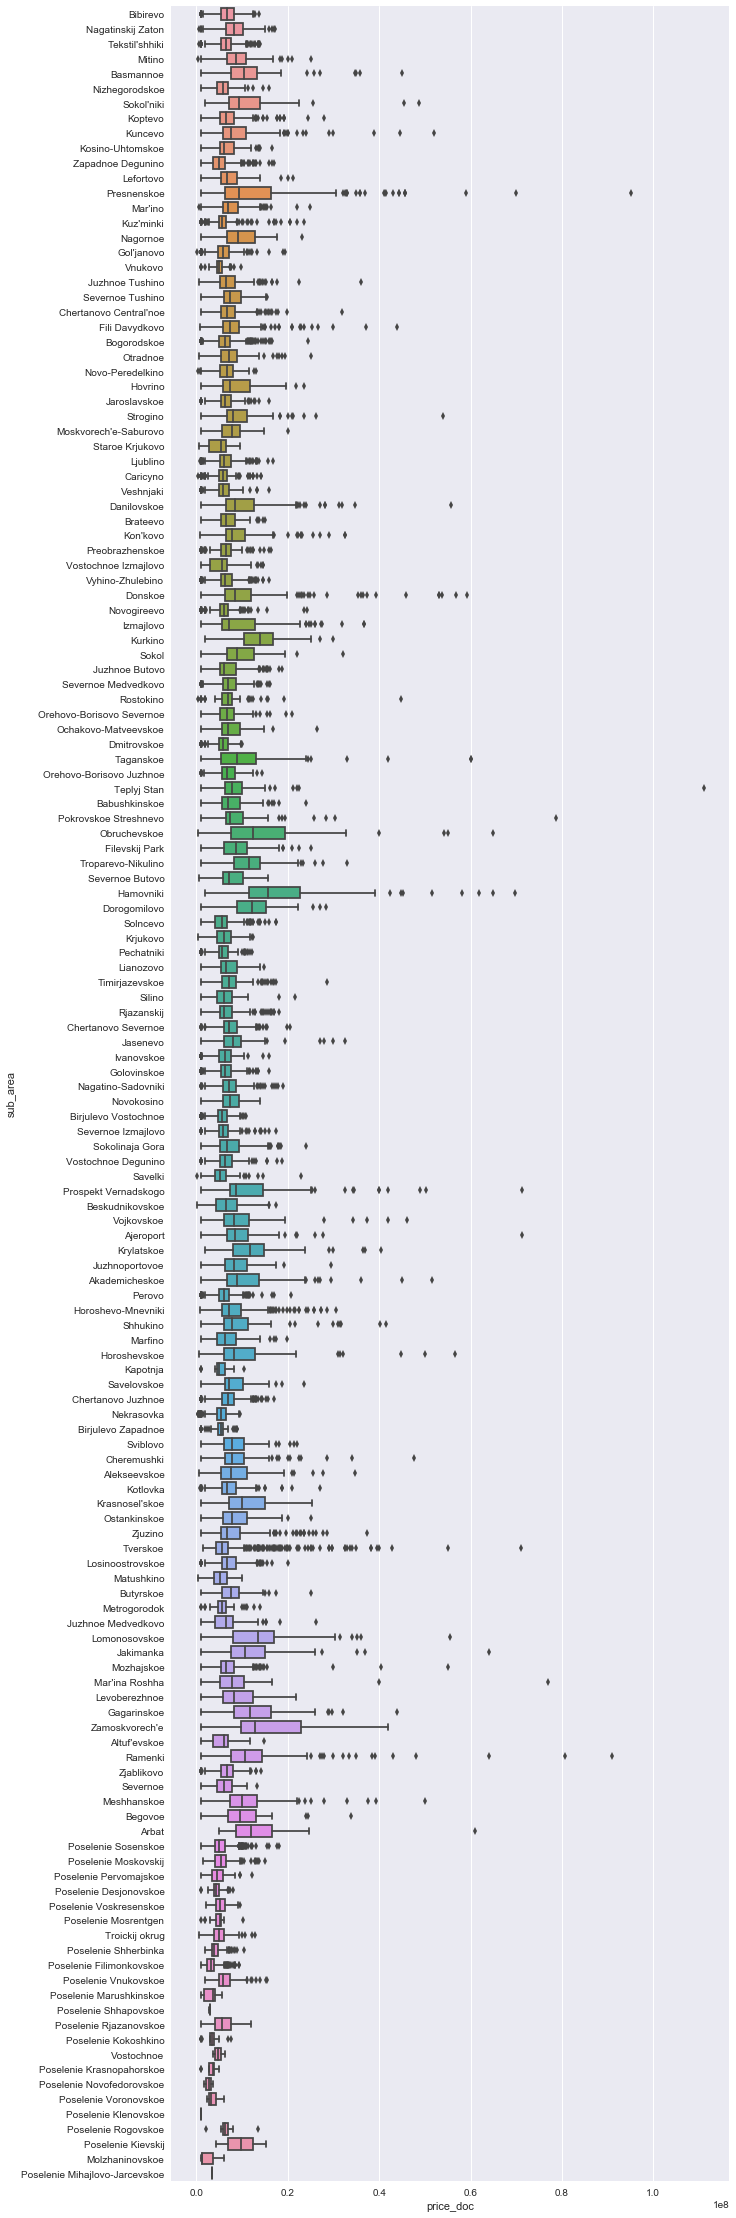

In [124]:
fig, ax = plt.subplots(figsize=[10,40])
sns.boxplot(df['price_doc'], df['sub_area'])

In [125]:
train[(train.sub_area == 'Teplyj Stan') & (train.price_doc > 1e8)]

full_sq  life_sq  floor  max_floor  material   build_year  num_room  \
2118     55.0     31.0   12.0  13.127757  1.827121  1986.863302  1.907098   

      kitch_sq     state      area_m      ...       quarter  year_quarter  \
2118   5.95592  2.105198  8392316.21      ...             2        2012Q2   

      year_month  price_rel_full_sq  price_rel_life_sq    room_sq  \
2118     2012-05       2.020202e+06       3.584229e+06  16.255063   

      rolling_price_300  rolling_price_600  rolling_price_1000     price_rel  
2118       7.064879e+06       6.954000e+06         6882080.744  3.584229e+06  

[1 rows x 406 columns]

### macro

In [126]:
['usdrub', 'gdp_quart', 'gdp_quart_growth', 'cpi', 'ppi', 'gdp_deflator', 'gdp_annual', 
'gdp_annual_growth', 'rts', 'deposits_value', 'deposits_rate', 
'mortgage_growth', 'mortgage_rate', 'grp', 'salary', 'salary_growth', 
'fixed_basket', 'unemployment', 'employment', 'pop_natural_increase', 'pop_migration', 'pop_total_inc', 
'childbirth', 'housing_fund_sqm', 'average_life_exp', 'rent_price_4+room_bus', 
'rent_price_3room_bus', 'rent_price_2room_bus', 'rent_price_3room_eco']

['usdrub',
 'gdp_quart',
 'gdp_quart_growth',
 'cpi',
 'ppi',
 'gdp_deflator',
 'gdp_annual',
 'gdp_annual_growth',
 'rts',
 'deposits_value',
 'deposits_rate',
 'mortgage_growth',
 'mortgage_rate',
 'grp',
 'salary',
 'salary_growth',
 'fixed_basket',
 'unemployment',
 'employment',
 'pop_natural_increase',
 'pop_migration',
 'pop_total_inc',
 'childbirth',
 'housing_fund_sqm',
 'average_life_exp',
 'rent_price_4+room_bus',
 'rent_price_3room_bus',
 'rent_price_2room_bus',
 'rent_price_3room_eco']

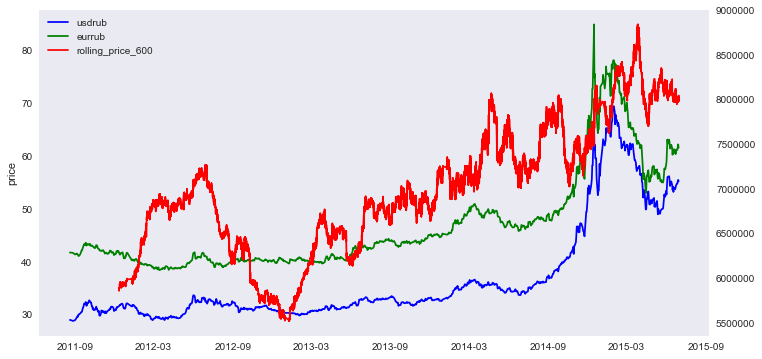

In [127]:
sns.set_style('dark')

fig, ax1 = plt.subplots(figsize=[12,6])

ax1.plot(train['timestamp'], train['usdrub'], color='b')
ax1.plot(train['timestamp'], train['eurrub'], color='g')

ax2 = ax1.twinx()
ax2.plot(train['timestamp'], train['rolling_price_600'], color='r')

ax1.set(ylabel='price')
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1+h2, l1+l2, loc=2)

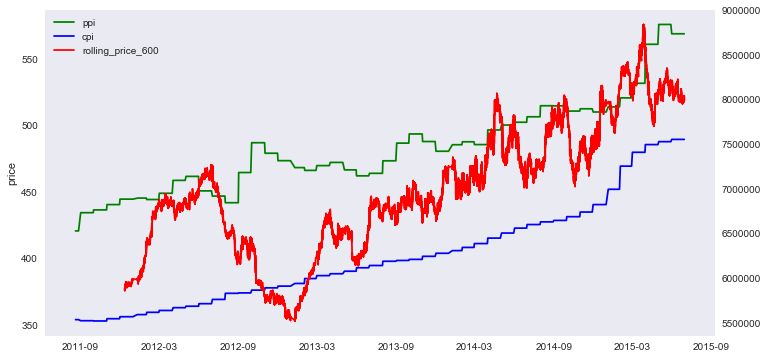

In [128]:
sns.set_style('dark')

fig, ax1 = plt.subplots(figsize=[12,6])

ax1.plot(train['timestamp'], train['ppi'], color='g')
ax1.plot(train['timestamp'], train['cpi'], color='b')

ax2 = ax1.twinx()
ax2.plot(train['timestamp'], train['rolling_price_600'], color='r')

ax1.set(ylabel='price')
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1+h2, l1+l2, loc=2)

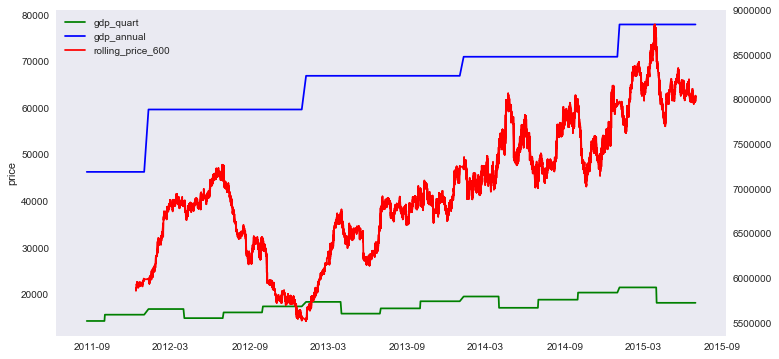

In [129]:
sns.set_style('dark')

fig, ax1 = plt.subplots(figsize=[12,6])

ax1.plot(train['timestamp'], train['gdp_quart'], color='g')
ax1.plot(train['timestamp'], train['gdp_annual'], color='b')

ax2 = ax1.twinx()
ax2.plot(train['timestamp'], train['rolling_price_600'], color='r')

ax1.set(ylabel='price')
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1+h2, l1+l2, loc=2)

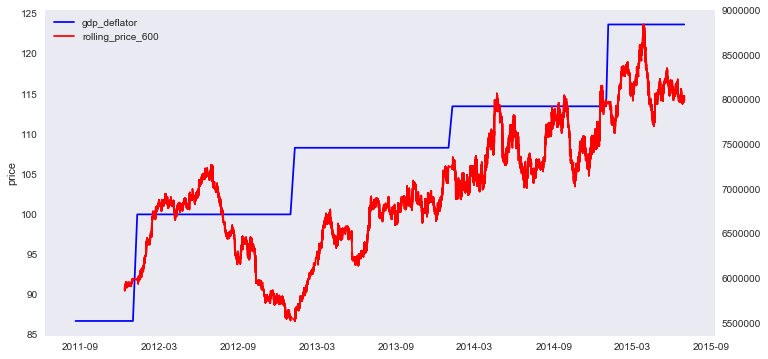

In [130]:
sns.set_style('dark')

fig, ax1 = plt.subplots(figsize=[12,6])

ax1.plot(train['timestamp'], train['gdp_deflator'], color='b')

ax2 = ax1.twinx()
ax2.plot(train['timestamp'], train['rolling_price_600'], color='r')

ax1.set(ylabel='price')
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1+h2, l1+l2, loc=2)

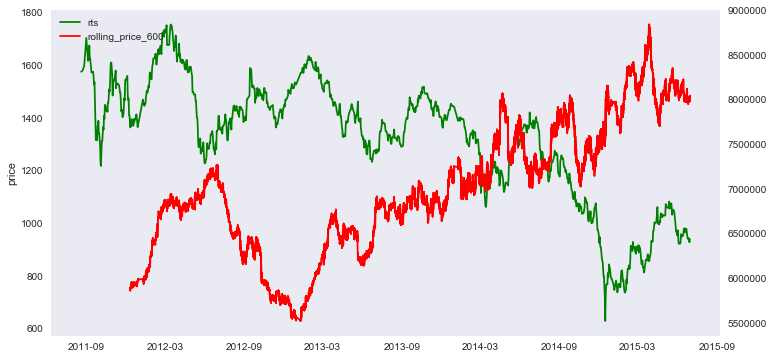

In [131]:
sns.set_style('dark')

fig, ax1 = plt.subplots(figsize=[12,6])

ax1.plot(train['timestamp'], train['rts'], color='g')

ax2 = ax1.twinx()
ax2.plot(train['timestamp'], train['rolling_price_600'], color='r')

ax1.set(ylabel='price')
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1+h2, l1+l2, loc=2)

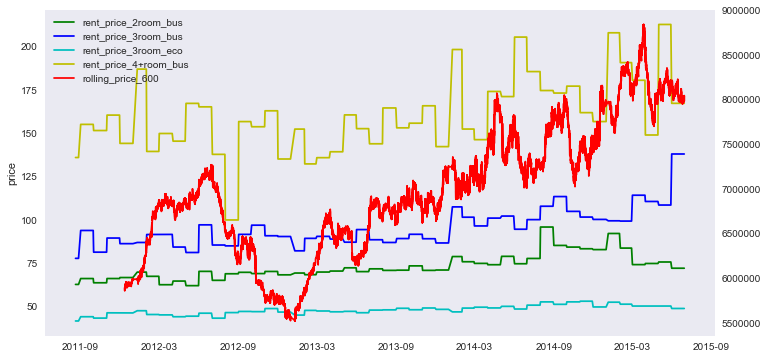

In [132]:
sns.set_style('dark')

fig, ax1 = plt.subplots(figsize=[12,6])

ax1.plot(train['timestamp'], train['rent_price_2room_bus'], color='g')
ax1.plot(train['timestamp'], train['rent_price_3room_bus'], color='b')
ax1.plot(train['timestamp'], train['rent_price_3room_eco'], color='c')
ax1.plot(train['timestamp'], train['rent_price_4+room_bus'], color='y')

ax2 = ax1.twinx()
ax2.plot(train['timestamp'], train['rolling_price_600'], color='r')

ax1.set(ylabel='price')
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1+h2, l1+l2, loc=2)

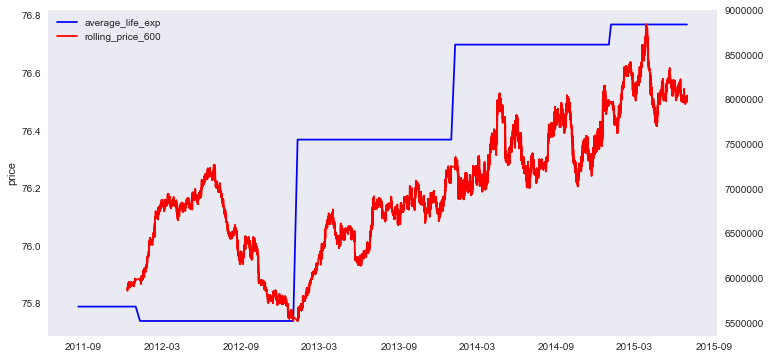

In [133]:
sns.set_style('dark')

fig, ax1 = plt.subplots(figsize=[12,6])

ax1.plot(train['timestamp'], train['average_life_exp'], color='b')

ax2 = ax1.twinx()
ax2.plot(train['timestamp'], train['rolling_price_600'], color='r')

ax1.set(ylabel='price')
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1+h2, l1+l2, loc=2)

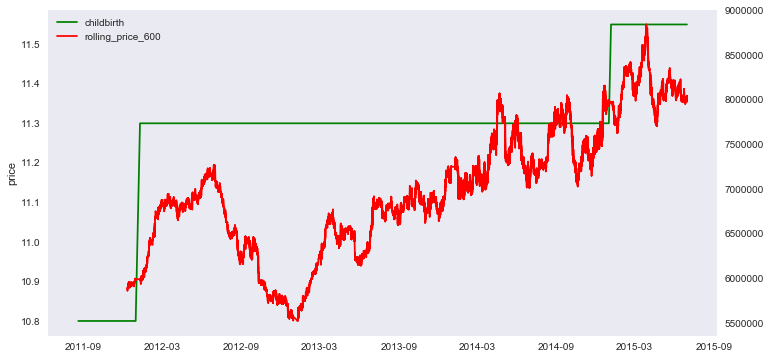

In [134]:
sns.set_style('dark')

fig, ax1 = plt.subplots(figsize=[12,6])

ax1.plot(train['timestamp'], train['childbirth'], color='g')

ax2 = ax1.twinx()
ax2.plot(train['timestamp'], train['rolling_price_600'], color='r')

ax1.set(ylabel='price')
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1+h2, l1+l2, loc=2)

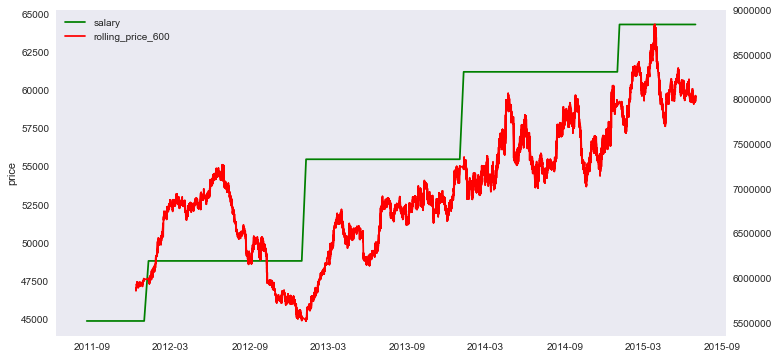

In [135]:
sns.set_style('dark')

fig, ax1 = plt.subplots(figsize=[12,6])

ax1.plot(train['timestamp'], train['salary'], color='g')

ax2 = ax1.twinx()
ax2.plot(train['timestamp'], train['rolling_price_600'], color='r')

ax1.set(ylabel='price')
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1+h2, l1+l2, loc=2)

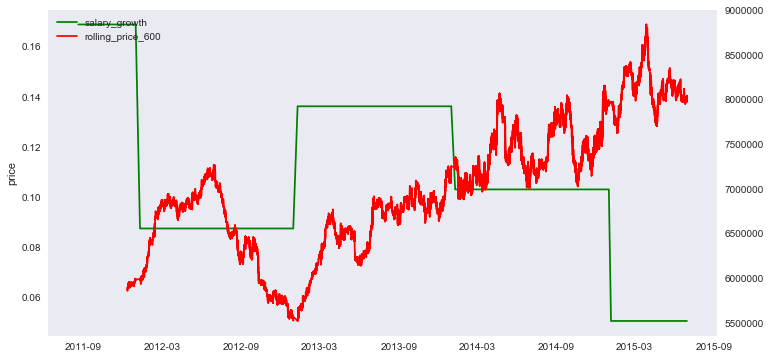

In [136]:
sns.set_style('dark')

fig, ax1 = plt.subplots(figsize=[12,6])

ax1.plot(train['timestamp'], train['salary_growth'], color='g')

ax2 = ax1.twinx()
ax2.plot(train['timestamp'], train['rolling_price_600'], color='r')

ax1.set(ylabel='price')
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1+h2, l1+l2, loc=2)

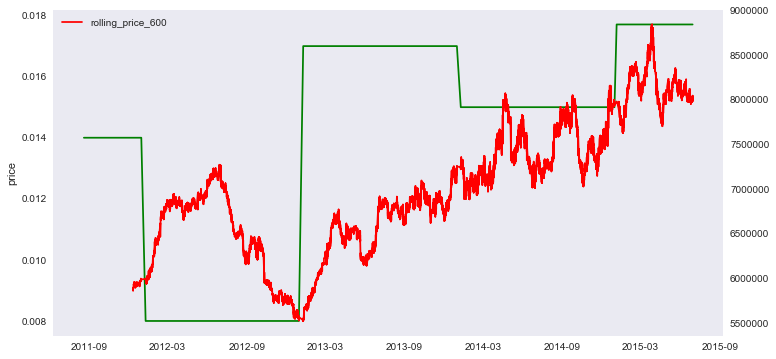

In [137]:
sns.set_style('dark')

fig, ax1 = plt.subplots(figsize=[12,6])

ax1.plot(train['timestamp'], train[['unemployment']], color='g')

ax2 = ax1.twinx()
ax2.plot(train['timestamp'], train['rolling_price_600'], color='r')

ax1.set(ylabel='price')
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1+h2, l1+l2, loc=2)

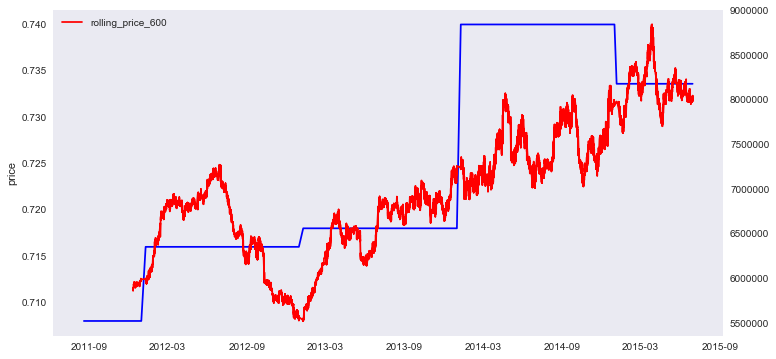

In [138]:
sns.set_style('dark')

fig, ax1 = plt.subplots(figsize=[12,6])

ax1.plot(train['timestamp'], train[['employment']], color='b')

ax2 = ax1.twinx()
ax2.plot(train['timestamp'], train['rolling_price_600'], color='r')

ax1.set(ylabel='price')
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1+h2, l1+l2, loc=2)

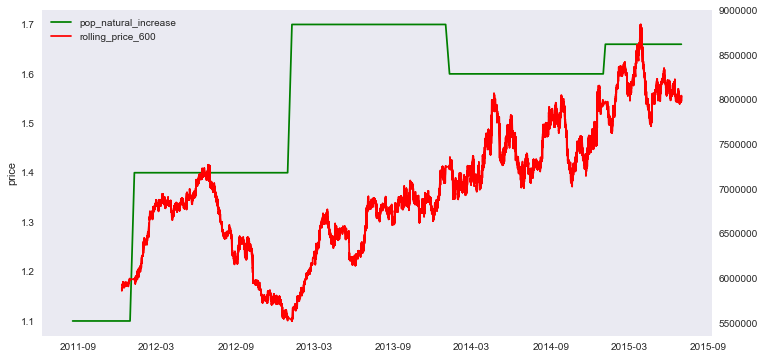

In [139]:
sns.set_style('dark')

fig, ax1 = plt.subplots(figsize=[12,6])

ax1.plot(train['timestamp'], train['pop_natural_increase'], color='g')

ax2 = ax1.twinx()
ax2.plot(train['timestamp'], train['rolling_price_600'], color='r')

ax1.set(ylabel='price')
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1+h2, l1+l2, loc=2)

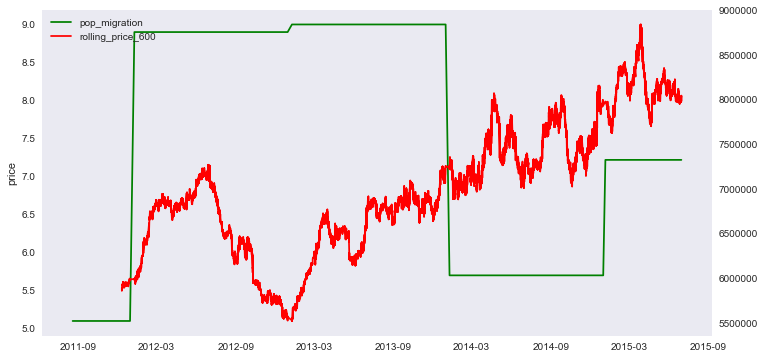

In [140]:
sns.set_style('dark')

fig, ax1 = plt.subplots(figsize=[12,6])

ax1.plot(train['timestamp'], train['pop_migration'], color='g')

ax2 = ax1.twinx()
ax2.plot(train['timestamp'], train['rolling_price_600'], color='r')

ax1.set(ylabel='price')
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1+h2, l1+l2, loc=2)

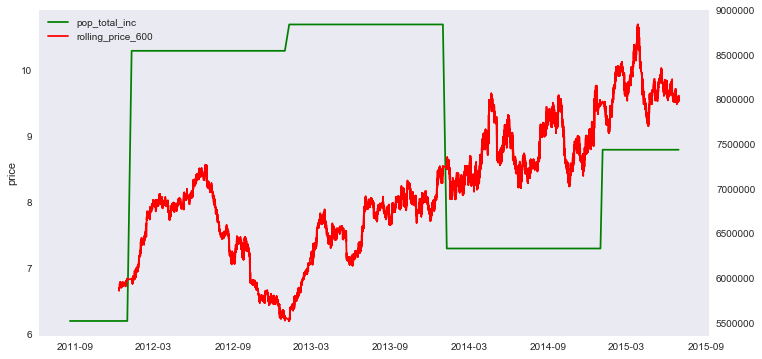

In [141]:
sns.set_style('dark')

fig, ax1 = plt.subplots(figsize=[12,6])

ax1.plot(train['timestamp'], train['pop_total_inc'], color='g')

ax2 = ax1.twinx()
ax2.plot(train['timestamp'], train['rolling_price_600'], color='r')

ax1.set(ylabel='price')
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1+h2, l1+l2, loc=2)

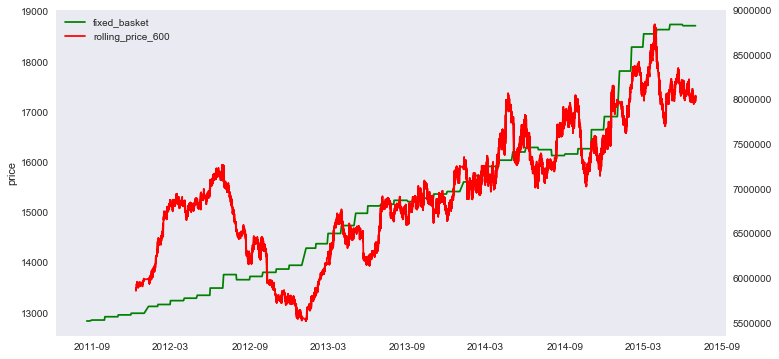

In [142]:
sns.set_style('dark')

fig, ax1 = plt.subplots(figsize=[12,6])

ax1.plot(train['timestamp'], train['fixed_basket'], color='g')

ax2 = ax1.twinx()
ax2.plot(train['timestamp'], train['rolling_price_600'], color='r')

ax1.set(ylabel='price')
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1+h2, l1+l2, loc=2)

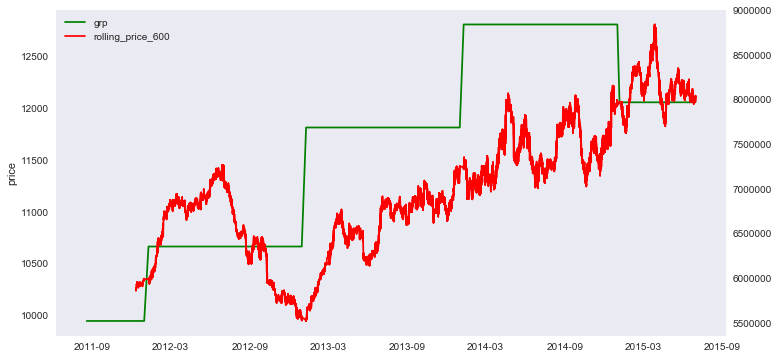

In [143]:
sns.set_style('dark')

fig, ax1 = plt.subplots(figsize=[12,6])

ax1.plot(train['timestamp'], train['grp'], color='g')

ax2 = ax1.twinx()
ax2.plot(train['timestamp'], train['rolling_price_600'], color='r')

ax1.set(ylabel='price')
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1+h2, l1+l2, loc=2)

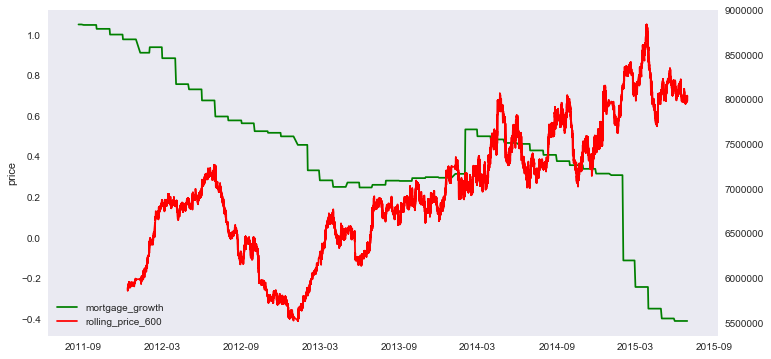

In [144]:
sns.set_style('dark')

fig, ax1 = plt.subplots(figsize=[12,6])

ax1.plot(train['timestamp'], train['mortgage_growth'], color='g')

ax2 = ax1.twinx()
ax2.plot(train['timestamp'], train['rolling_price_600'], color='r')

ax1.set(ylabel='price')
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1+h2, l1+l2, loc=3)

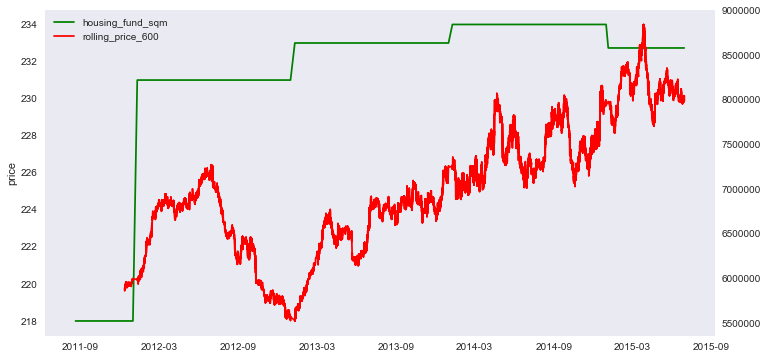

In [145]:
sns.set_style('dark')

fig, ax1 = plt.subplots(figsize=[12,6])

ax1.plot(train['timestamp'], train['housing_fund_sqm'], color='g')

ax2 = ax1.twinx()
ax2.plot(train['timestamp'], train['rolling_price_600'], color='r')

ax1.set(ylabel='price')
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1+h2, l1+l2, loc=2)

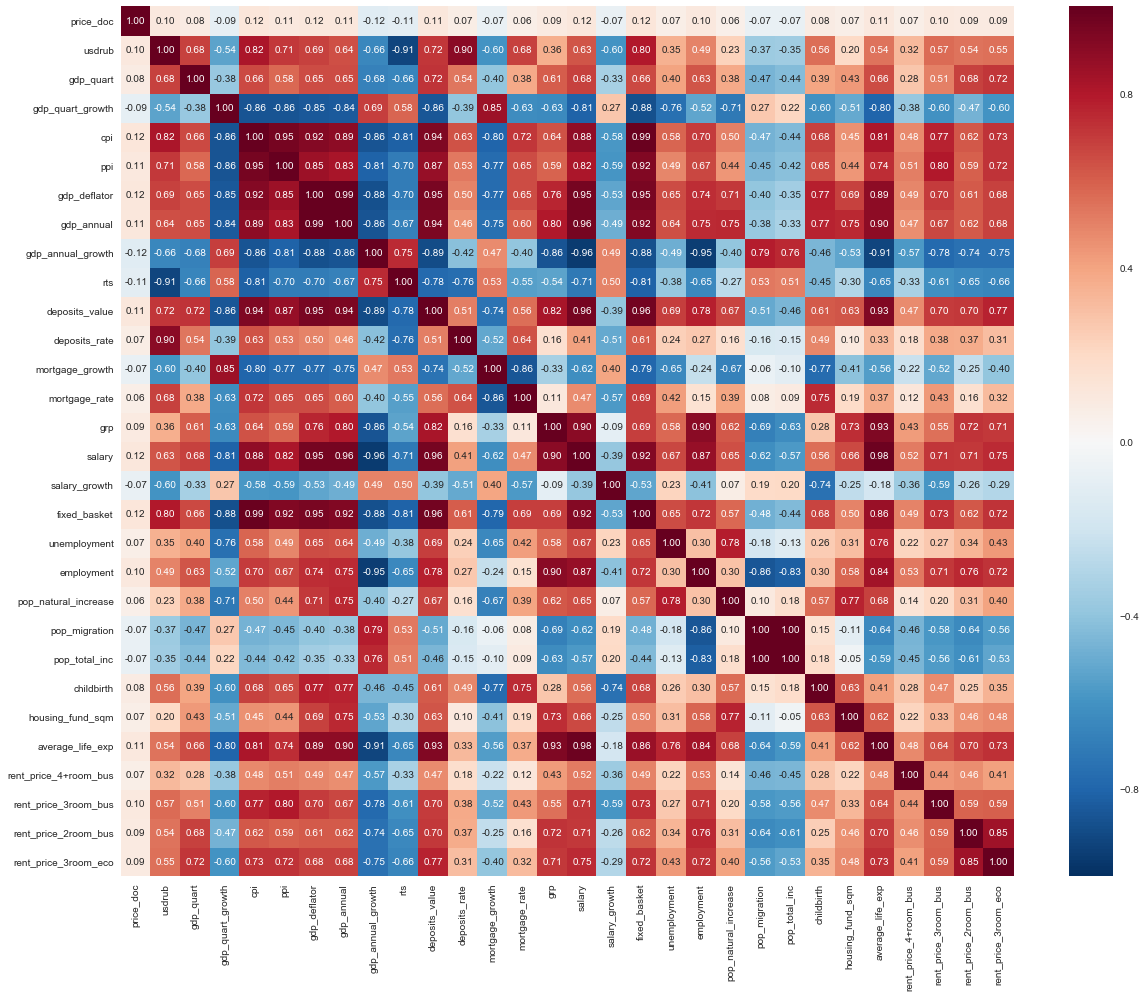

In [146]:
macro_cor = train[['price_doc', 'usdrub', 'gdp_quart', 'gdp_quart_growth', 'cpi', 'ppi', 'gdp_deflator', 'gdp_annual', 
                    'gdp_annual_growth', 'rts', 'deposits_value', 'deposits_rate', 
                    'mortgage_growth', 'mortgage_rate', 'grp', 'salary', 'salary_growth', 
                    'fixed_basket', 'unemployment', 'employment', 'pop_natural_increase', 'pop_migration', 'pop_total_inc', 
                    'childbirth', 'housing_fund_sqm', 'average_life_exp', 'rent_price_4+room_bus', 
                    'rent_price_3room_bus', 'rent_price_2room_bus', 'rent_price_3room_eco']].corr()
fig, ax = plt.subplots(figsize=[20,16])
sns.heatmap(macro_cor, annot=True, fmt=".2f")

## most important features:

In [147]:
X_train = train.drop(['timestamp', 'id'], axis=1)
cols = X_train.columns

In [148]:
for c in X_train.columns:
    if X_train[c].dtype == 'object':
        lbl = preprocessing.LabelEncoder()
        lbl.fit(list(train[c].values)) 
        X_train[c] = lbl.transform(list(X_train[c].values))
        #x_train.drop(c,axis=1,inplace=True)   

In [149]:
y_train_price = X_train['price_doc']
y_train_price_rel_full = X_train['price_rel_full_sq'].astype(int)
y_train_price_rel_life = X_train['price_rel_life_sq']
X_train = X_train.drop(['price_doc', 'price_rel_full_sq', 'price_rel_life_sq'], axis=1)

In [150]:
xgb_params = {
    'eta': 0.05,
    'max_depth': 8,
    'subsample': 0.7,
    'colsample_bytree': 0.7,
    'objective': 'reg:linear',
    'eval_metric': 'rmse',
    'silent': 1
}

dtrain = xgb.DMatrix(X_train, y_train_price)
dtrain_rel_full = xgb.DMatrix(X_train, y_train_price_rel_full)
dtrain_rel_life = xgb.DMatrix(X_train, y_train_price_rel_life)

<function matplotlib.pyplot.show>

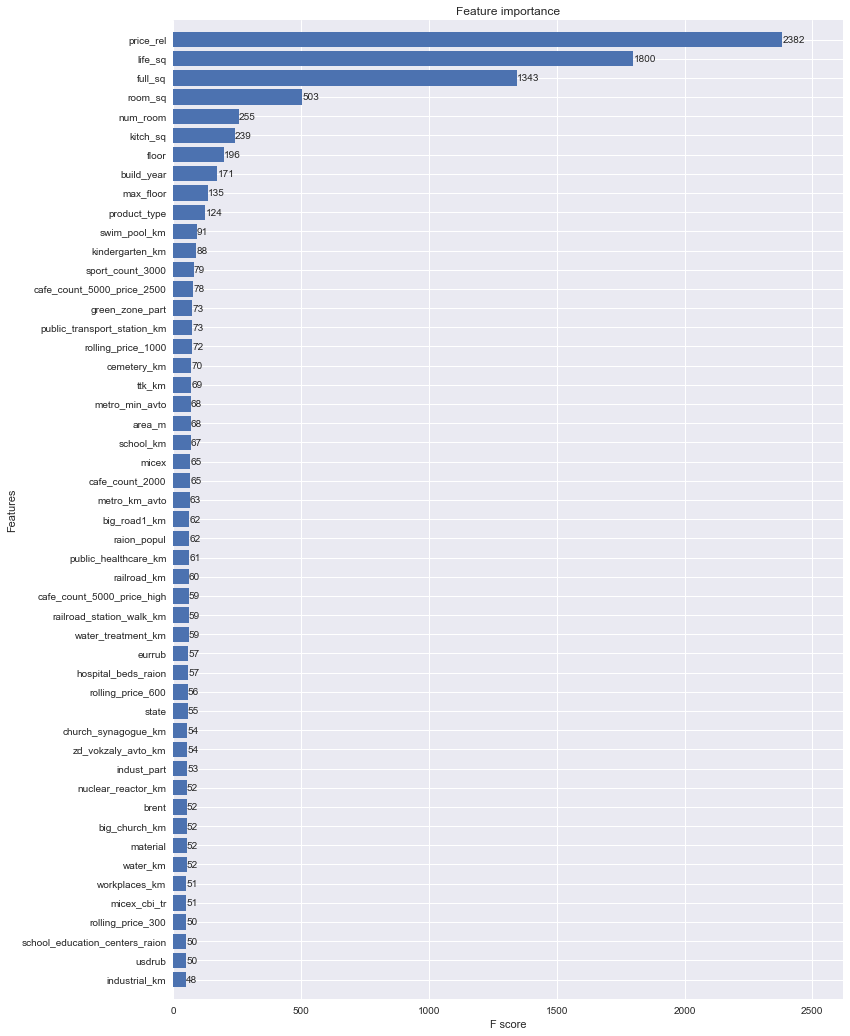

In [151]:
model = xgb.train(dict(xgb_params,silent=0),dtrain,num_boost_round=100)

fig,ax=plt.subplots(figsize = (12,18))
xgb.plot_importance(model, max_num_features=50, height=0.8, ax=ax)
plt.show

In [152]:
xgb_params = {
    'eta': 0.05,
    'max_depth': 8,
    'subsample': 0.7,
    'colsample_bytree': 0.7,
    'objective': 'reg:linear',
    'eval_metric': 'rmse',
    'silent': 1
}

dtrain_rel_full = xgb.DMatrix(X_train, y_train_price_rel_full)

<function matplotlib.pyplot.show>

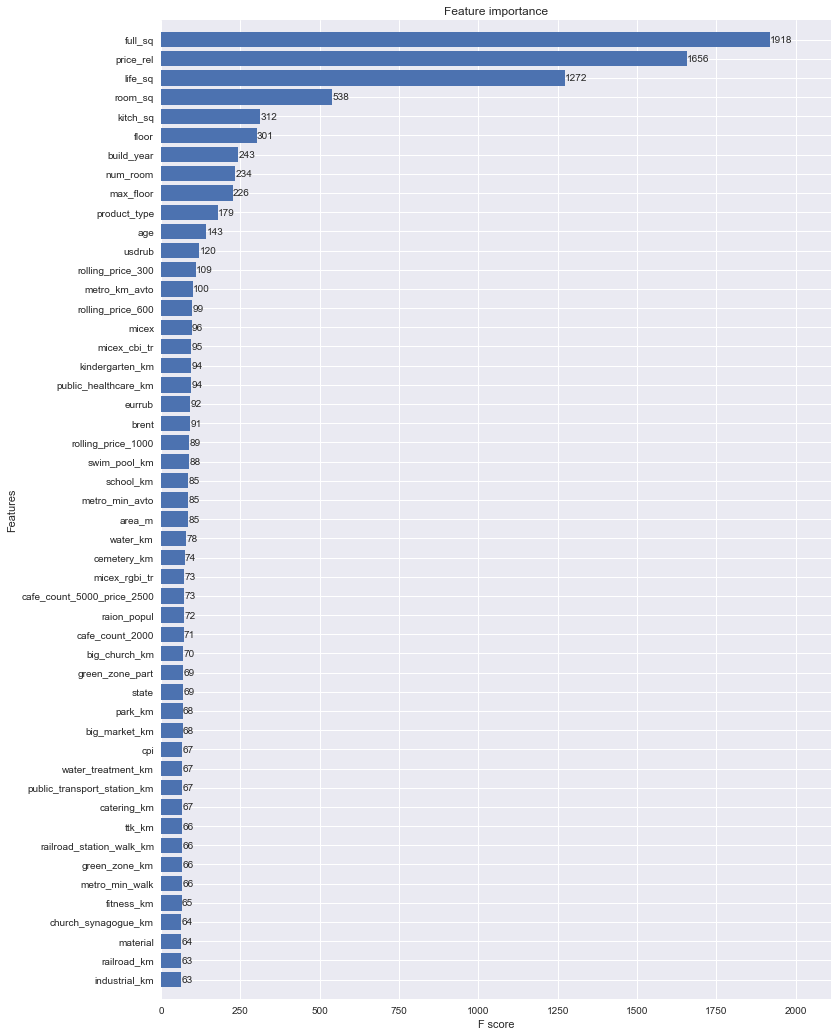

In [153]:
model_rel_full = xgb.train(dict(xgb_params,silent=0),dtrain_rel_full,num_boost_round=100)

fig,ax=plt.subplots(figsize = (12,18))
xgb.plot_importance(model_rel_full, max_num_features=50, height=0.8, ax=ax)
plt.show

In [154]:
xgb_params = {
    'eta': 0.05,
    'max_depth': 8,
    'subsample': 0.7,
    'colsample_bytree': 0.7,
    'objective': 'reg:linear',
    'eval_metric': 'rmse',
    'silent': 1
}

dtrain_rel_life = xgb.DMatrix(X_train, y_train_price_rel_life)

<function matplotlib.pyplot.show>

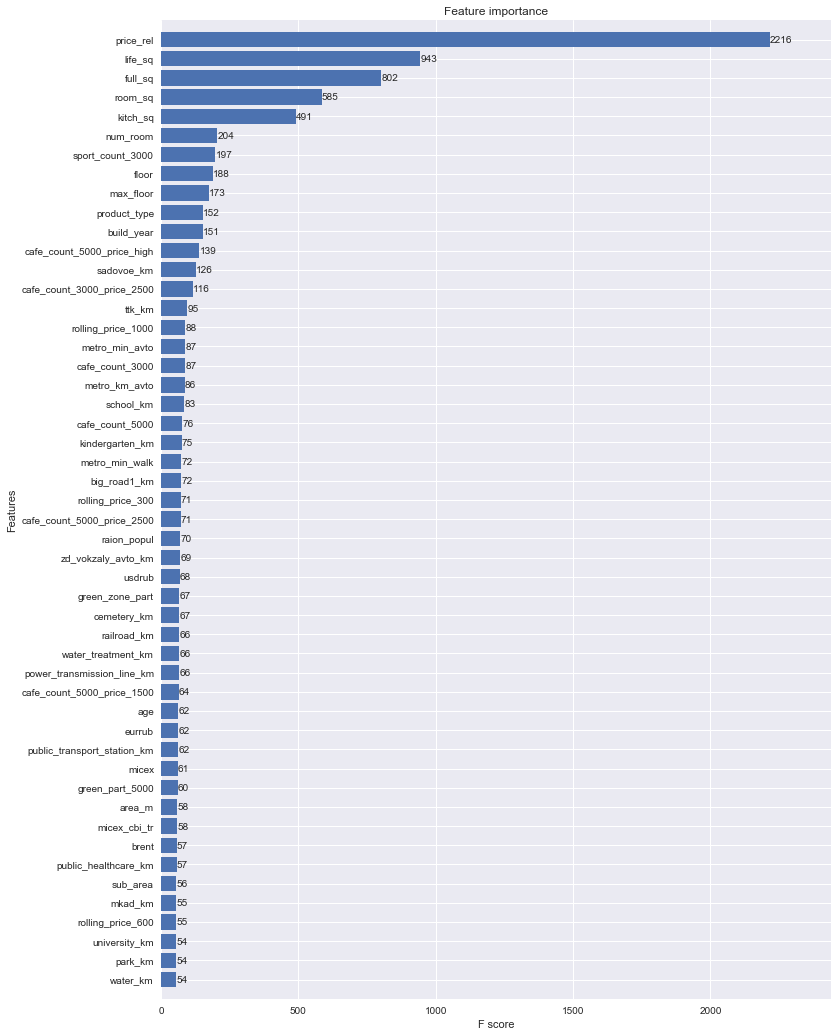

In [155]:
model = xgb.train(dict(xgb_params,silent=0),dtrain_rel_life,num_boost_round=100)

fig,ax=plt.subplots(figsize = (12,18))
xgb.plot_importance(model, max_num_features=50, height=0.8, ax=ax)
plt.show